###  "SELECTION OF STOCKS FOR INVESTMENT USING PRINCIPAL COMPONENT ANALYSIS - Python"

![](1658313441_pasted-image-0-9.jpg)

> "This project aims to help investors select the right stock for investment using the principal component analysis technique. Principal component analysis (PCA) helps to uncover hidden patterns and associations in data. Its applications span finance, data science, data analysis, machine learning, and other fields. PCA transforms a dataset into a new set of independent variables (known as principle components) that are uncorrelated with one another. 
The dataset originally contained several variables that could be correlated with one another. Principal component analysis reduces the size of the data and extracts useful information capable of representing the entire data set. In order to achieve these goals, it computes new variables called principal components that are generated as linear combinations of the original variables. 
The first principal component is required to have the largest possible variance. The second component must be orthogonal to the first component in order to be computed. The other components are computed likewise. The values of these new variables for the observations are called factors scores, and they can be interpreted geometrically as the projections of the observations onto the principal components."

- toc:true- branch: master
- badges: true
- comments: true
- author: Faakye Konadu Samuel, Data Analyst, konadufaakye@gmail.com, 00233245938995
- categories: [Data analysis]

####  1. Packages used in this project.

In [1]:
import pandas as pd                                   #  Used for data manipulation
import yfinance as yf                                 #  Used  for downloading historical data
from sklearn.decomposition import PCA                 #  Used for performing principal component analysis
import seaborn as sns                                 #  Used for data visualisation
import sweetviz as sv                                 #  Used for exploratory data analysis (EDA)
import numpy as np                                    #  Used to also performing computation
import matplotlib.pyplot as plt                       #  Also used for data visualization
from sklearn import preprocessing                     #  Used to scale the data before performing the principal component analysis



#### 2. Import the historical data of 67 stock prices from Yahoo Finance and convert them to returns.

In [3]:

# List of stock tickers to download data
tickers = ['AAPL', 'GOOG', 'MSFT', 'AMZN', 'INTC', 'CSCO', 'CMCSA', 'PEP', 'GILD',
           'NVDA', 'ORCL', 'T', 'VZ', 'PFE', 'HD', 'UNH', 'MO', 'WBA', 'BMY', 'MRK',
           'NEE', 'DUK', 'EXC', 'SRE', 'SO', 'D', 'DOW', 'XOM', 'CVX', 'BAC', 'JPM',
           'C', 'V', 'MA', 'WFC', 'USB', 'PNC', 'BK', 'MET', 'TRV', 'DIS', 'MCD', 'PYPL',
           'COST', 'AMGN', 'UNP', 'HD', 'BA', 'KO', 'MCO', 'IBM', 'LMT', 'GS', 'AAL', 'AEP',
           'AWK', 'DTE', 'ETN', 'EIX', 'NEE', 'NSC', 'PCG', 'PNW', 'PPL', 'PXD', 'VTR',
           'WEC', 'XEL', 'XRX']

# Download data for all tickers
data = yf.download(tickers, start='2019-01-01', end='2021-12-31')

# Select the Adj Close column for all tickers
adj_close = data['Adj Close']

# Calculate the daily returns
returns = adj_close.pct_change()

# Print the first three rows of the data frame (returns)
returns.head(3)



[*********************100%***********************]  67 of 67 completed


AAL      AAPL       AEP      AMGN      AMZN       AWK  \
Date                                                                     
2019-01-02       NaN       NaN       NaN       NaN       NaN       NaN   
2019-01-03 -0.074507 -0.099607 -0.002331 -0.015216 -0.025241  0.003943   
2019-01-04  0.065868  0.042689  0.009207  0.034184  0.050064  0.007518   

                  BA       BAC        BK       BMY  ...       USB         V  \
Date                                                ...                       
2019-01-02       NaN       NaN       NaN       NaN  ...       NaN       NaN   
2019-01-03 -0.039869 -0.016026 -0.019790 -0.132641  ... -0.014024 -0.036036   
2019-01-04  0.052043  0.041531  0.028995  0.039229  ...  0.024727  0.043081   

                 VTR       VZ       WBA       WEC       WFC       XEL  \
Date                                                                    
2019-01-02       NaN      NaN       NaN       NaN       NaN       NaN   
2019-01-03  0.016866  0.00357 -0.010435  0.002663 -0.007882 -0.003940   
2019-01-04 -0.004838  0.00249  0.033269  0.007379  0.029633  0.009785   

                 XOM       XRX  
Date                            
2019-01-02       NaN       NaN  
2019-01-03 -0.015354 -0.021858  
2019-01-04  0.036870  0.038598  

[3 rows x 67 columns]

#### 3. Fill the NaN values with zero and check the shape of the data.

In [4]:
# Fill the NaN with zero to make the data handling and manipulation easier
returns.fillna(0, inplace= True )

# Check the shape of the data for verification
returns.shape # The data consists of 756 rows and 67 columns (stocks in this project). 



(756, 67)

#### 4.  Visualize the data
Before beginning exploratory data analysis, visualise the data to identify any anomalies. 

In [5]:
returns.head(3) # Look at the first five rows and even more of the raws for verification.


AAL      AAPL       AEP      AMGN      AMZN       AWK  \
Date                                                                     
2019-01-02  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2019-01-03 -0.074507 -0.099607 -0.002331 -0.015216 -0.025241  0.003943   
2019-01-04  0.065868  0.042689  0.009207  0.034184  0.050064  0.007518   

                  BA       BAC        BK       BMY  ...       USB         V  \
Date                                                ...                       
2019-01-02  0.000000  0.000000  0.000000  0.000000  ...  0.000000  0.000000   
2019-01-03 -0.039869 -0.016026 -0.019790 -0.132641  ... -0.014024 -0.036036   
2019-01-04  0.052043  0.041531  0.028995  0.039229  ...  0.024727  0.043081   

                 VTR       VZ       WBA       WEC       WFC       XEL  \
Date                                                                    
2019-01-02  0.000000  0.00000  0.000000  0.000000  0.000000  0.000000   
2019-01-03  0.016866  0.00357 -0.010435  0.002663 -0.007882 -0.003940   
2019-01-04 -0.004838  0.00249  0.033269  0.007379  0.029633  0.009785   

                 XOM       XRX  
Date                            
2019-01-02  0.000000  0.000000  
2019-01-03 -0.015354 -0.021858  
2019-01-04  0.036870  0.038598  

[3 rows x 67 columns]

#### 5. Perform basic exploratory data analysis (EDA) to understand and check the validity of the data.

                                             |          | [  0%]   00:00 -> (? left)


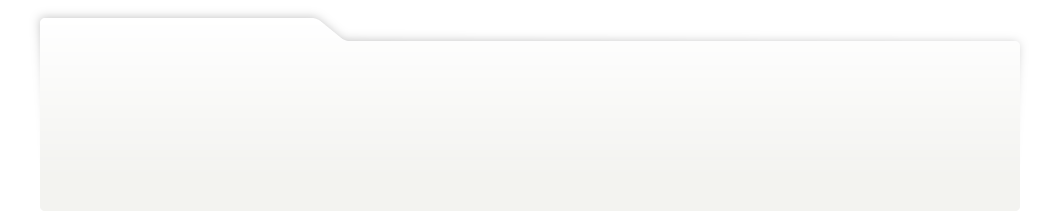
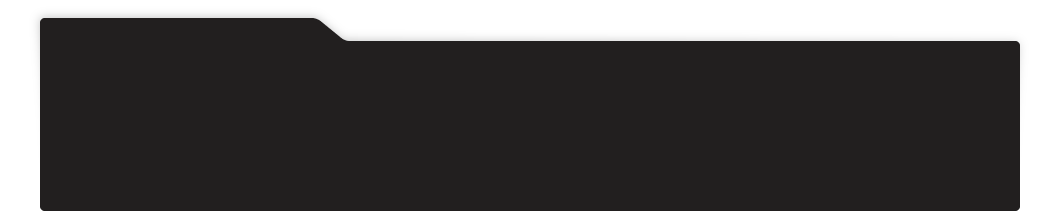
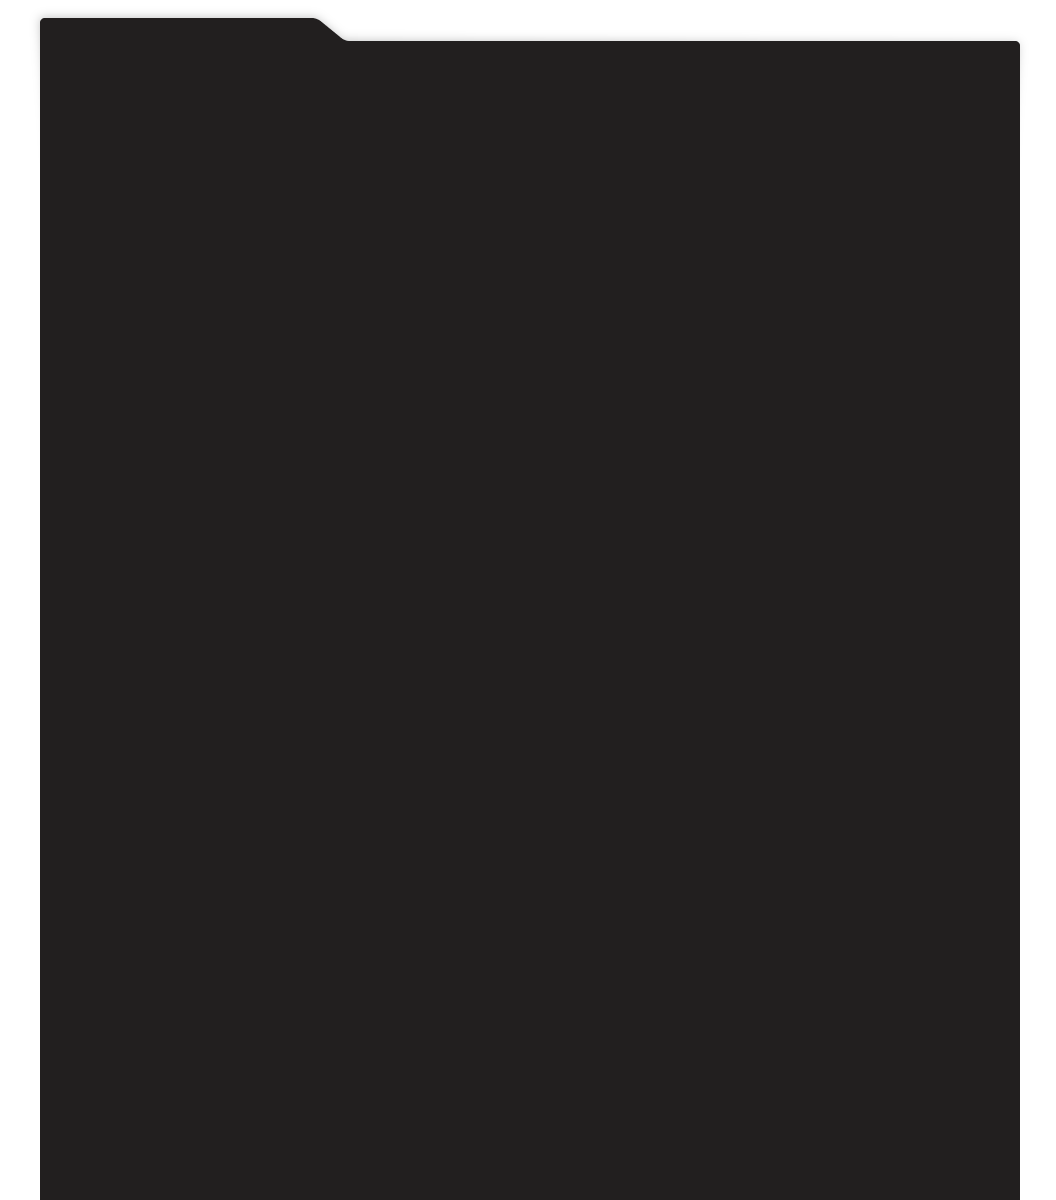
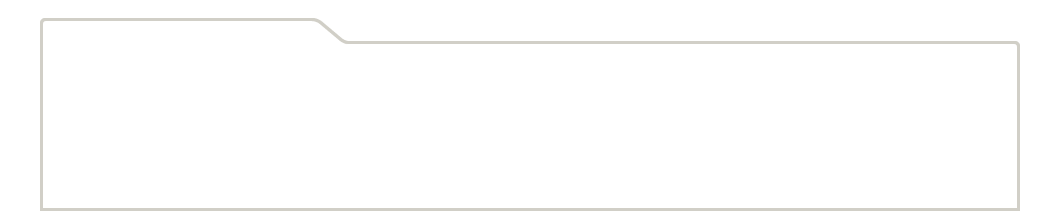
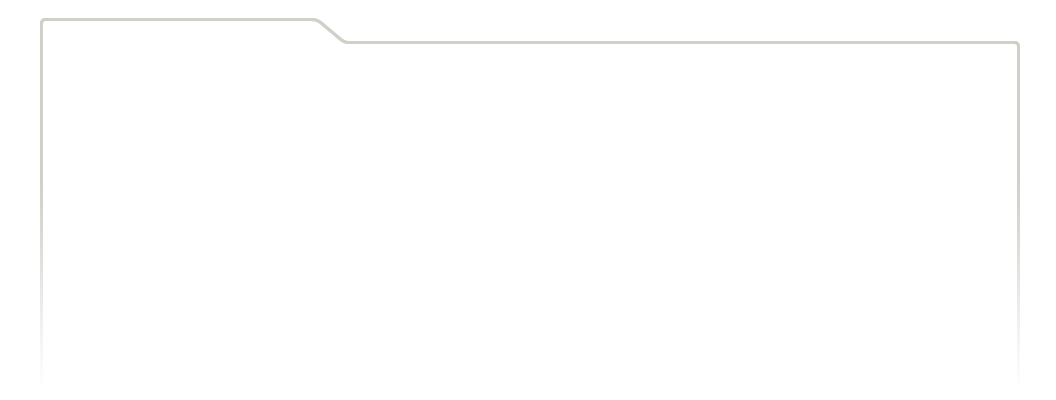
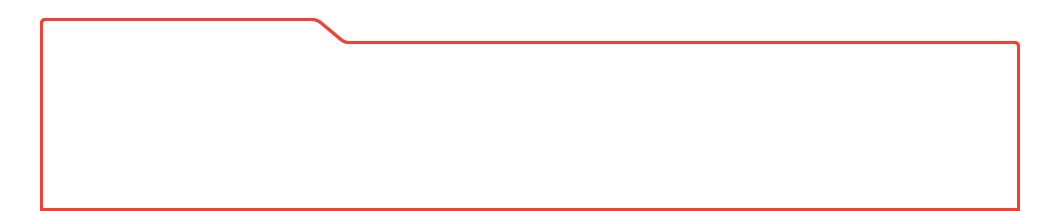
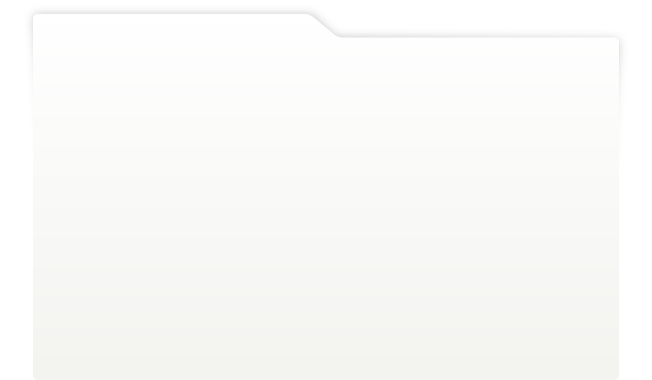
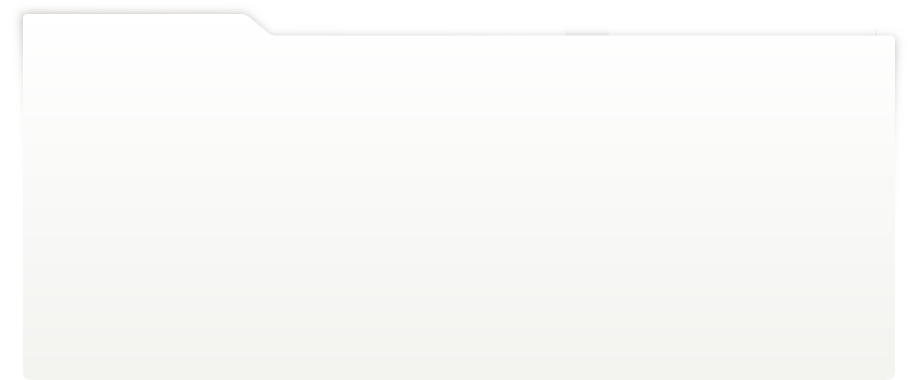
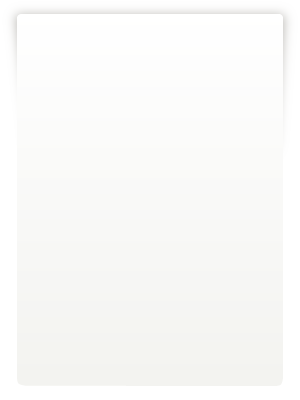
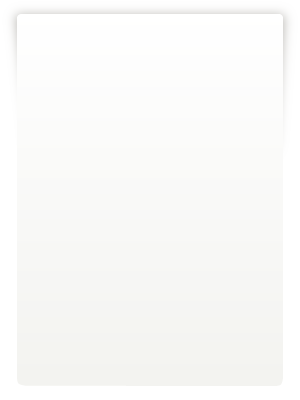
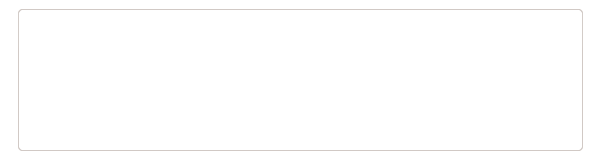
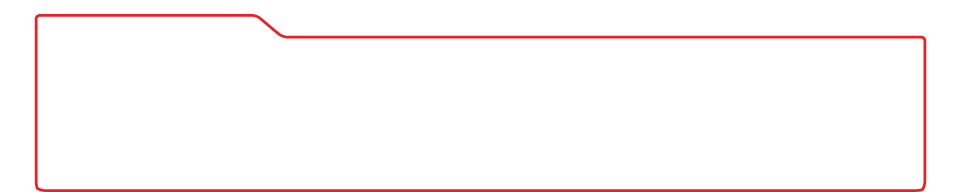
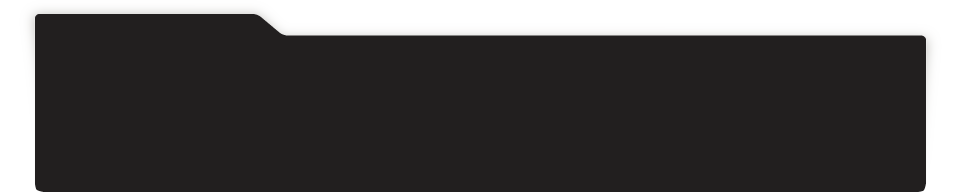
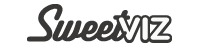
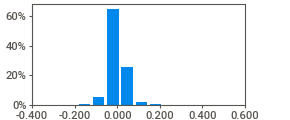
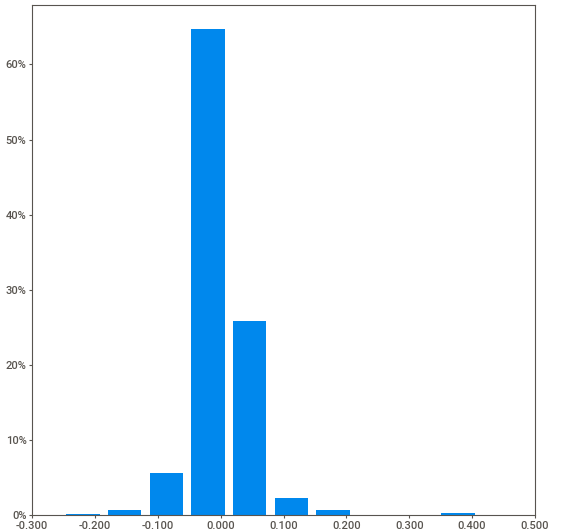
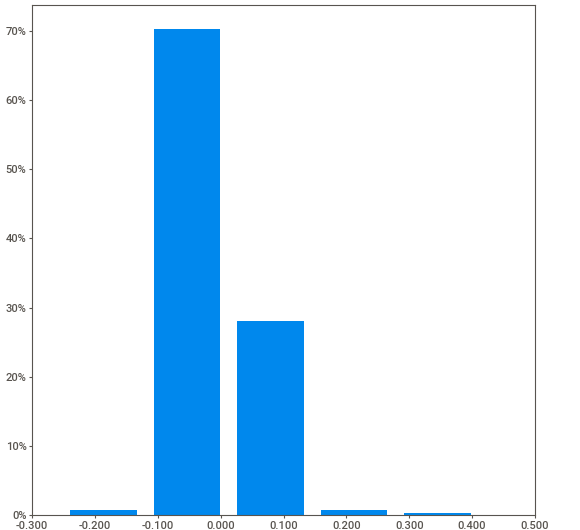
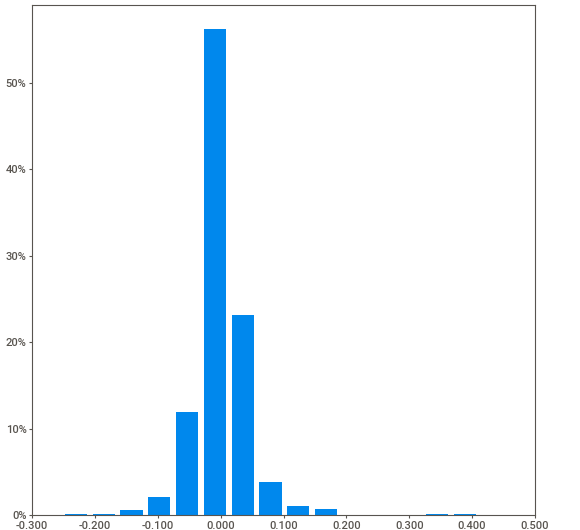
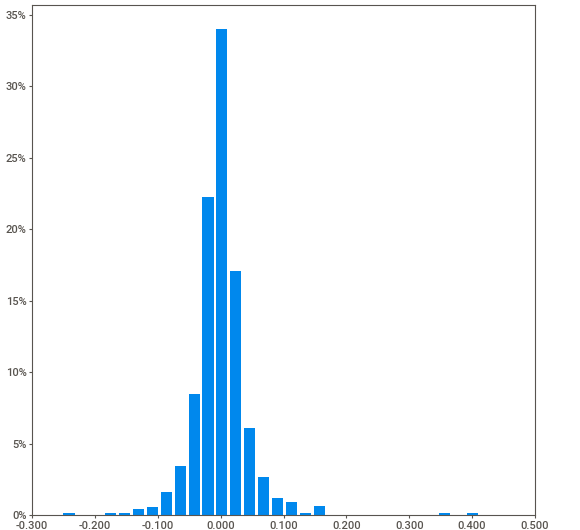
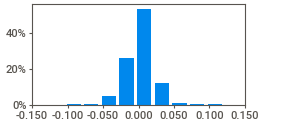
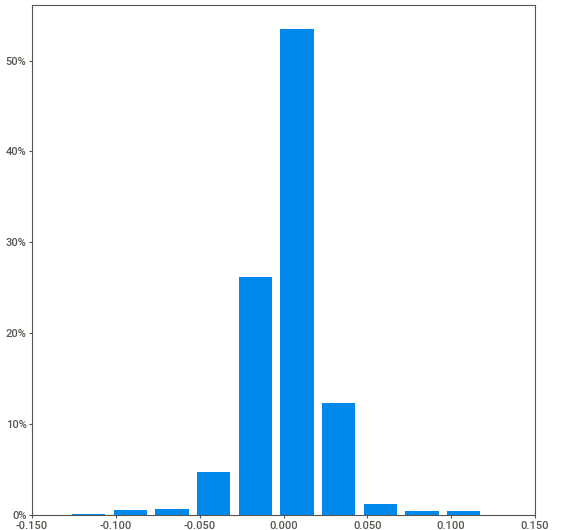
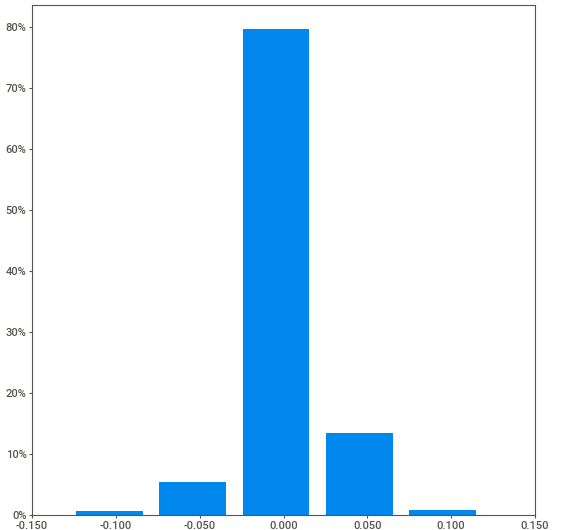
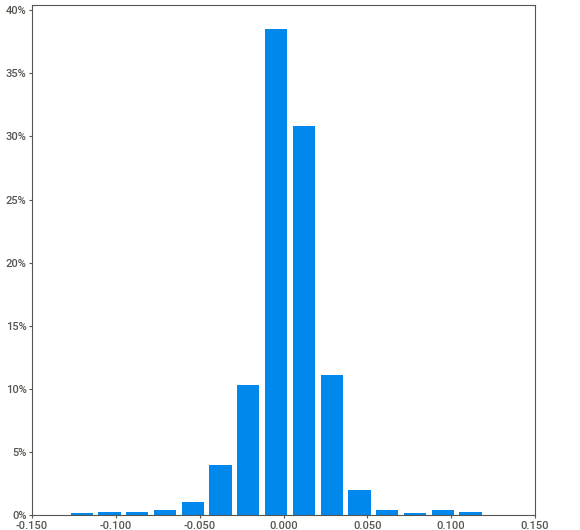
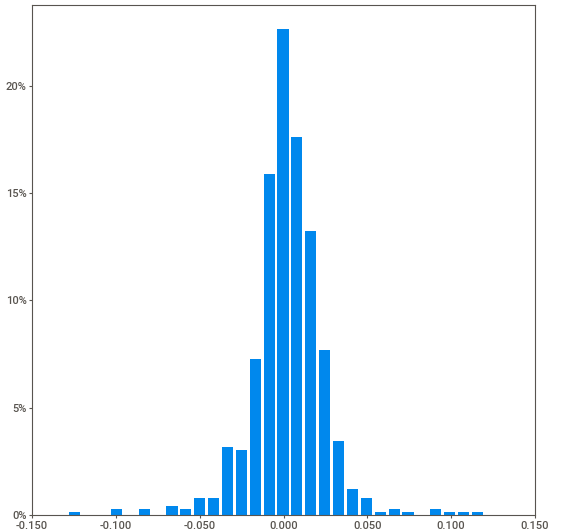
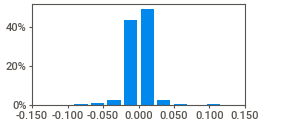
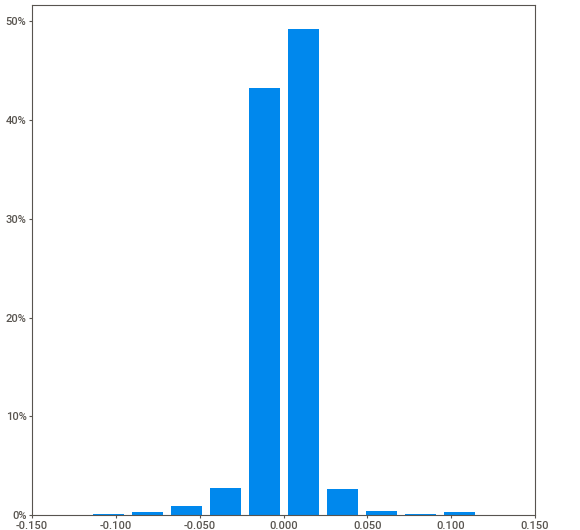
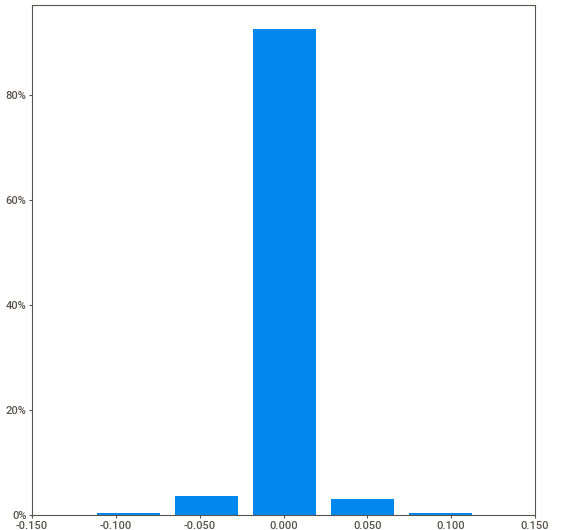
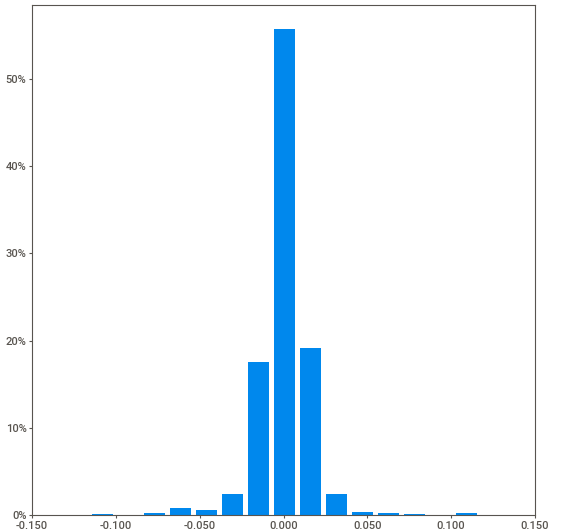
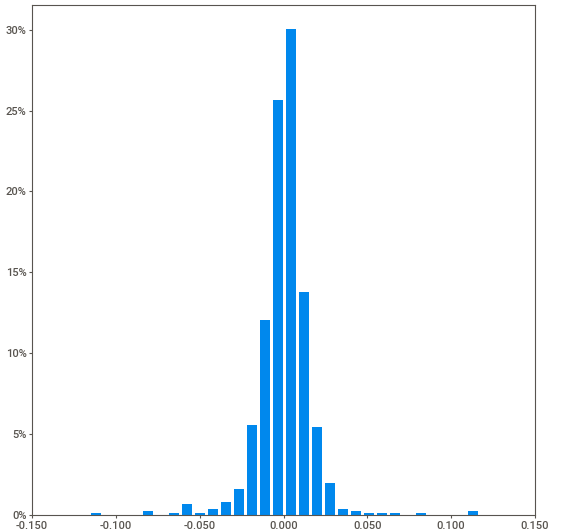
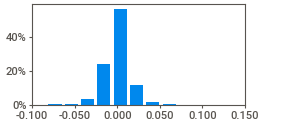
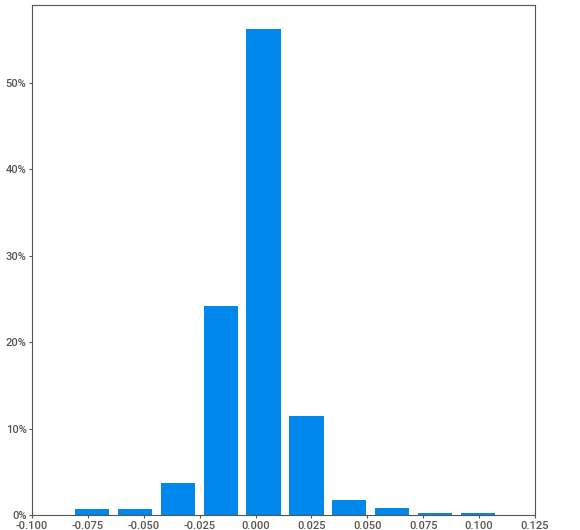
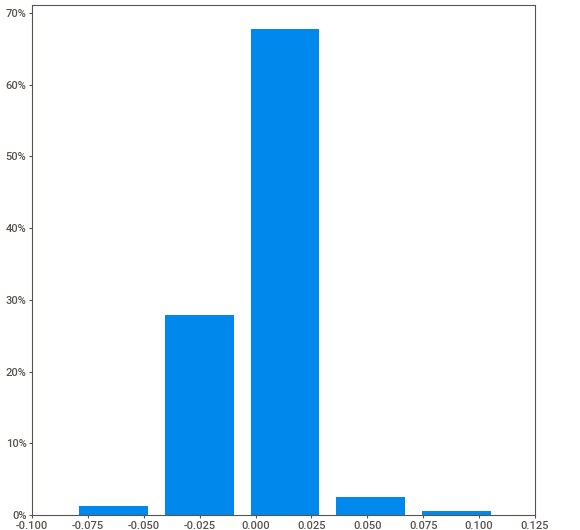
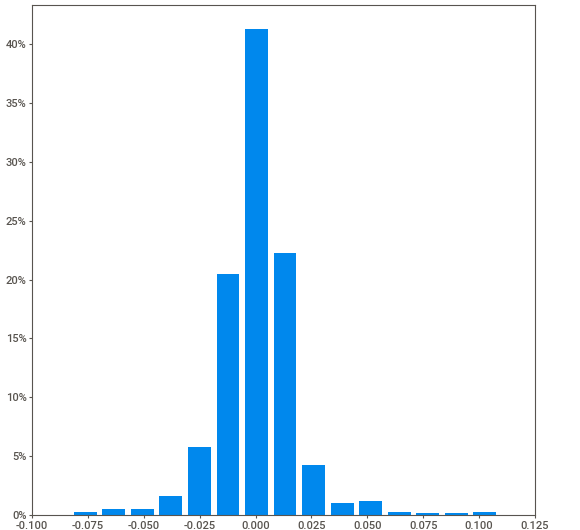
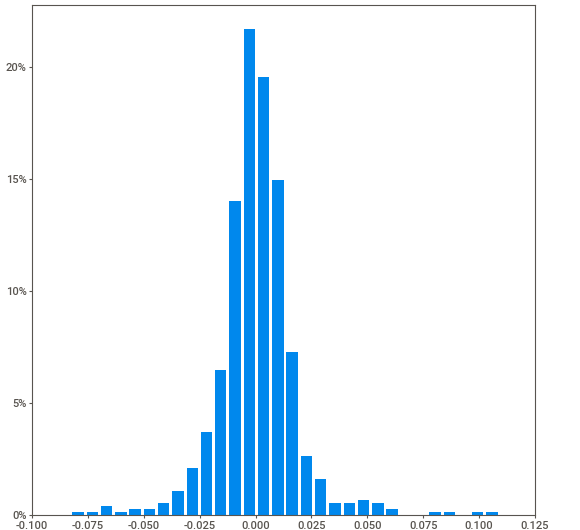
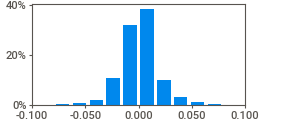
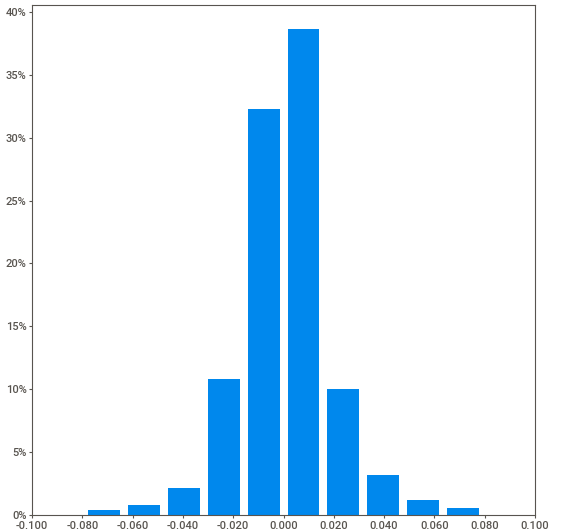
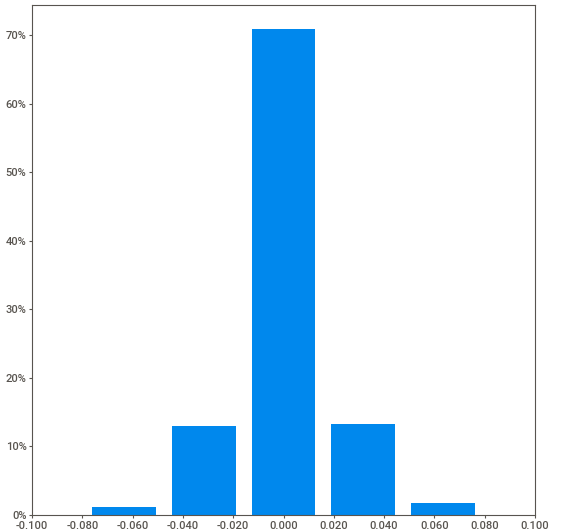
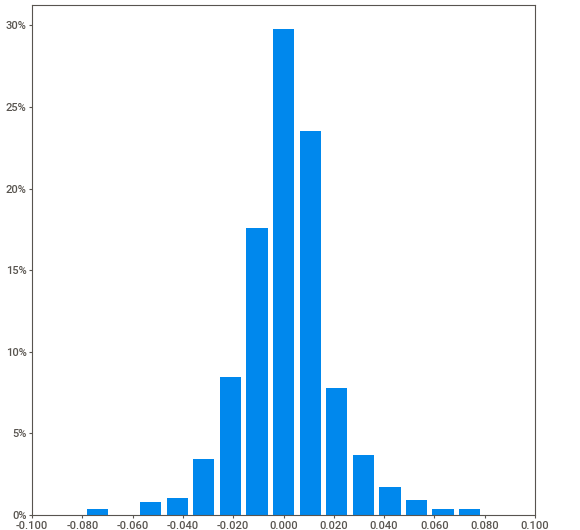
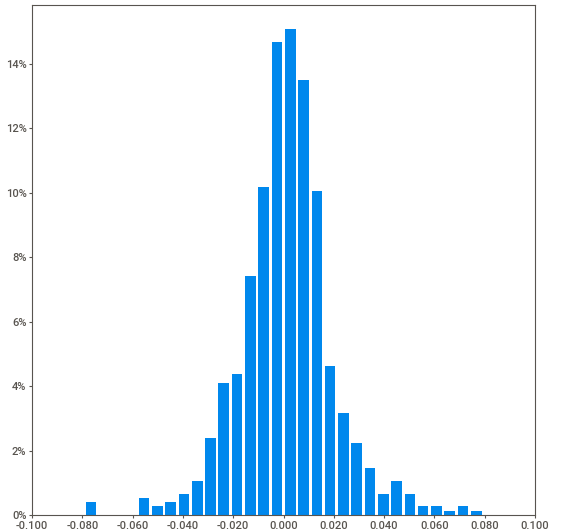
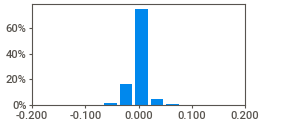
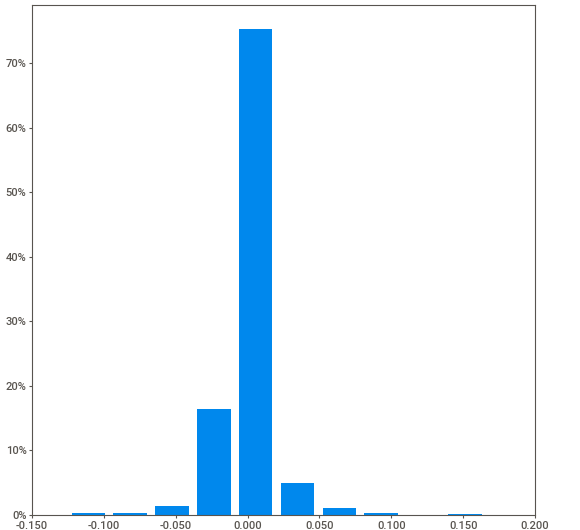
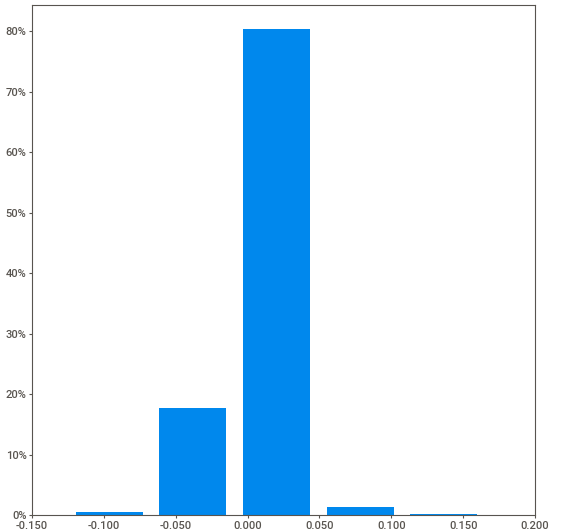
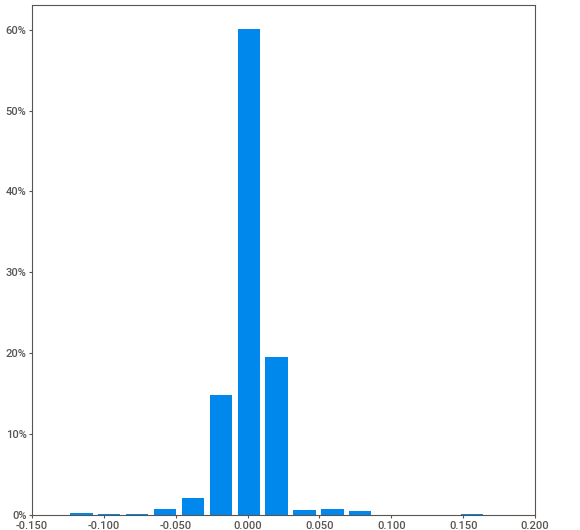
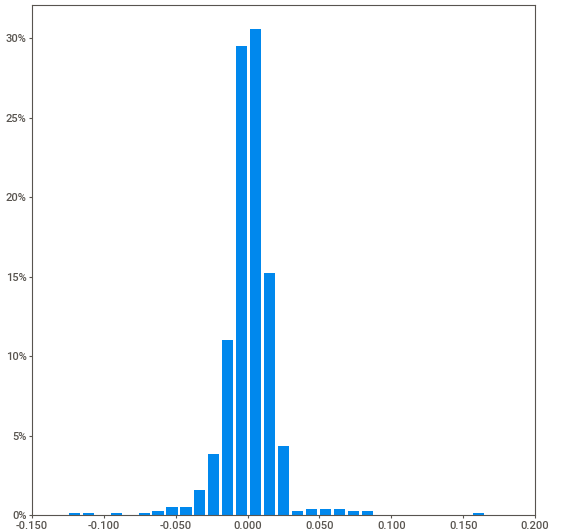
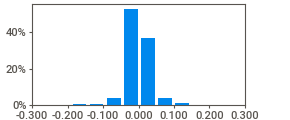
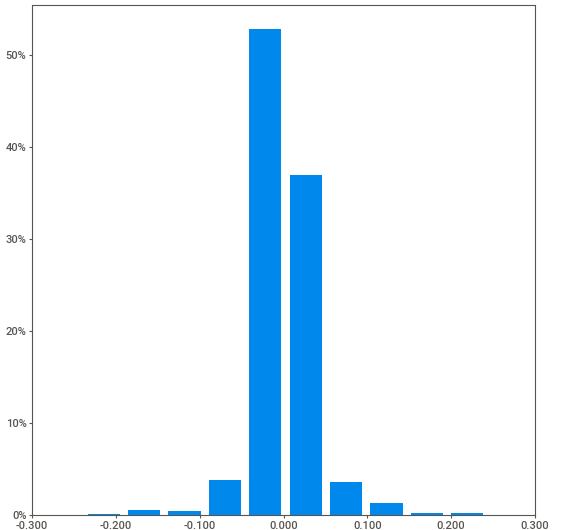
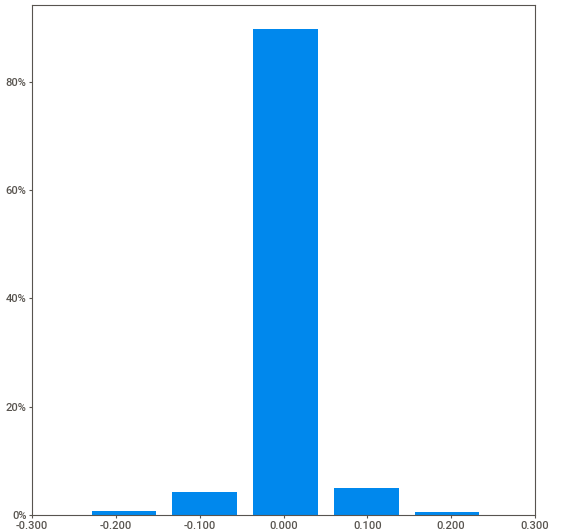
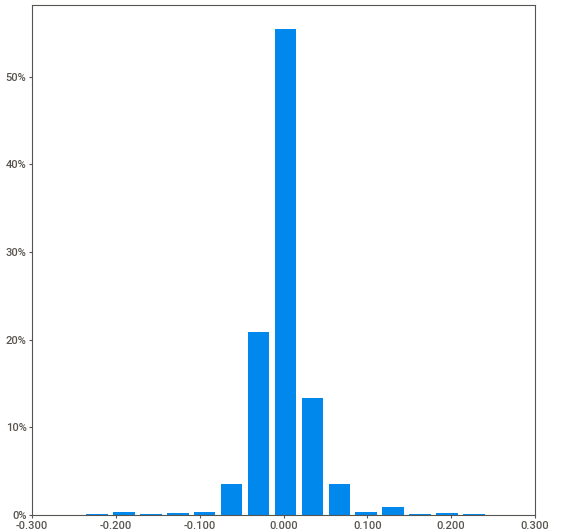
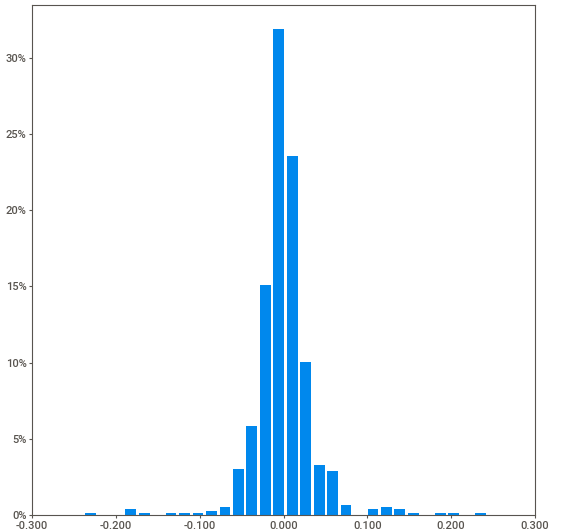
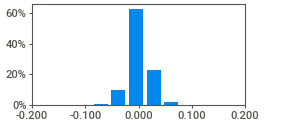
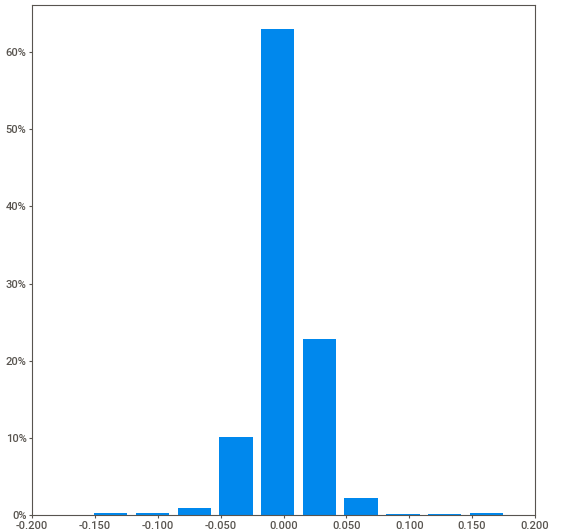
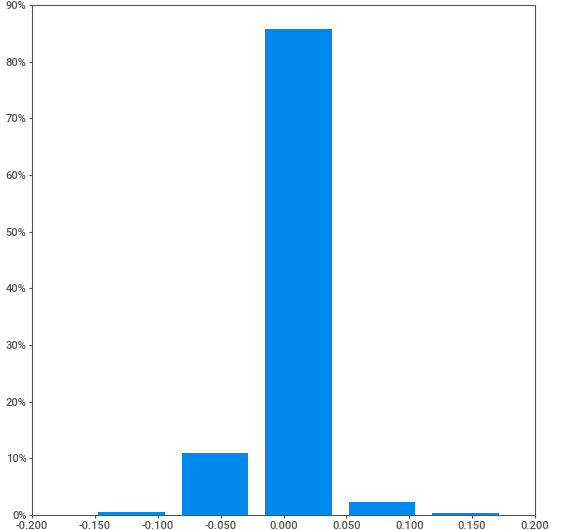
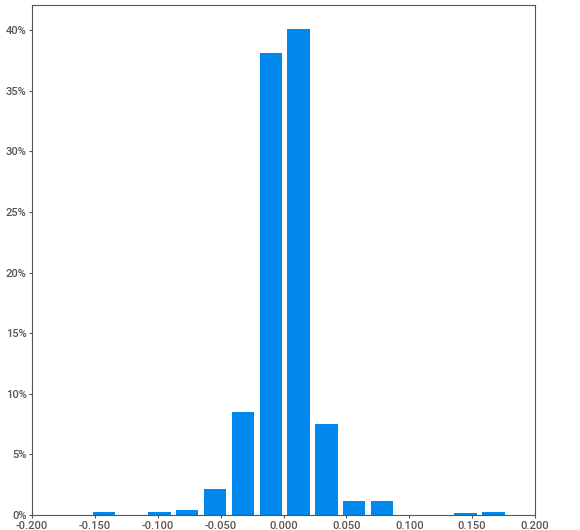
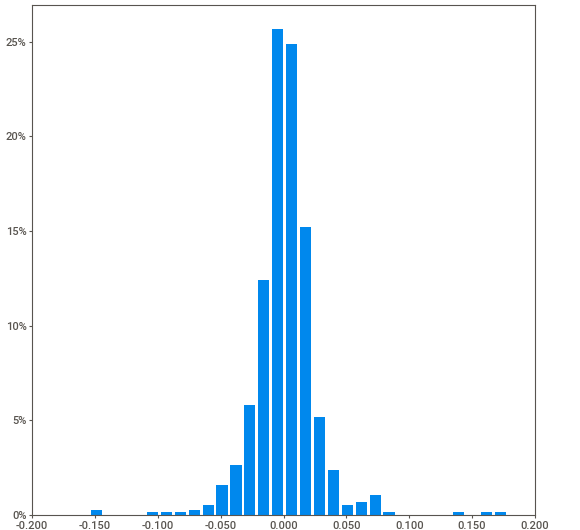
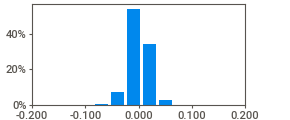
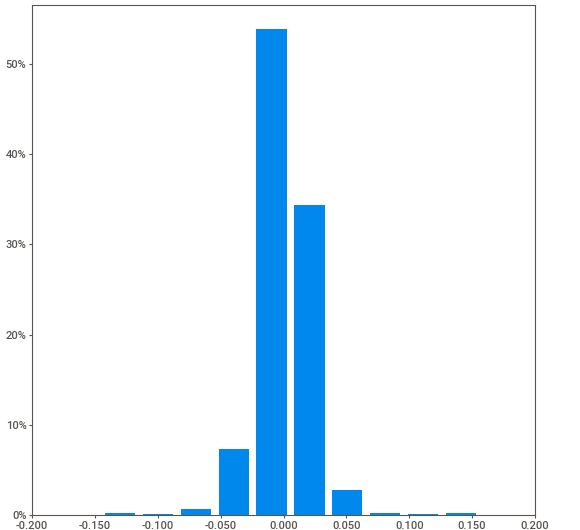
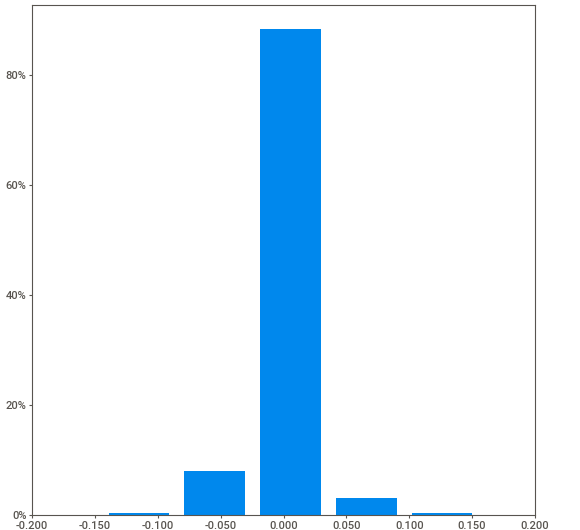
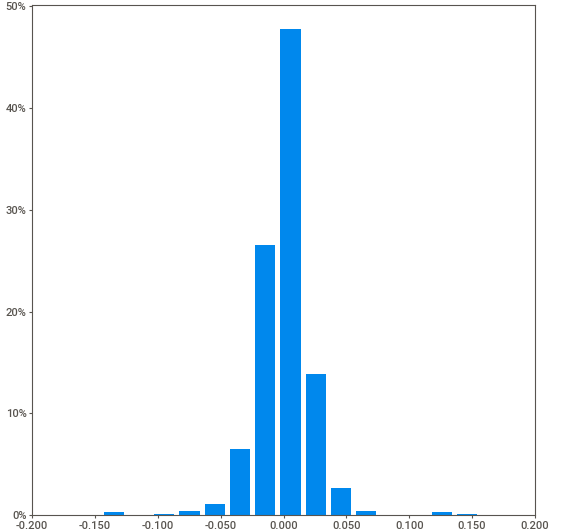
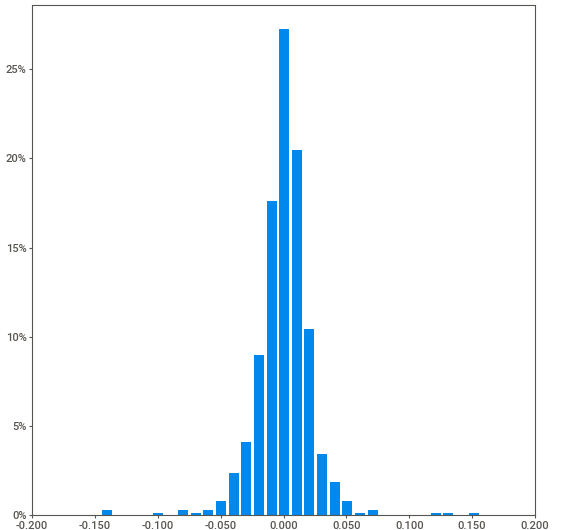
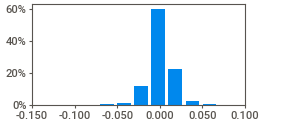
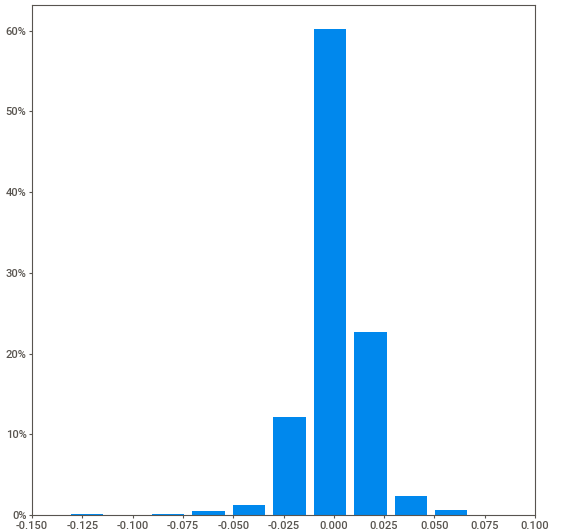
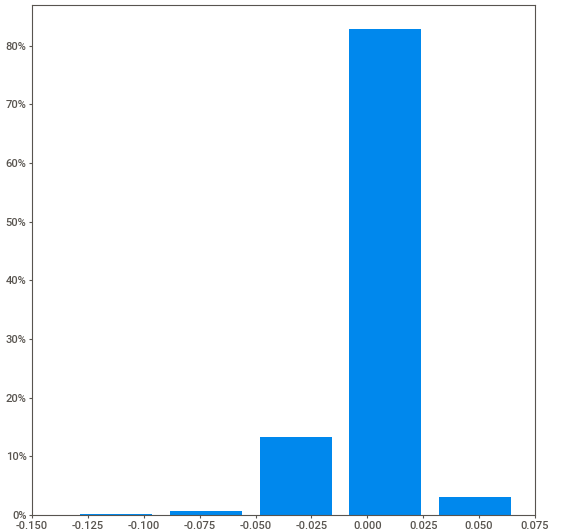
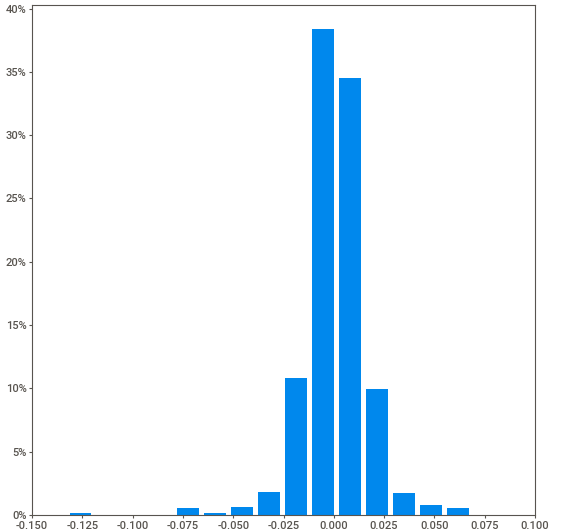
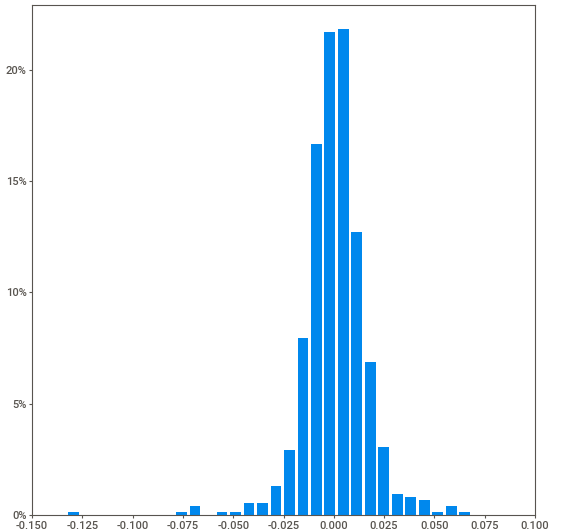
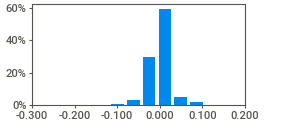
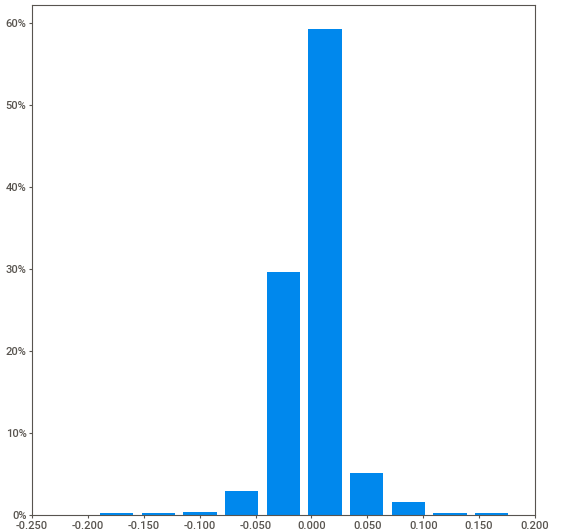
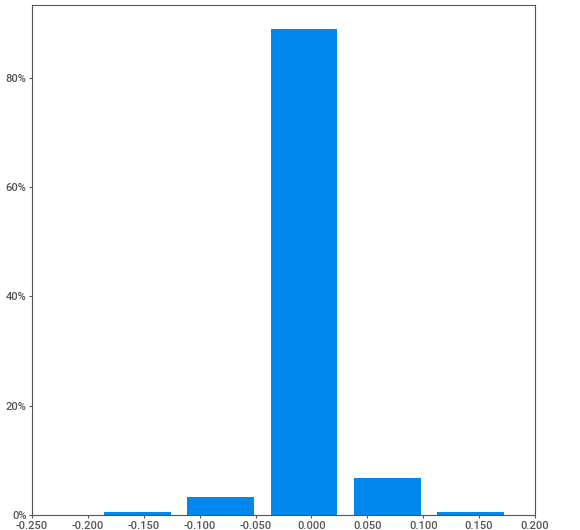
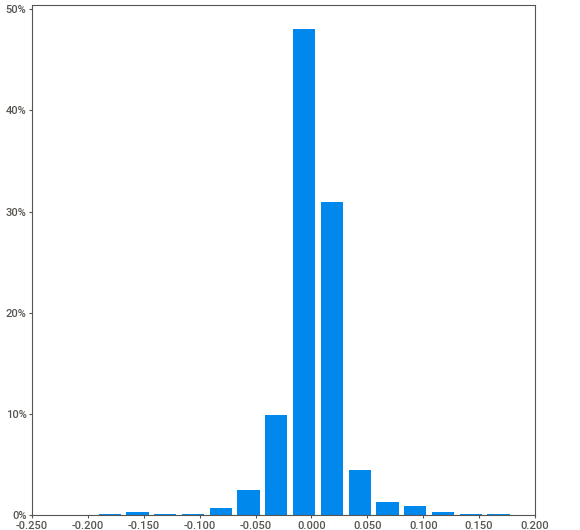
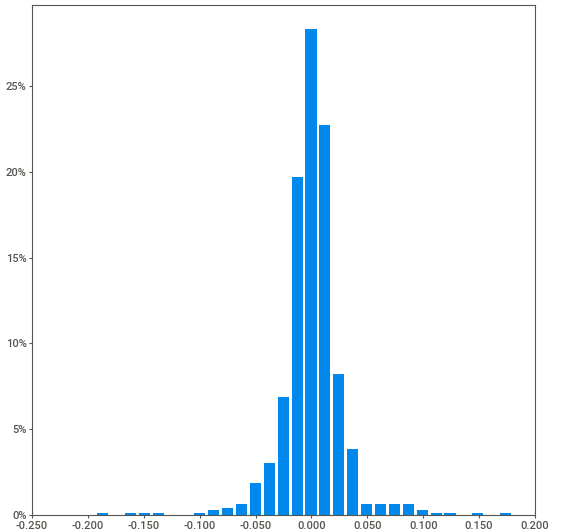
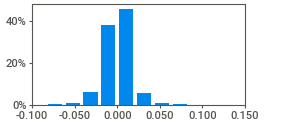
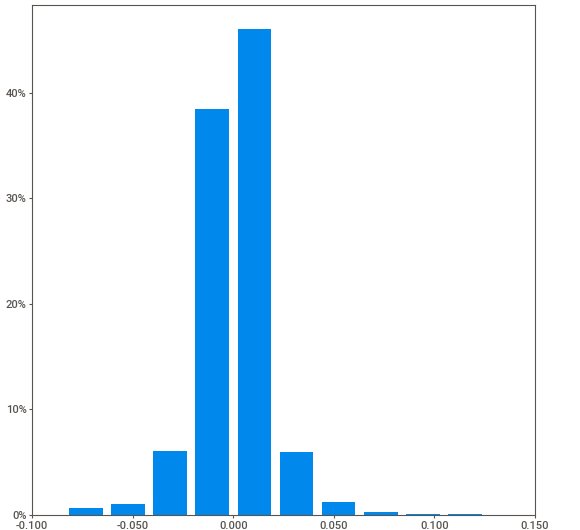
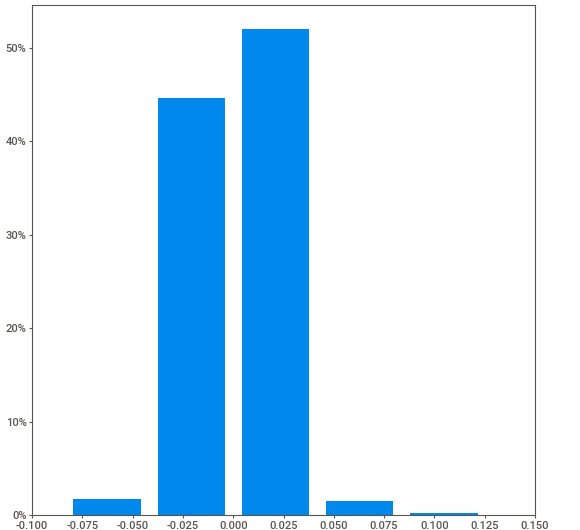
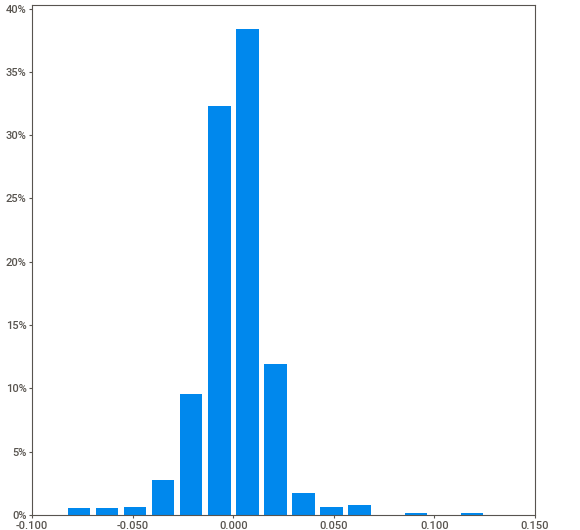
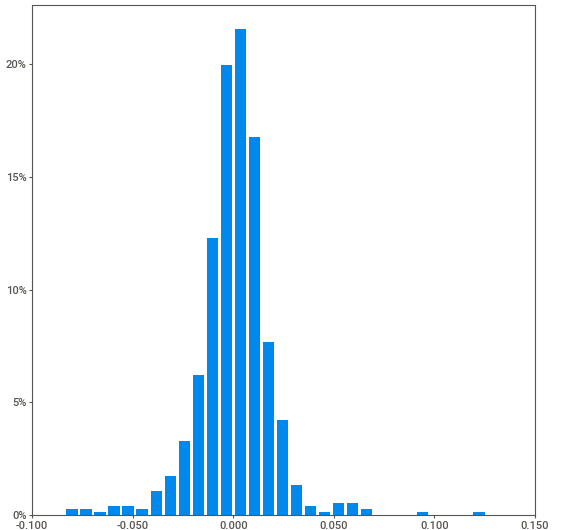
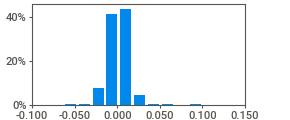
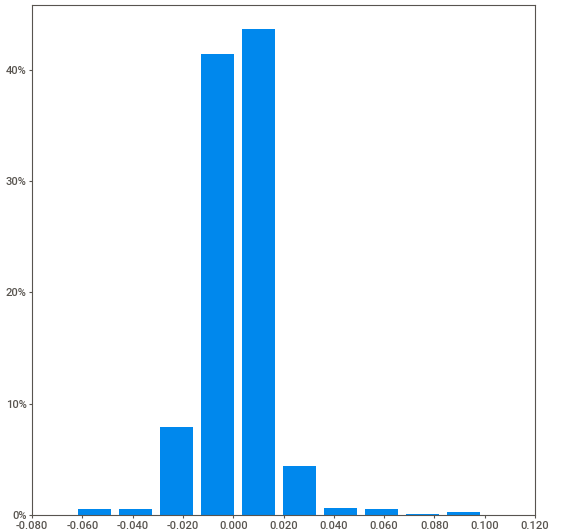
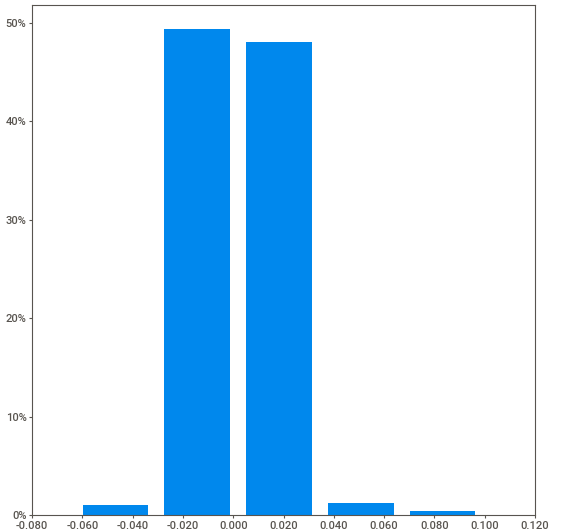
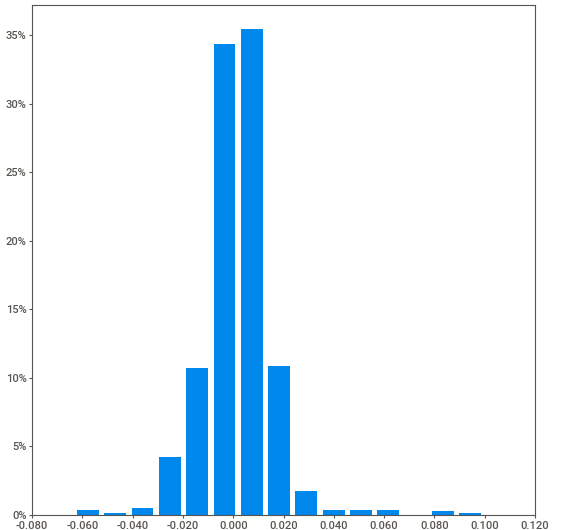
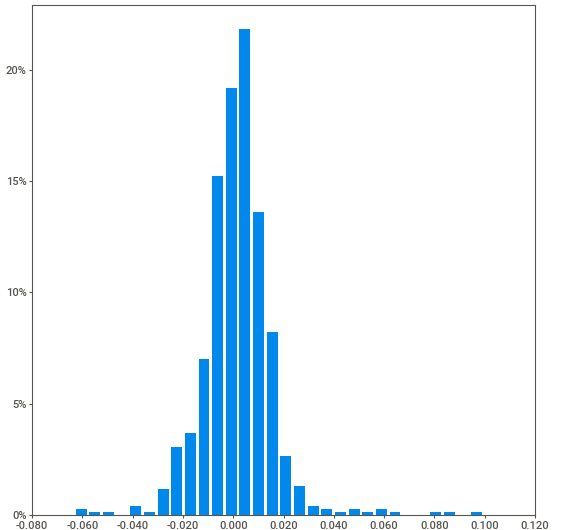
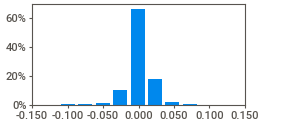
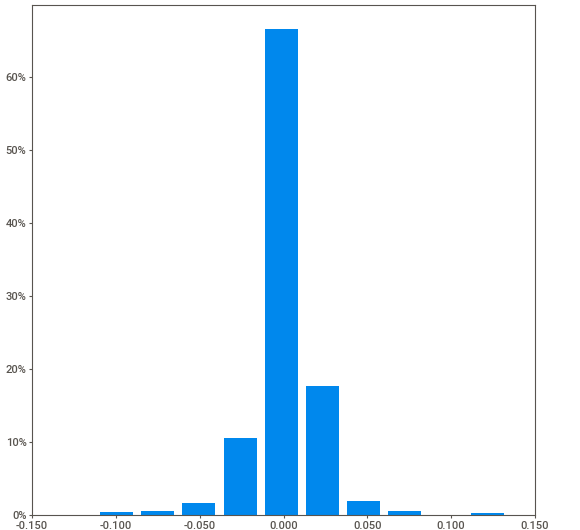
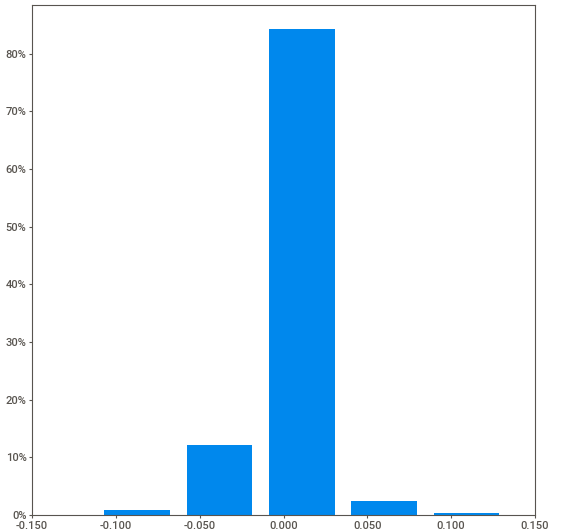
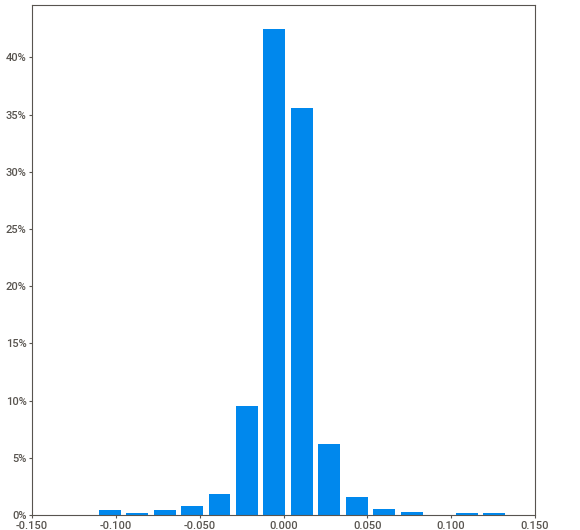
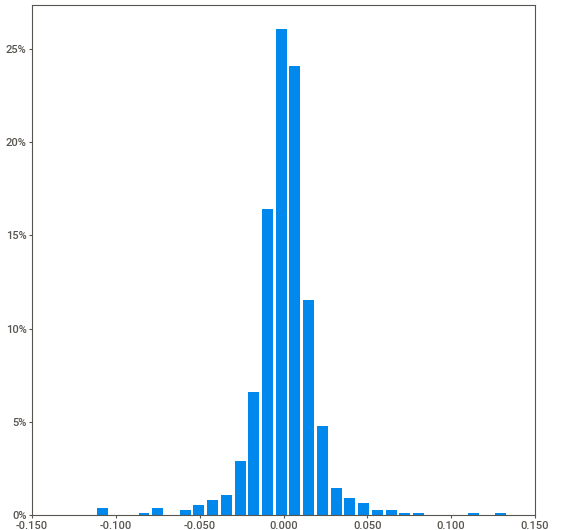
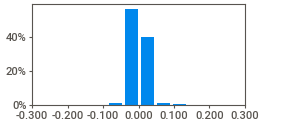
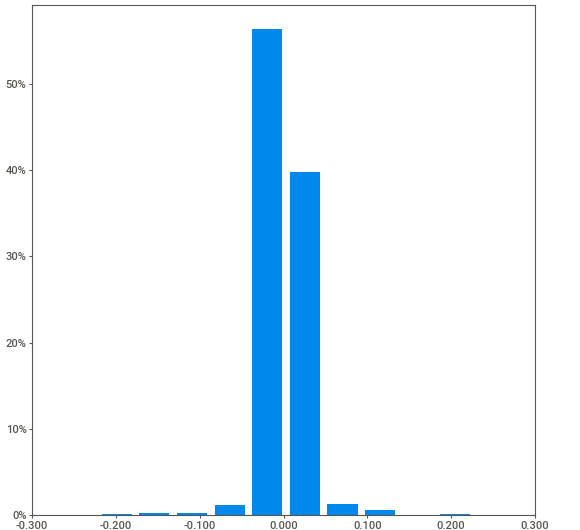
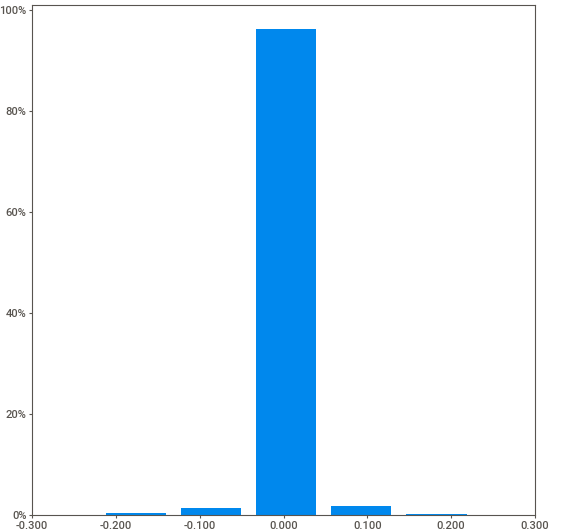
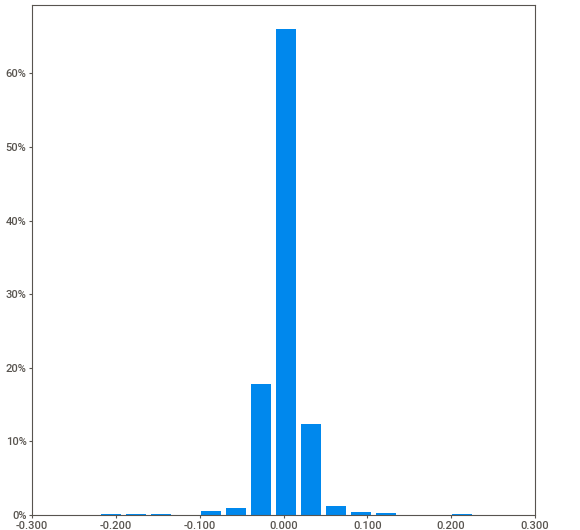
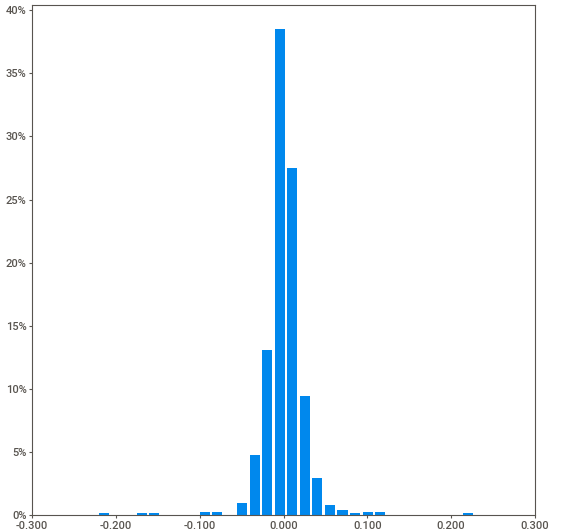
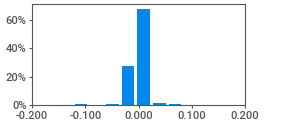
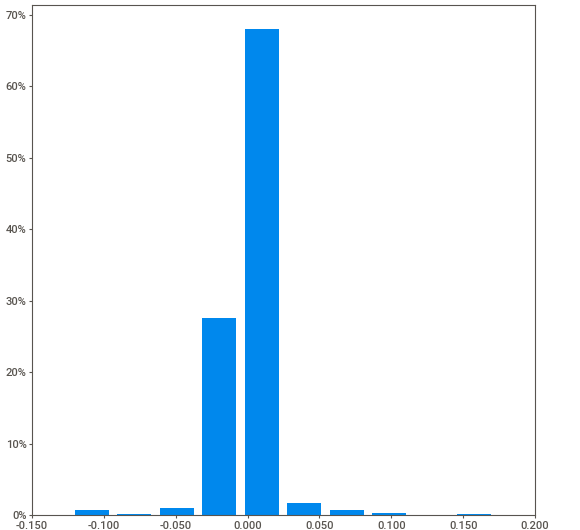
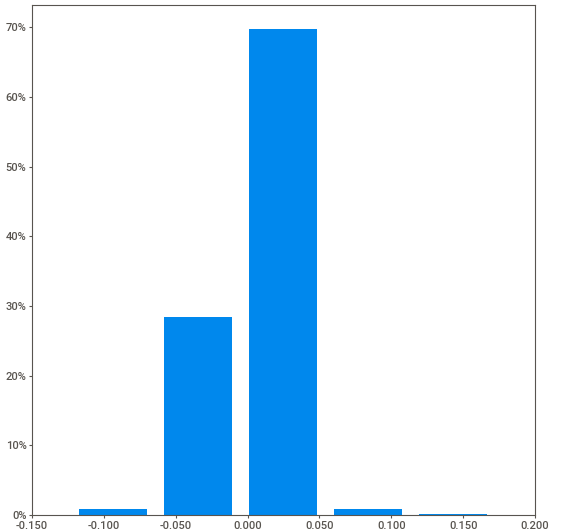
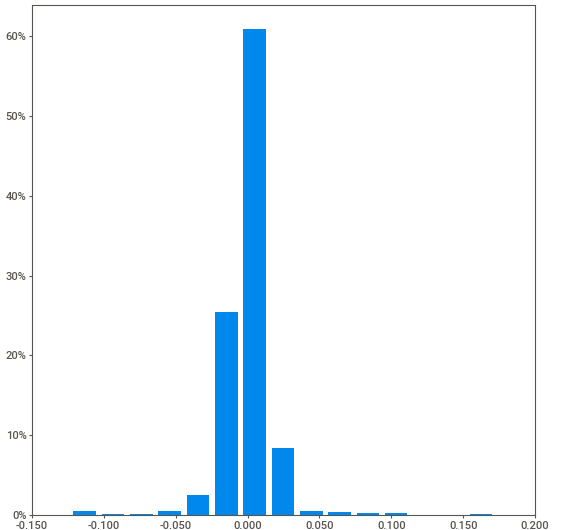
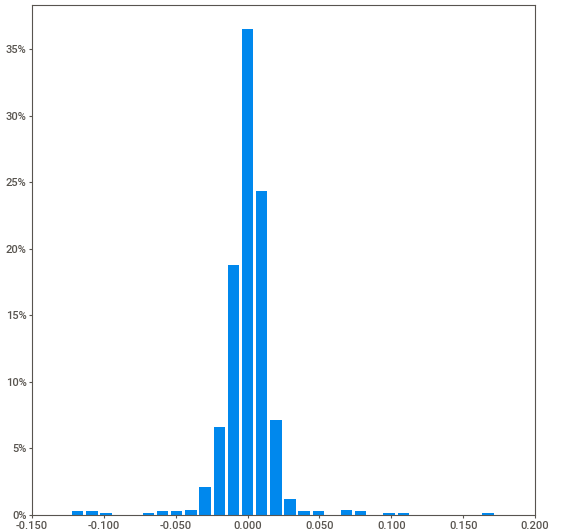
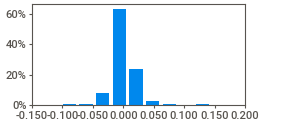
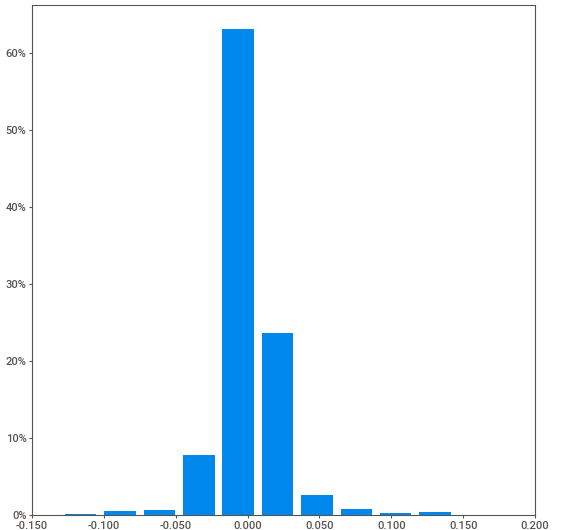
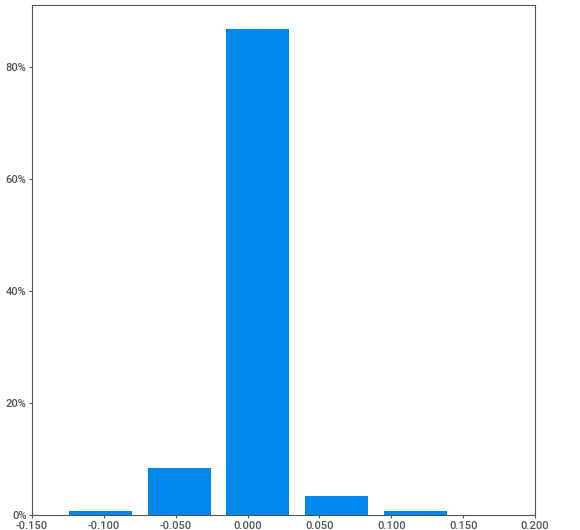
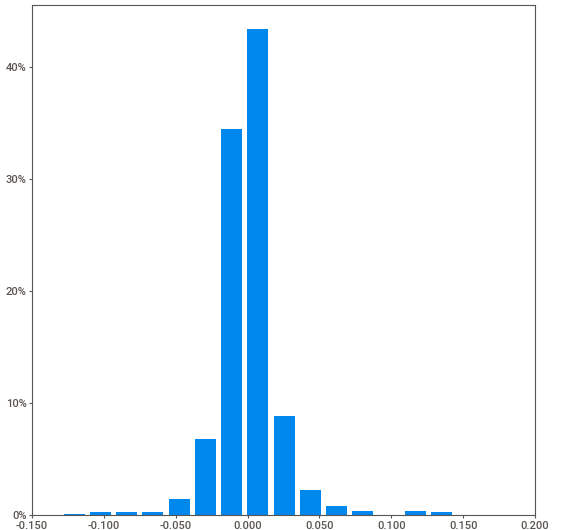
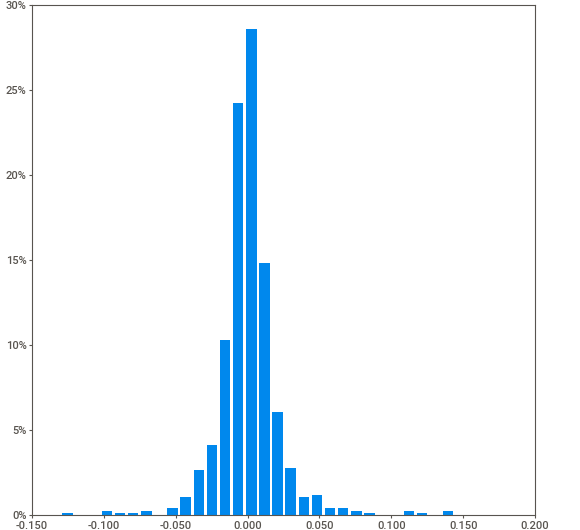
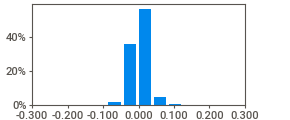
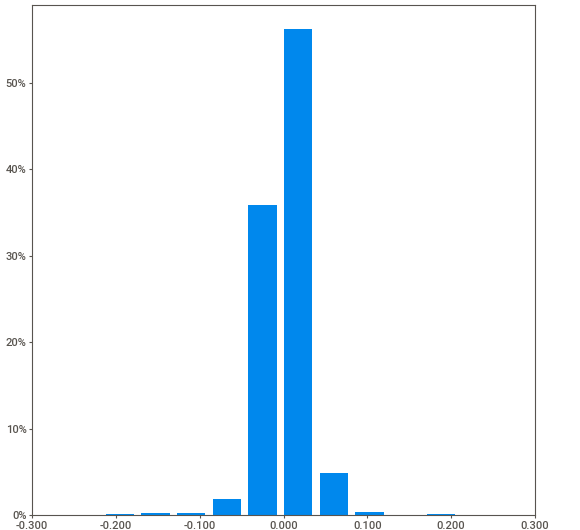
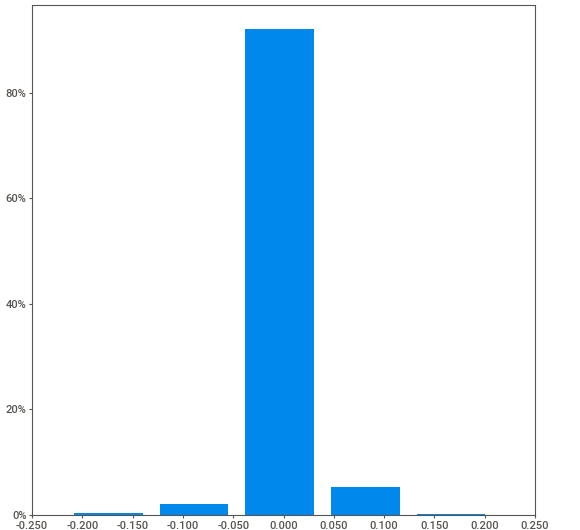
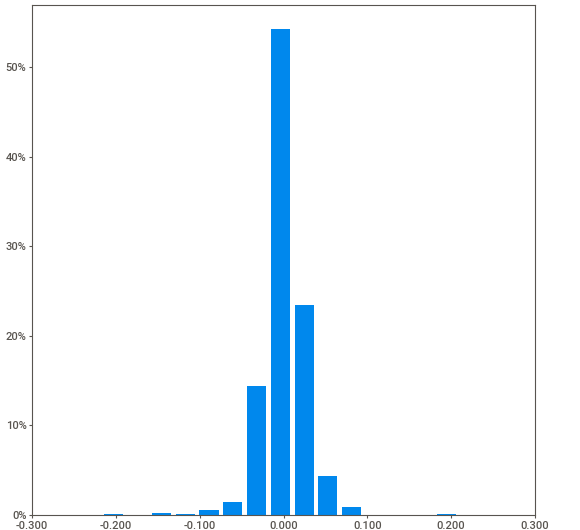
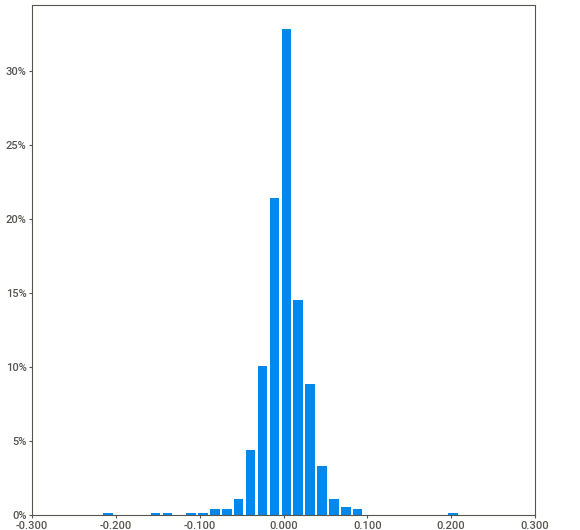
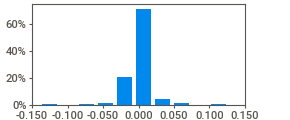
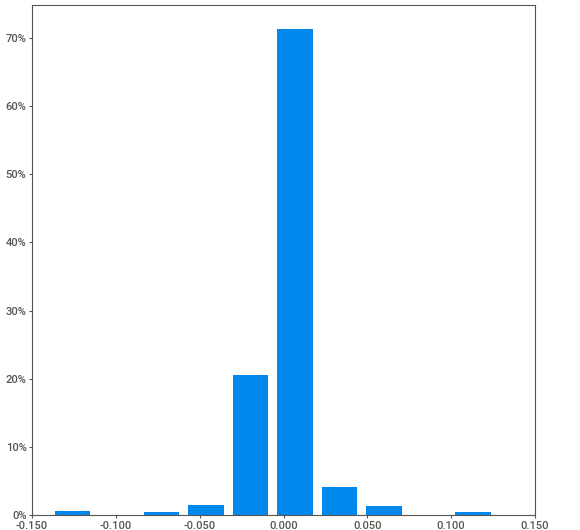
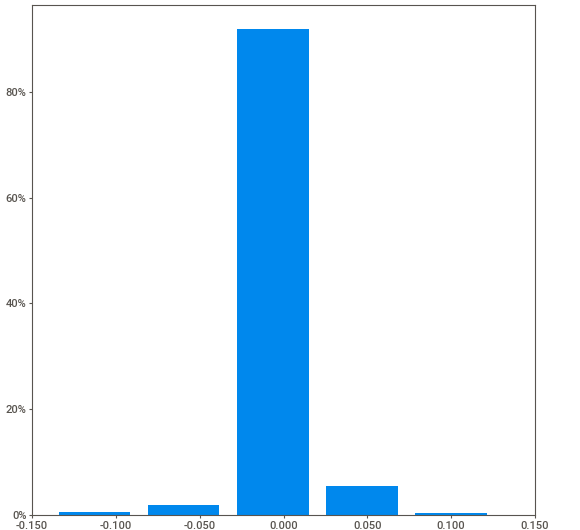
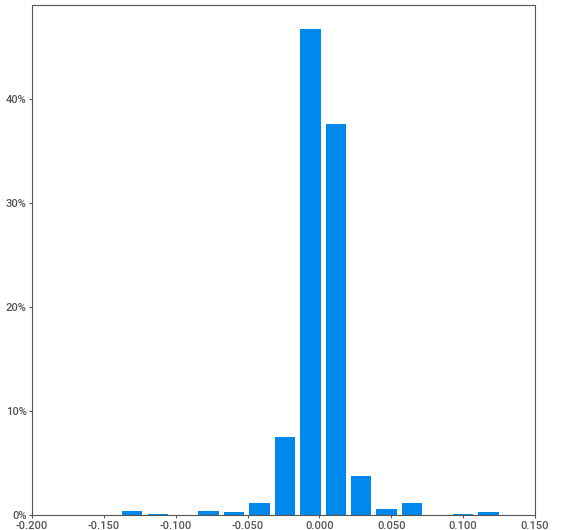
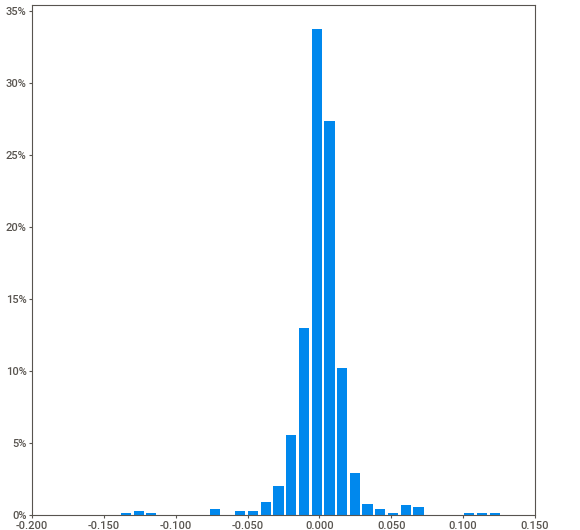
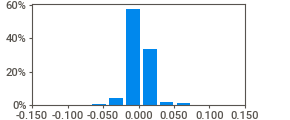
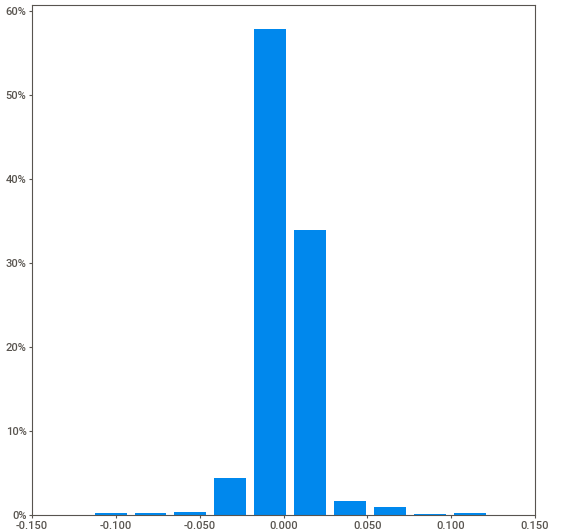
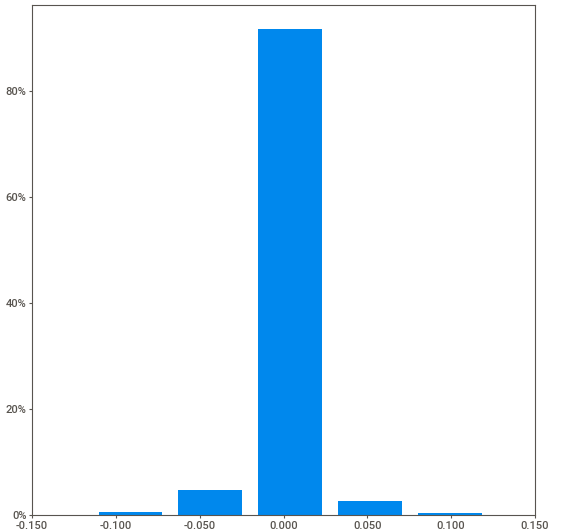
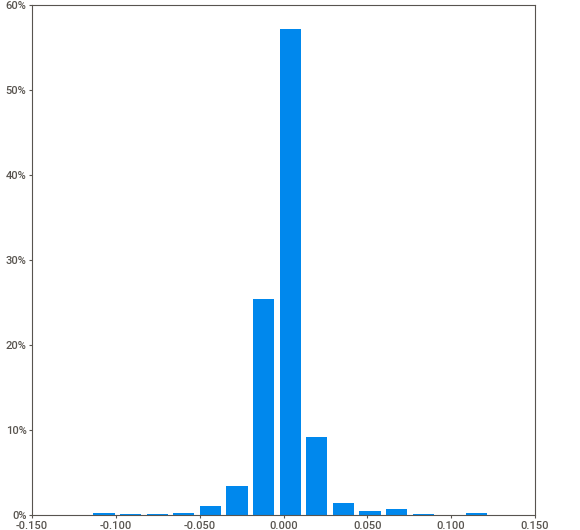
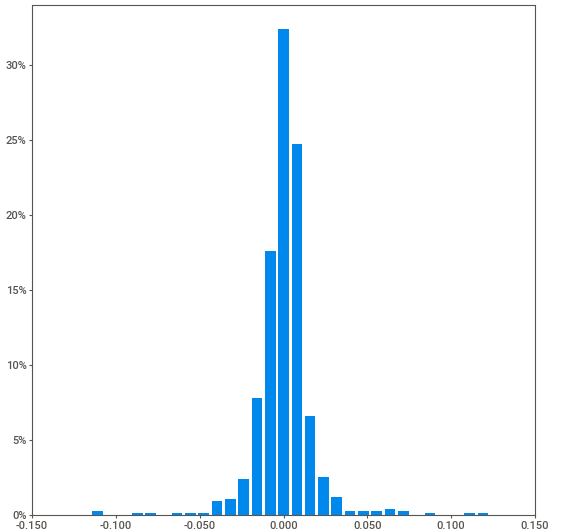
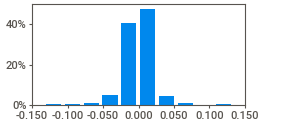
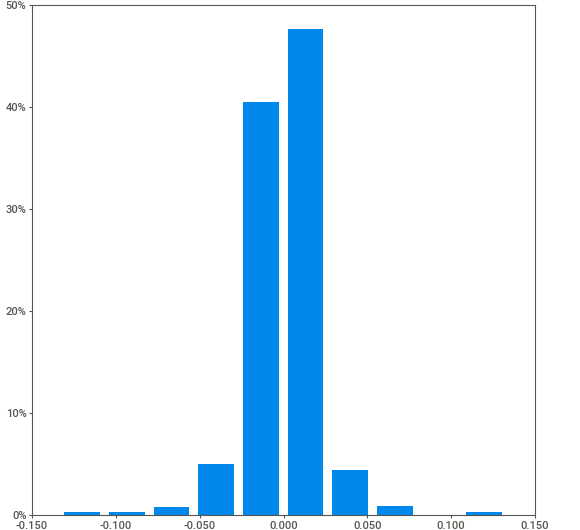
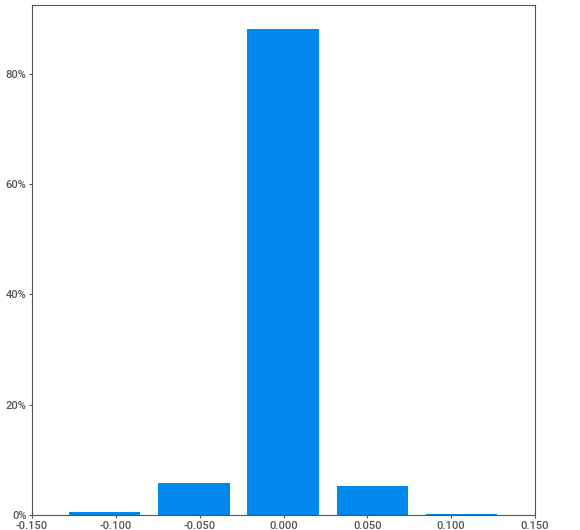
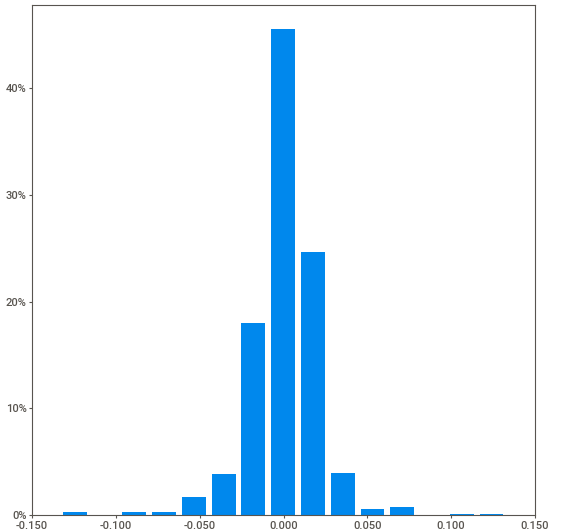
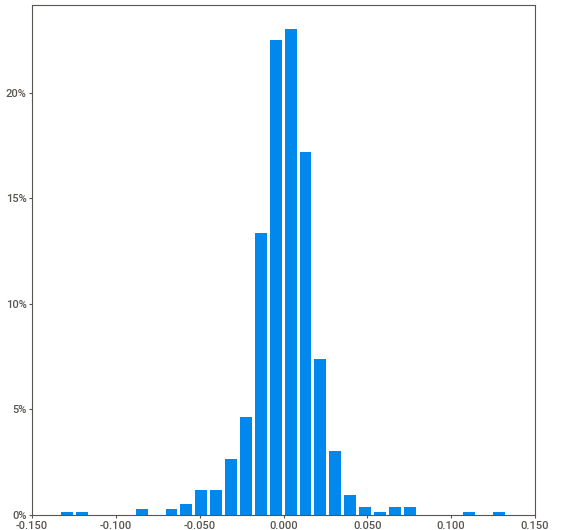
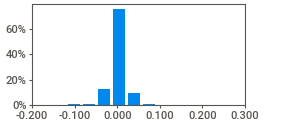
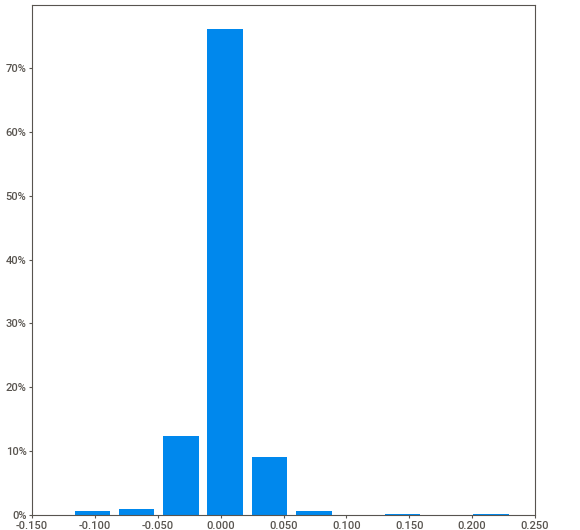
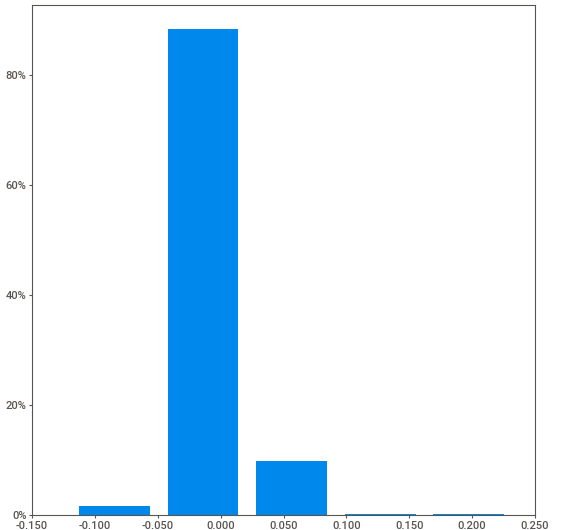
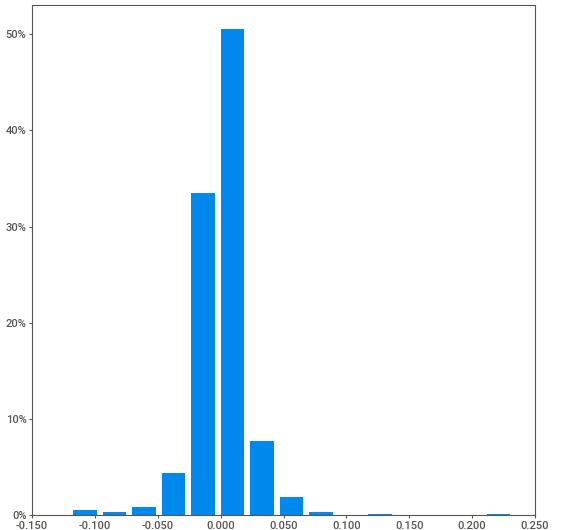
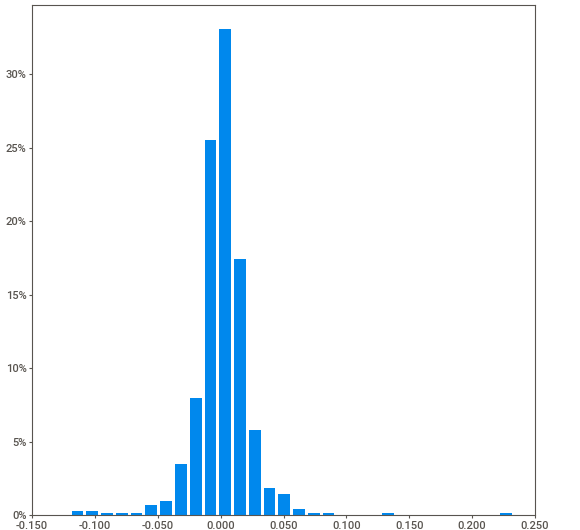
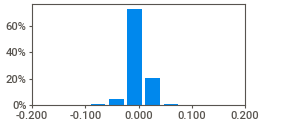
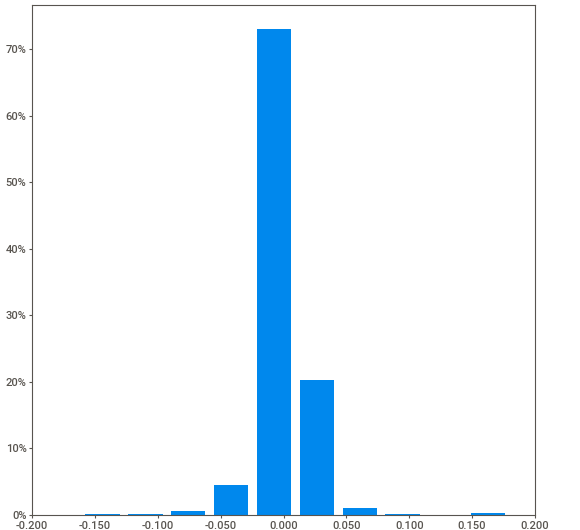
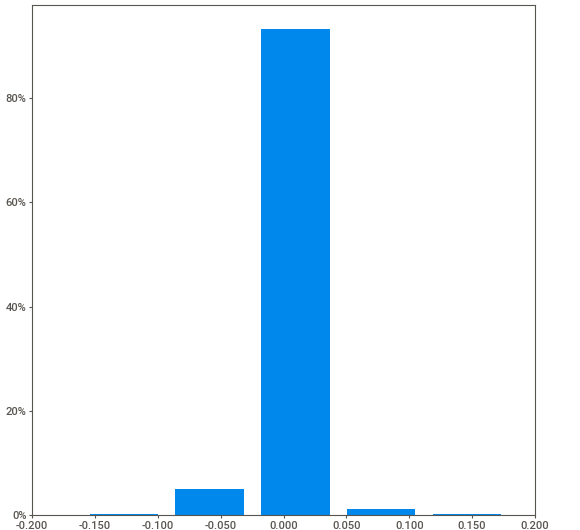
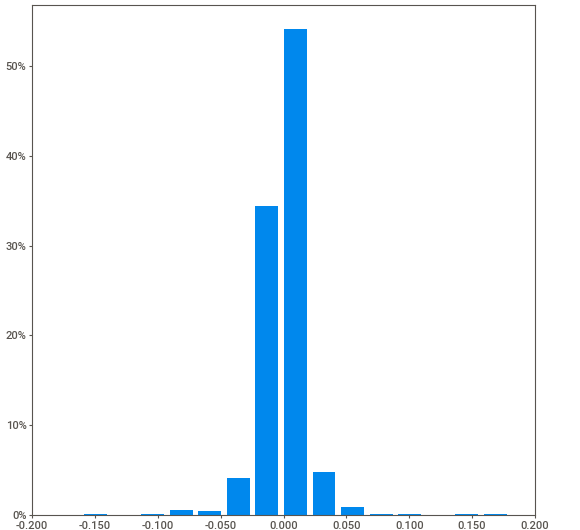
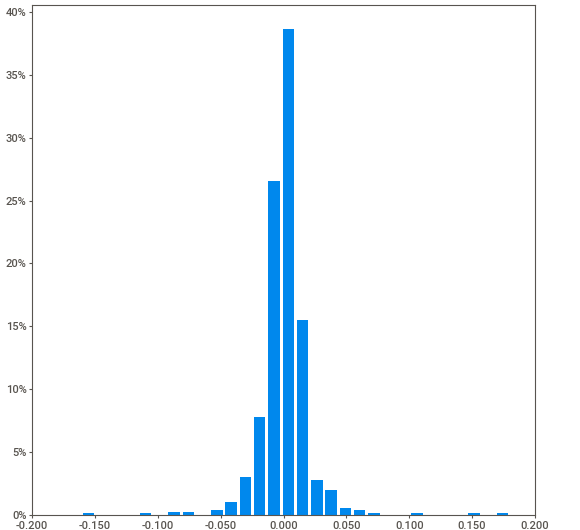
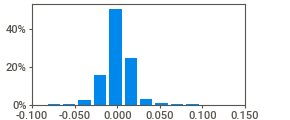
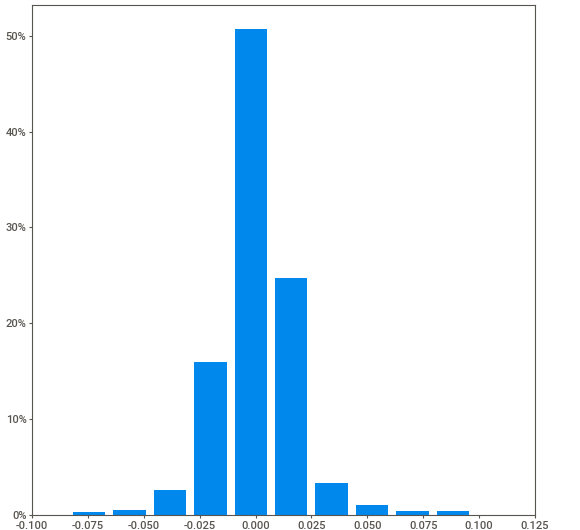
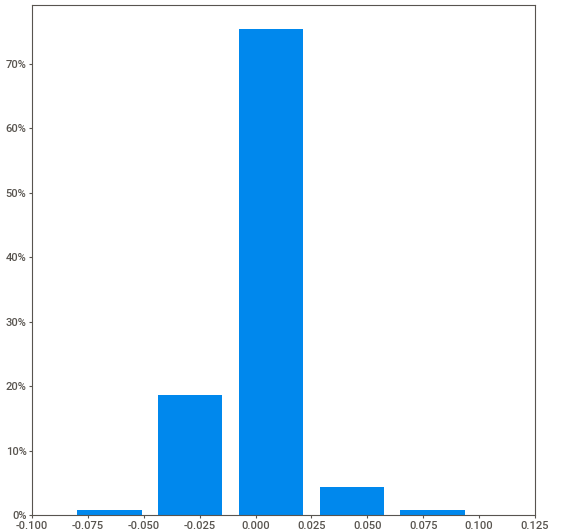
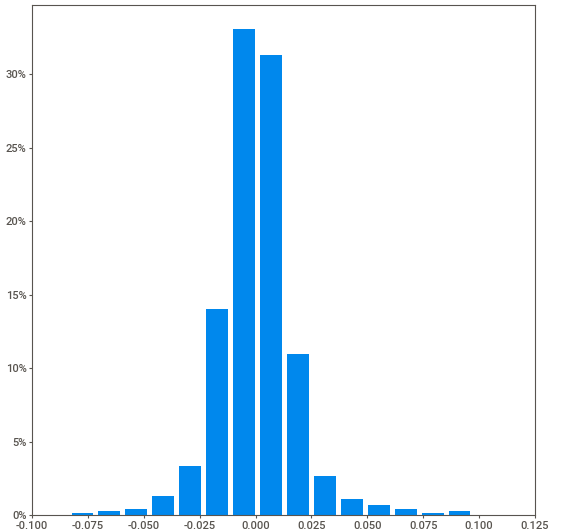
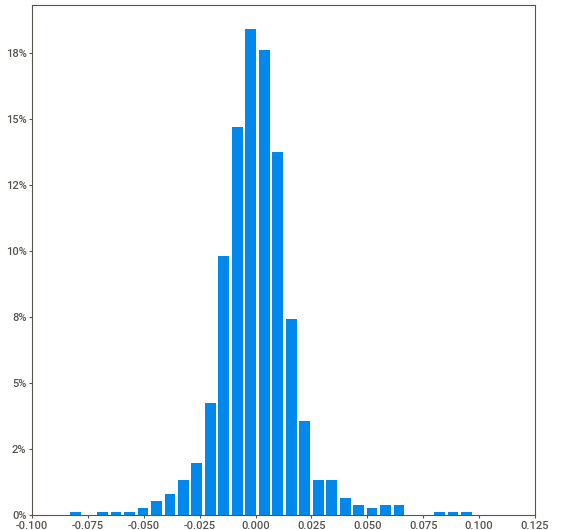
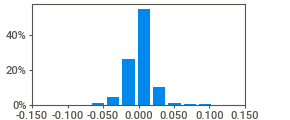
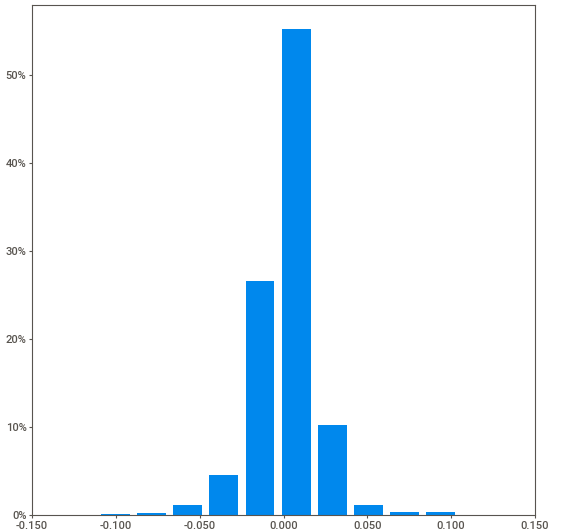
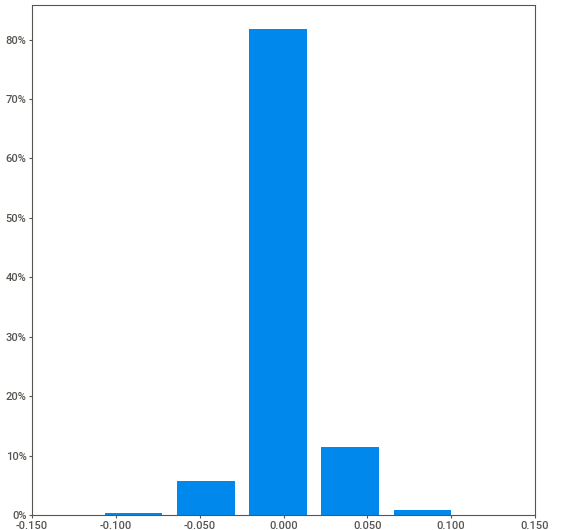
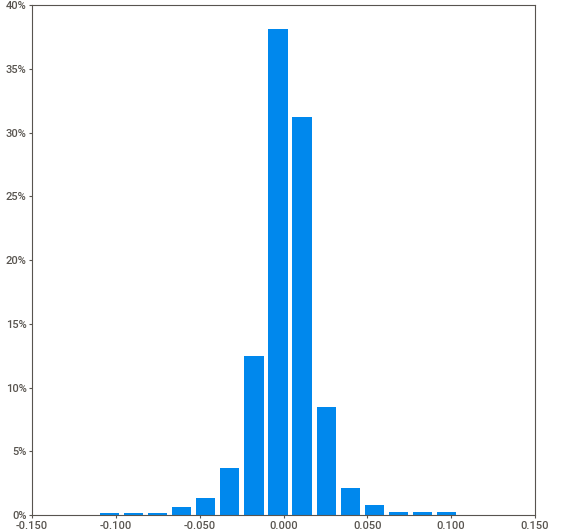
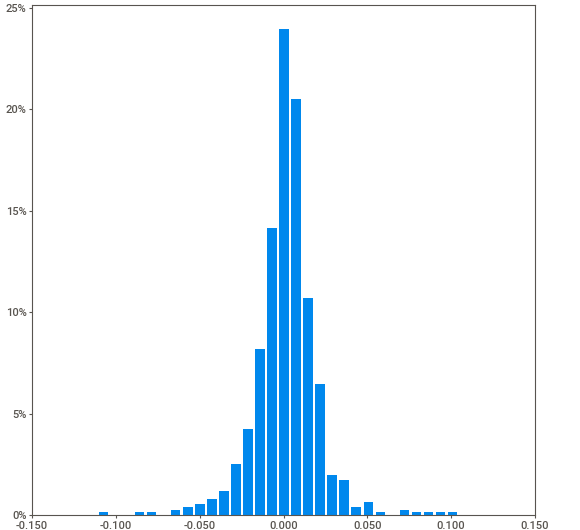
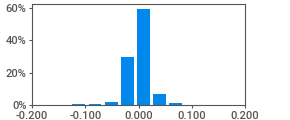
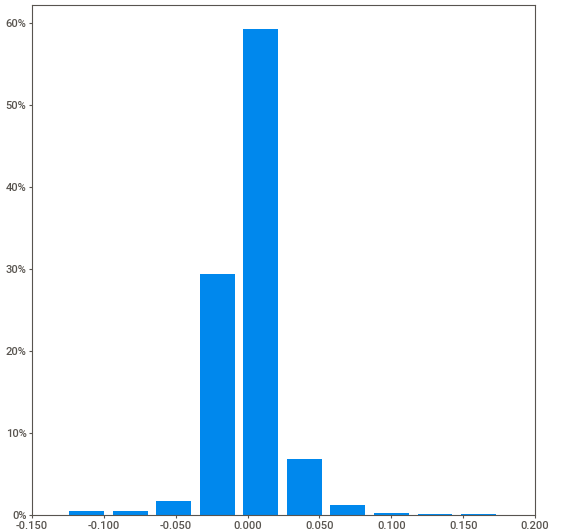
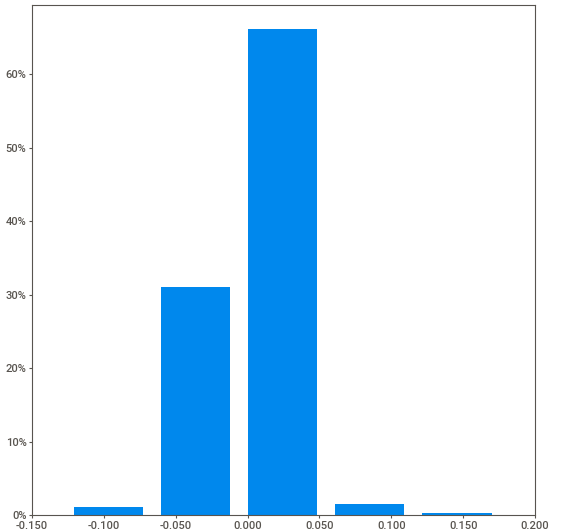
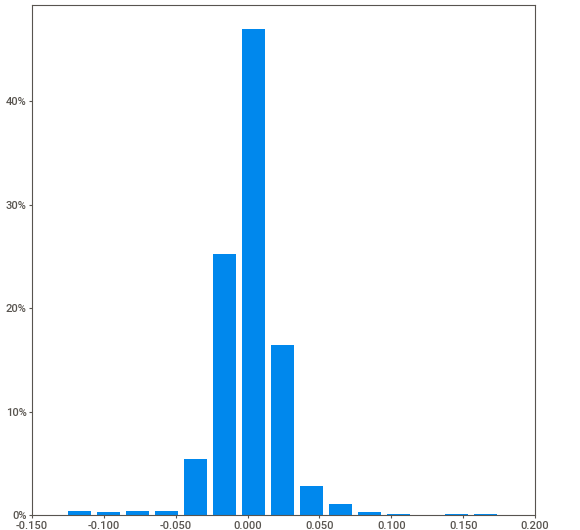
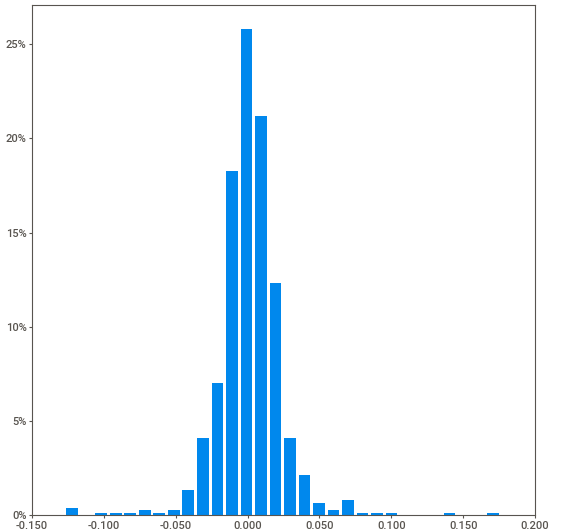
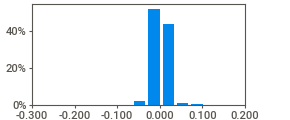
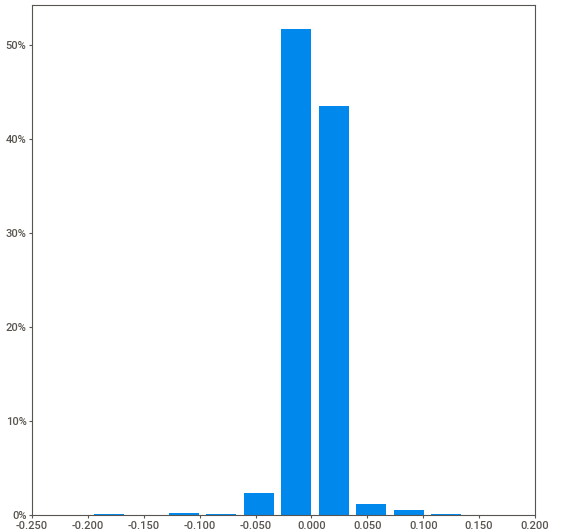
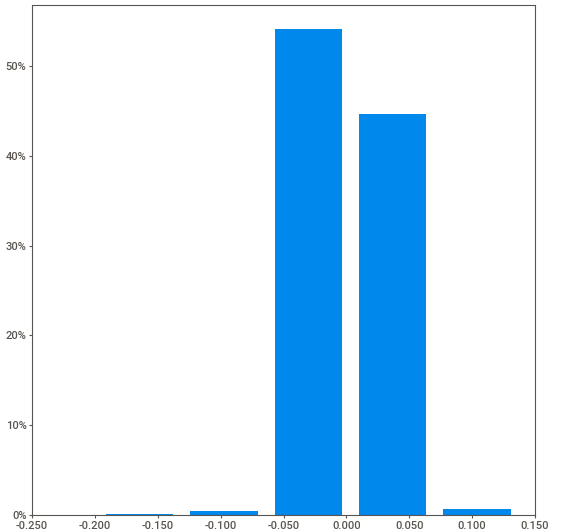
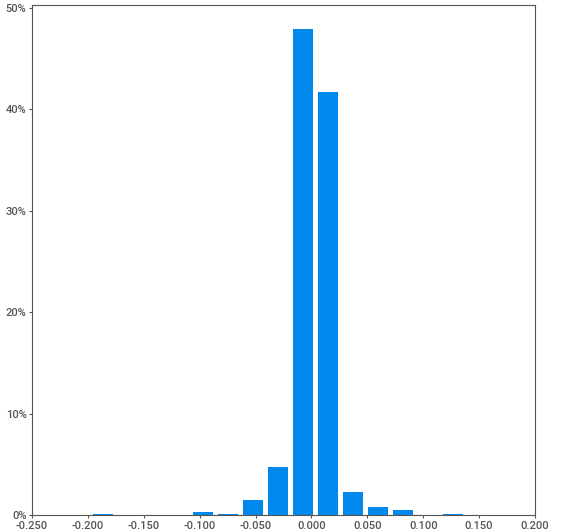
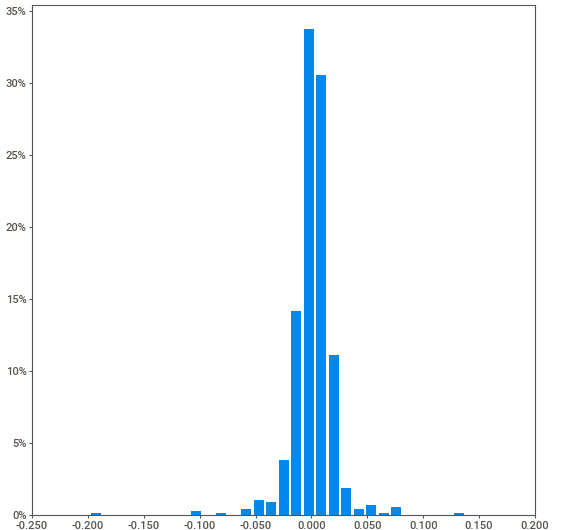
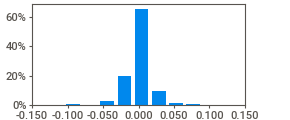
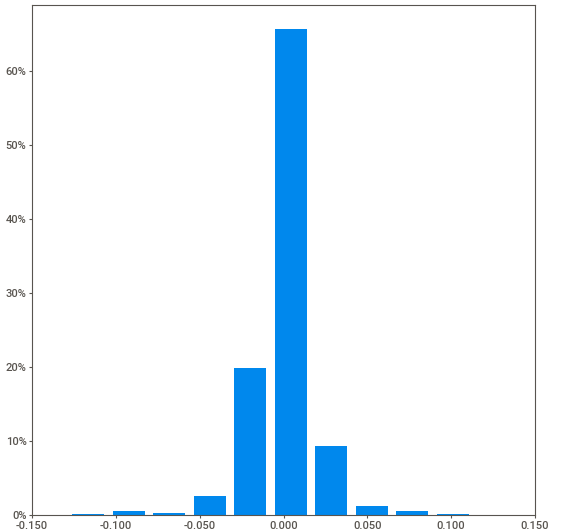
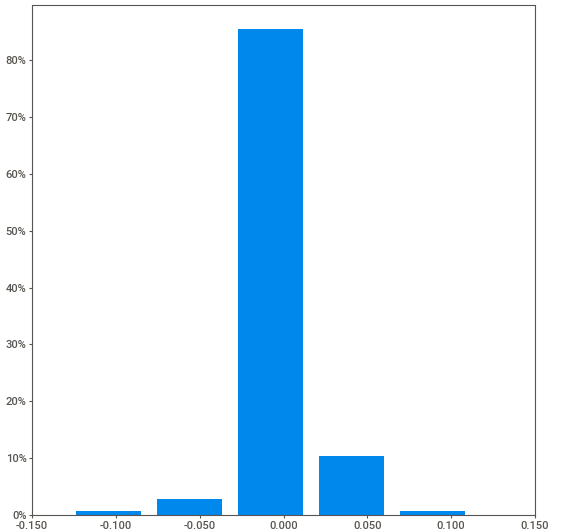
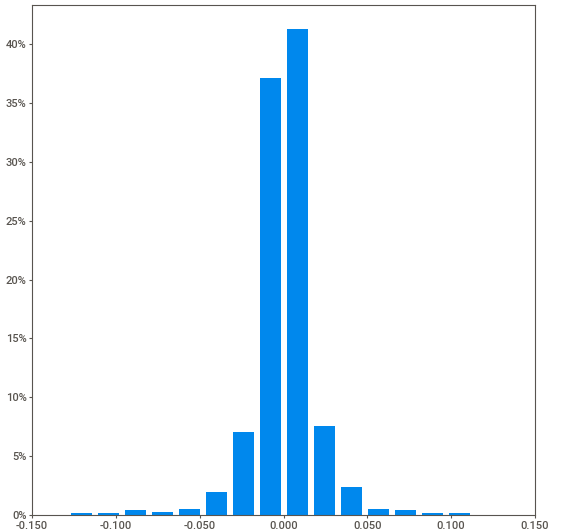
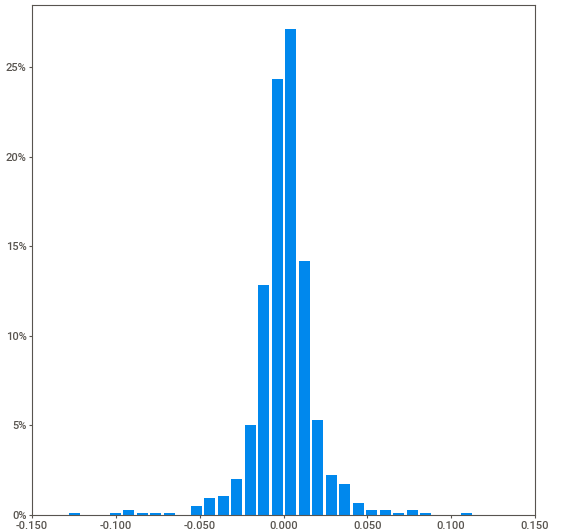
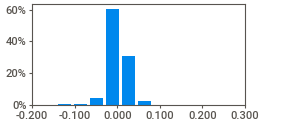
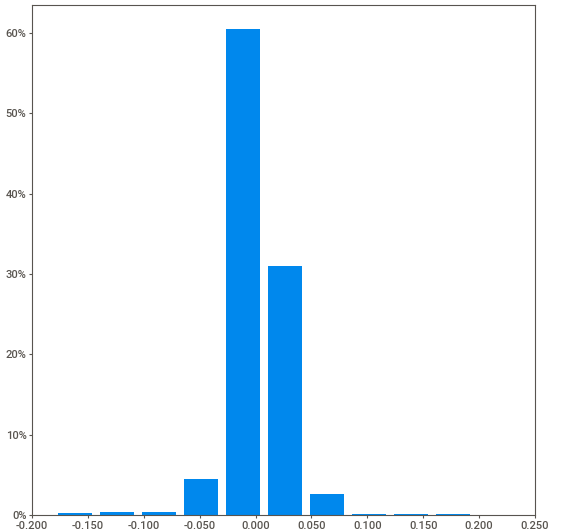
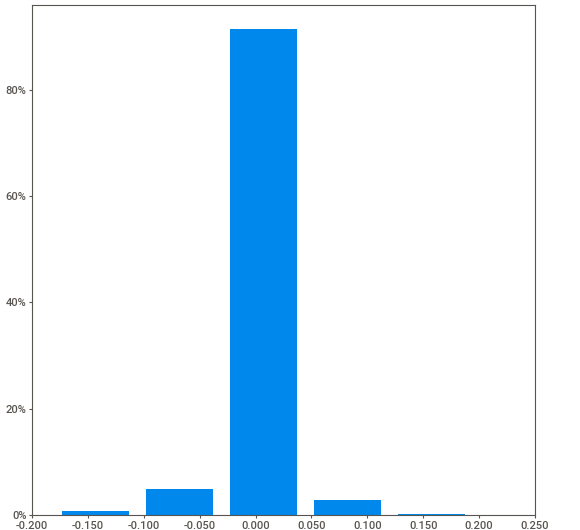
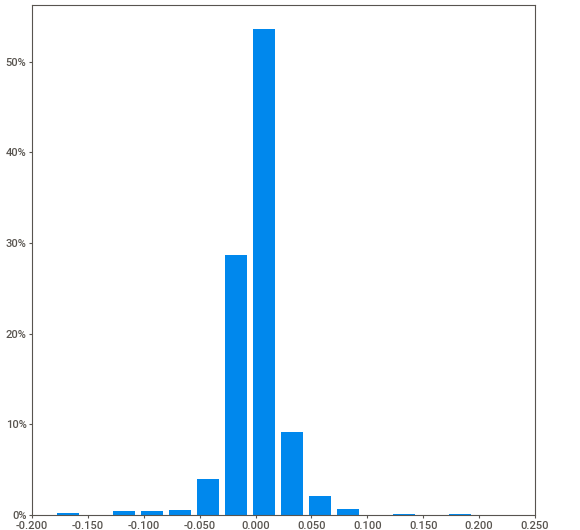
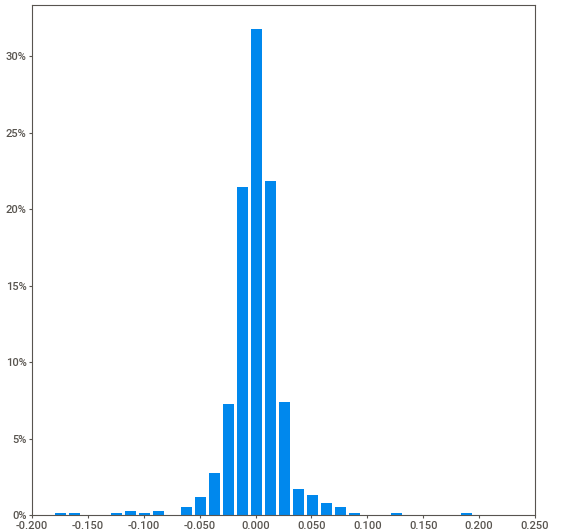
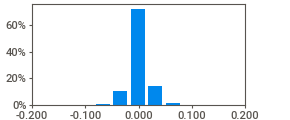
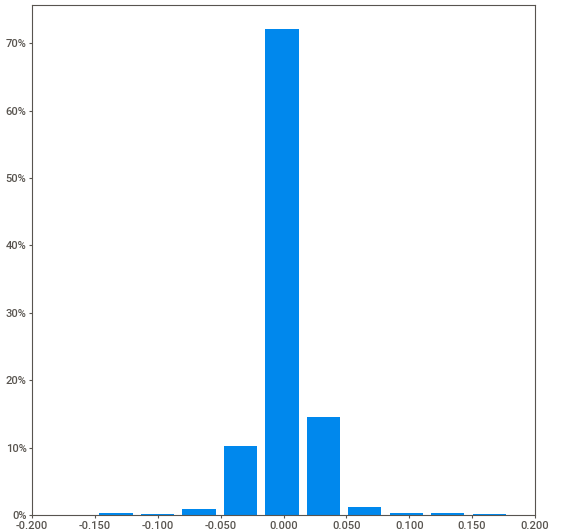
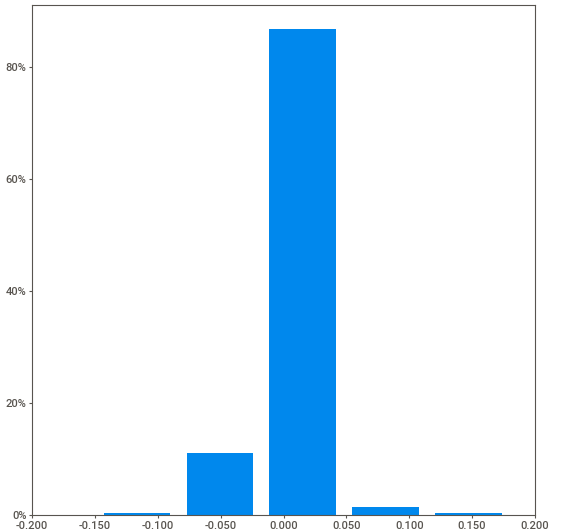
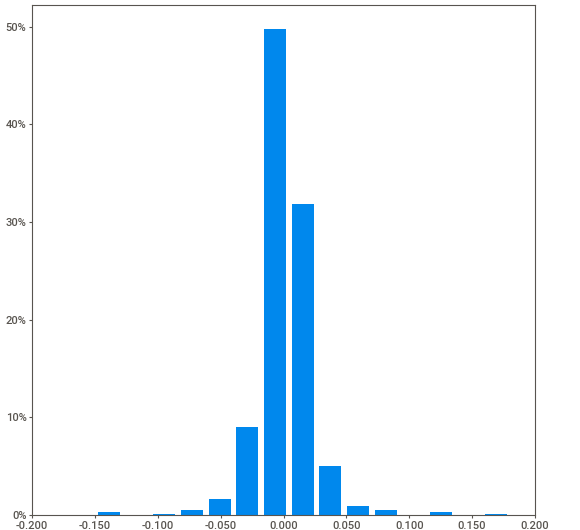
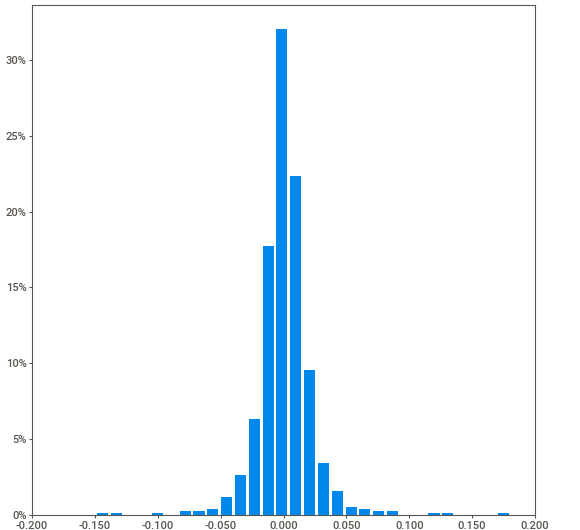
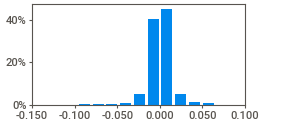
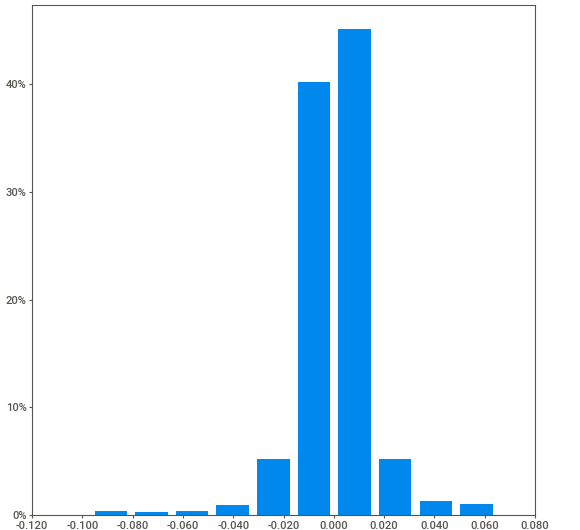
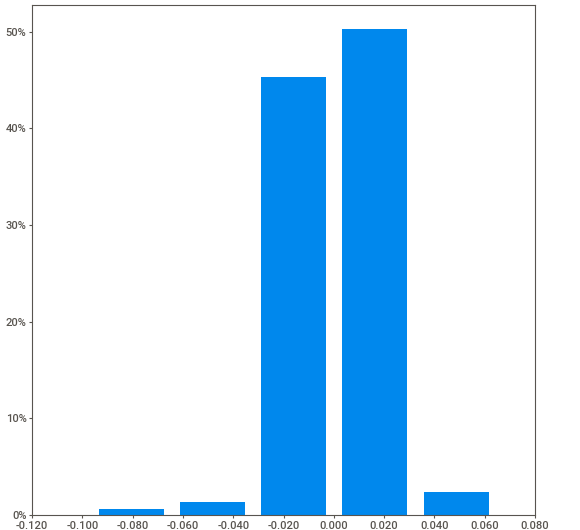
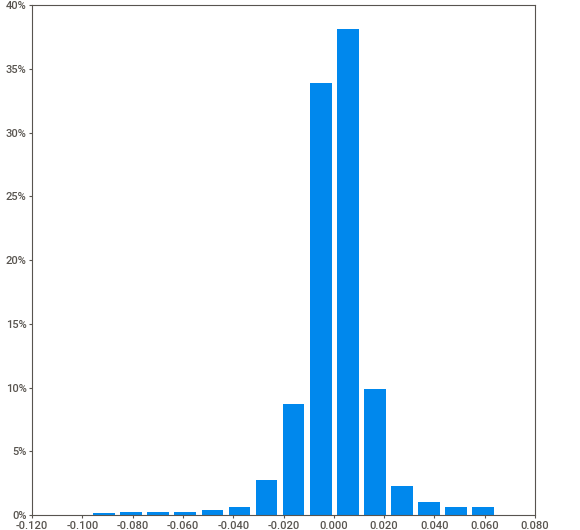
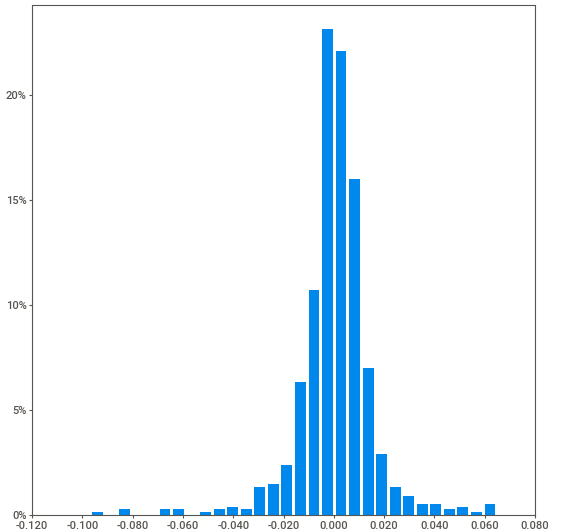
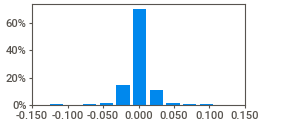
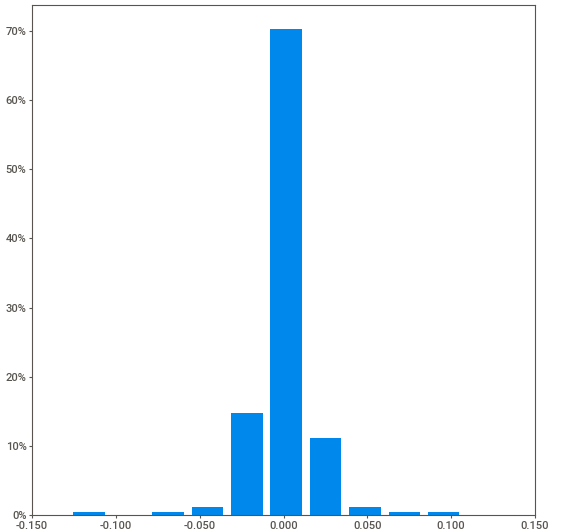
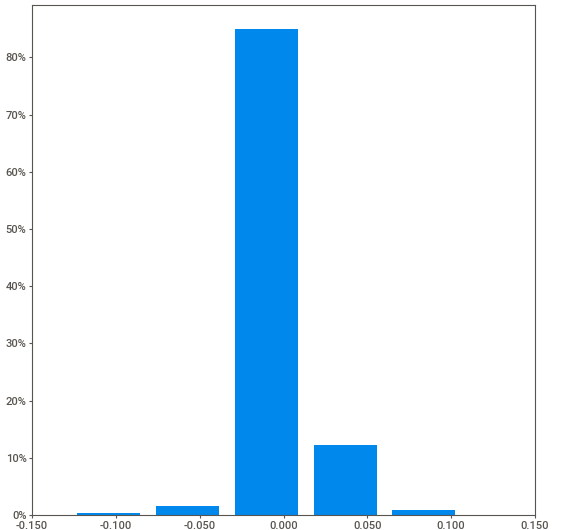
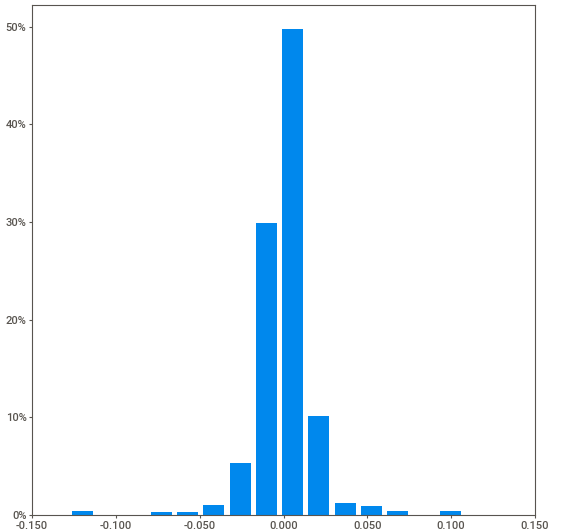
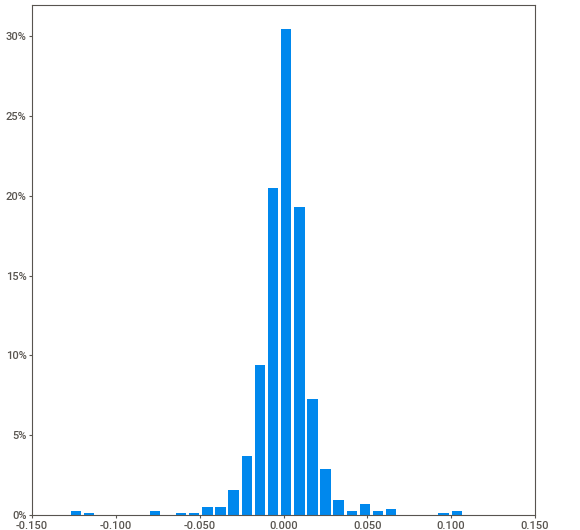
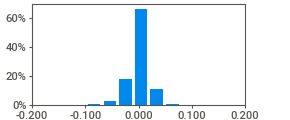
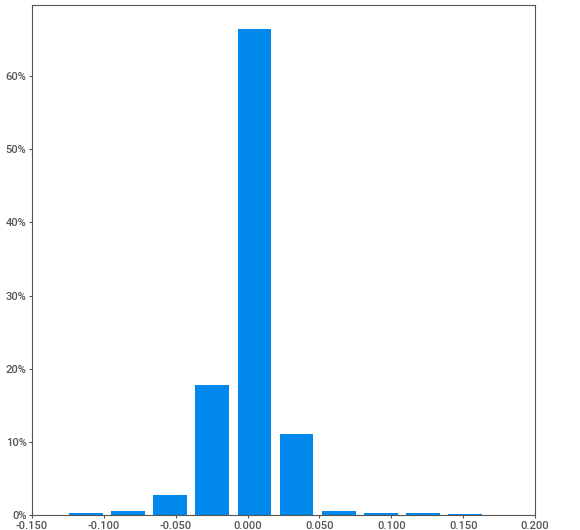
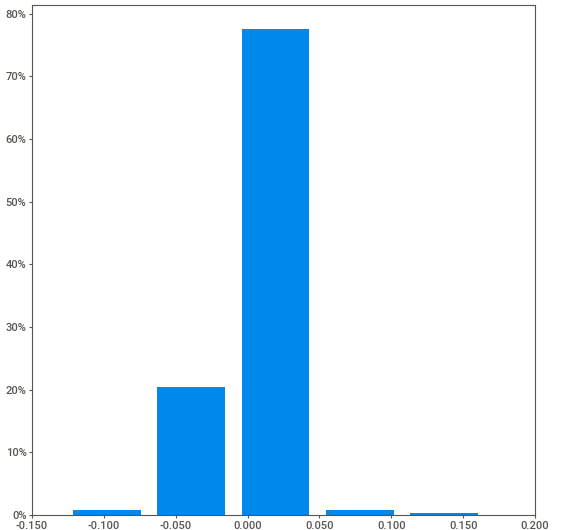
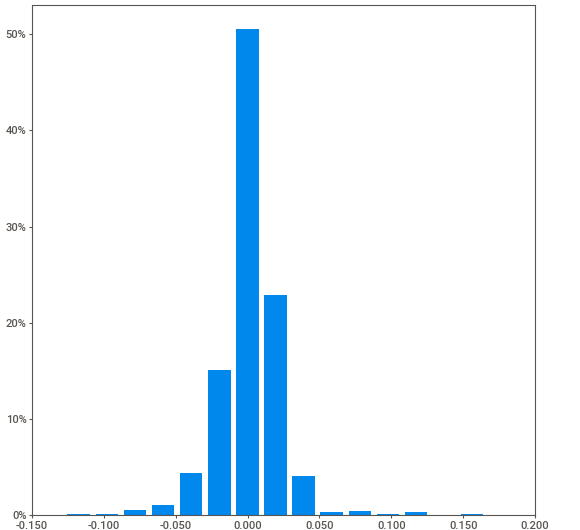
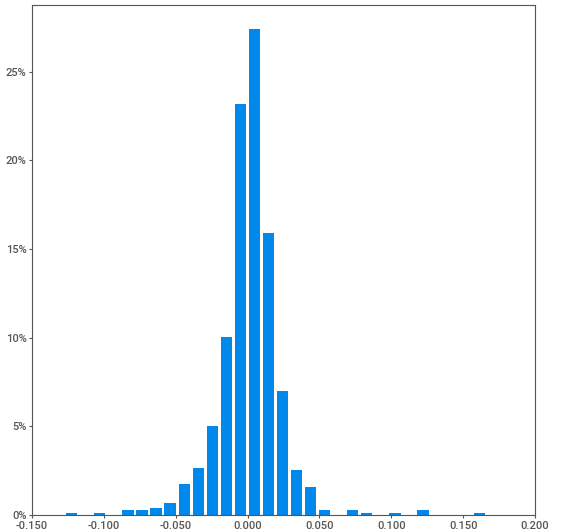
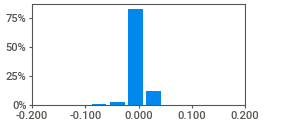
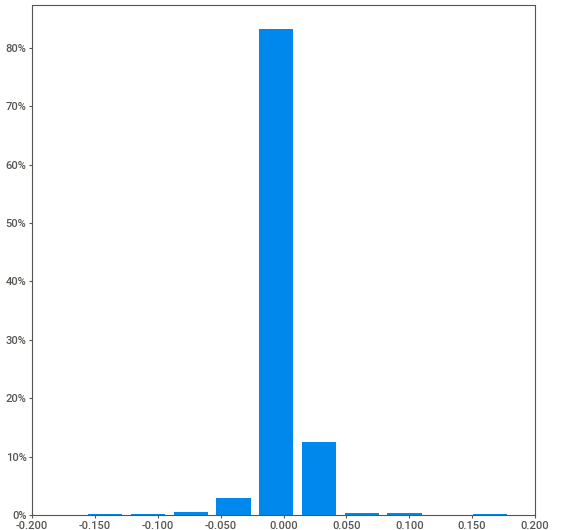
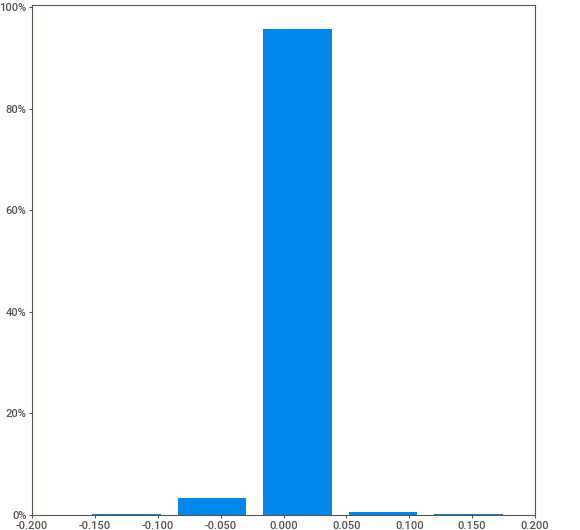
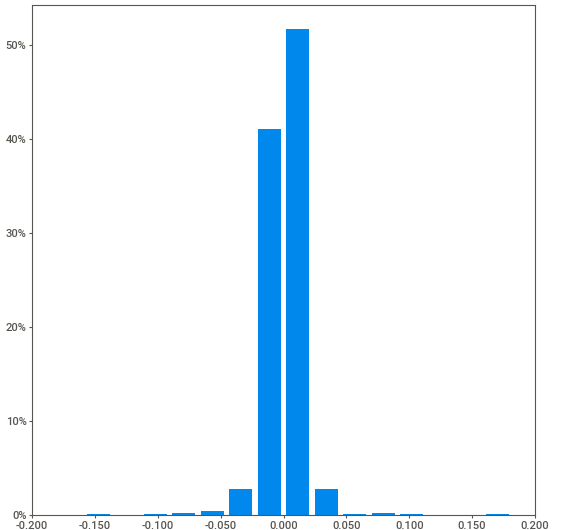
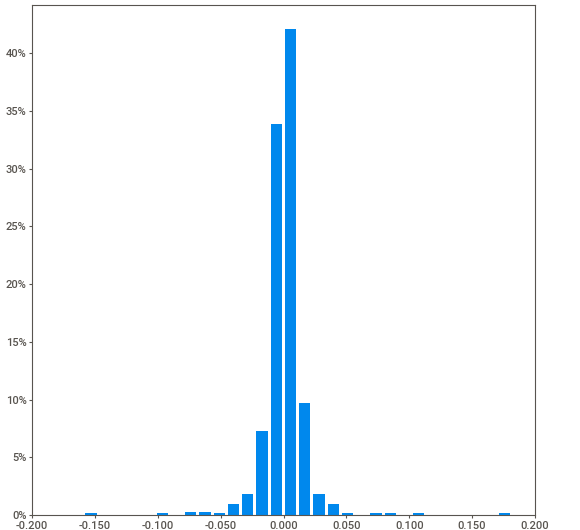
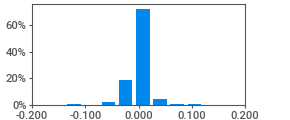
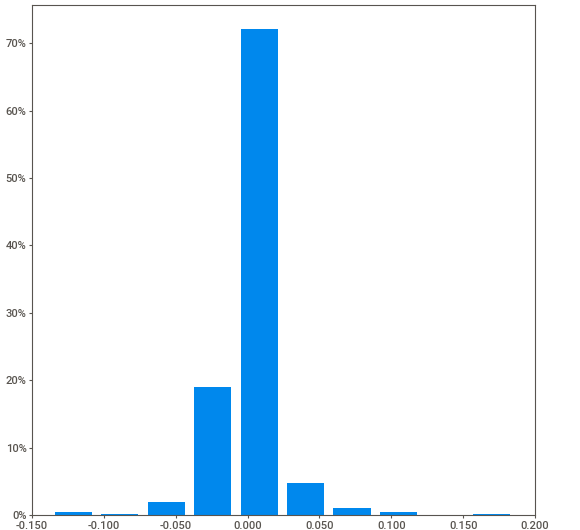
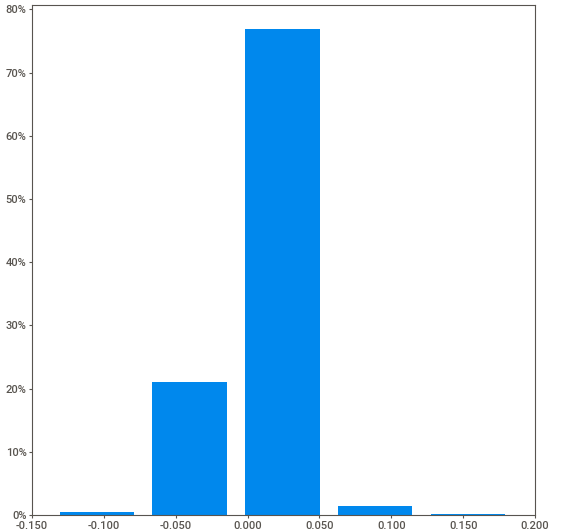
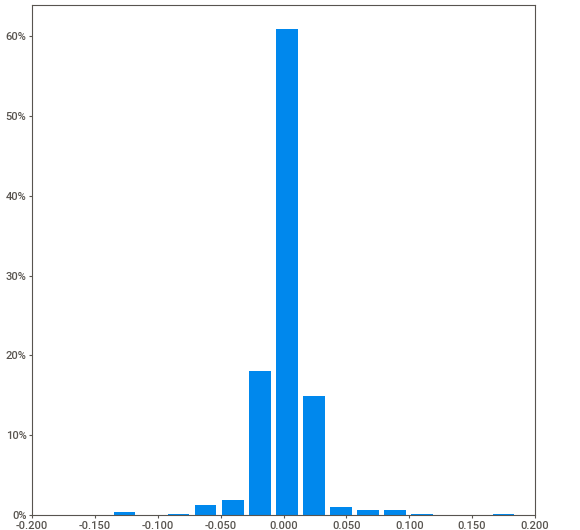
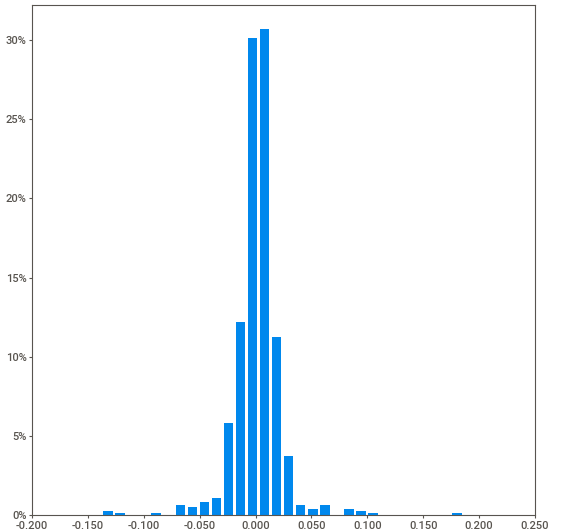
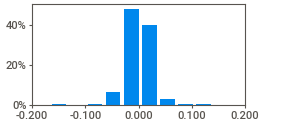
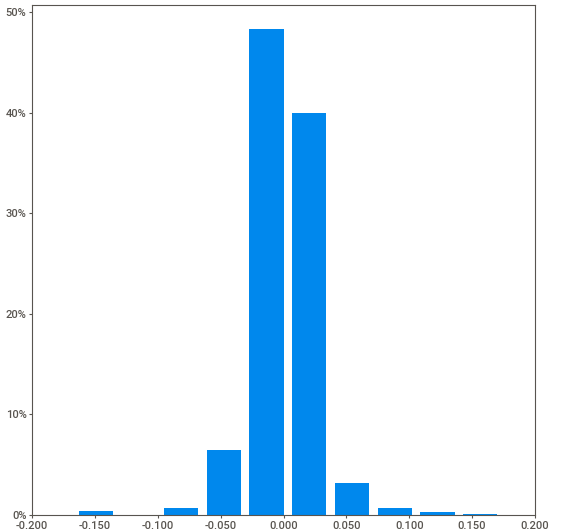
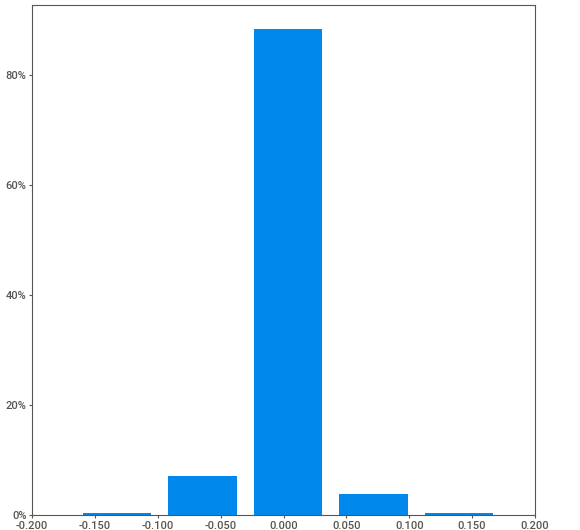
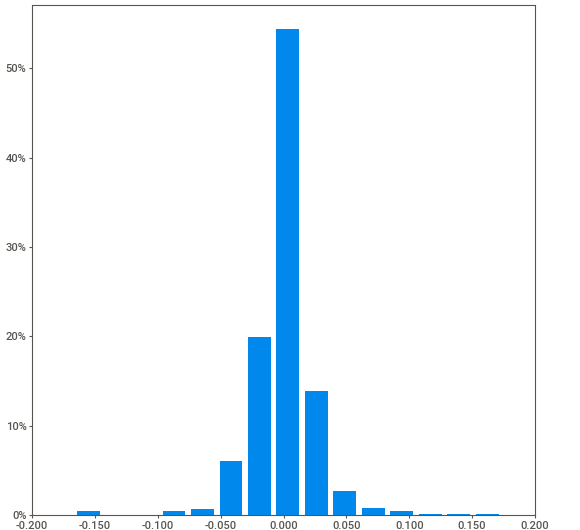
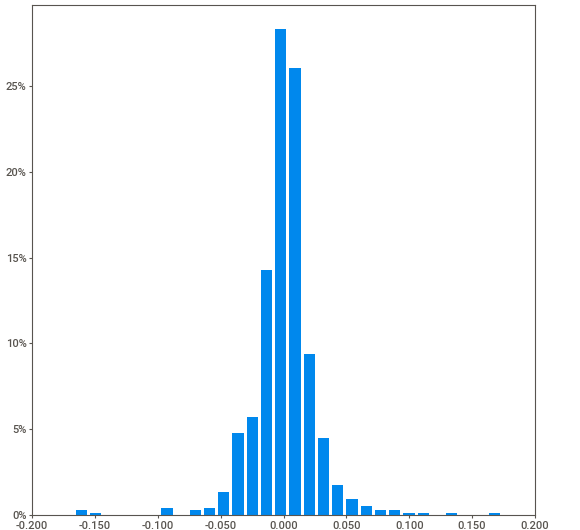
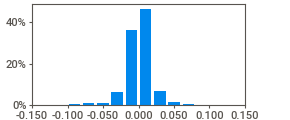
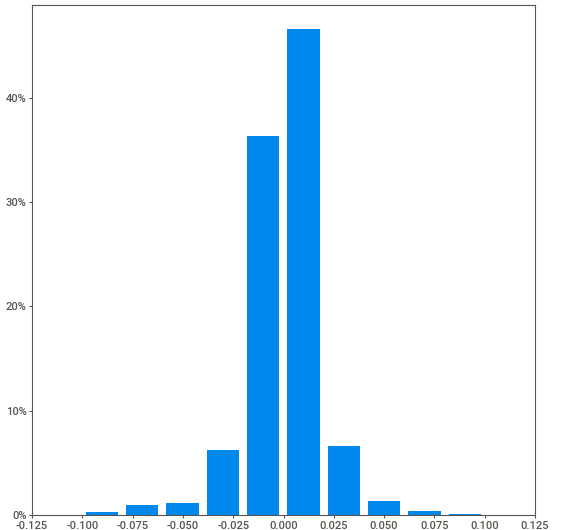
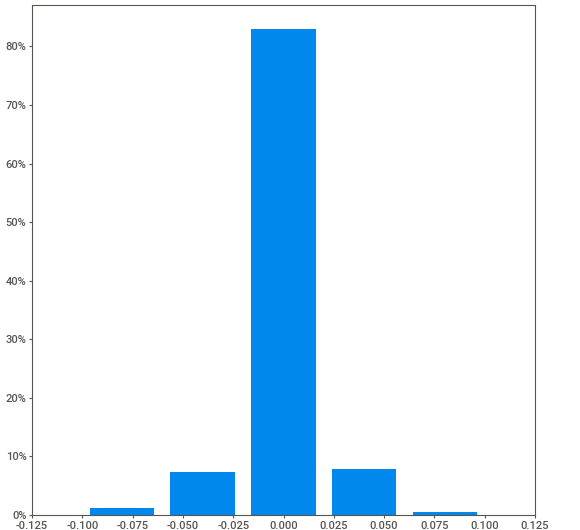
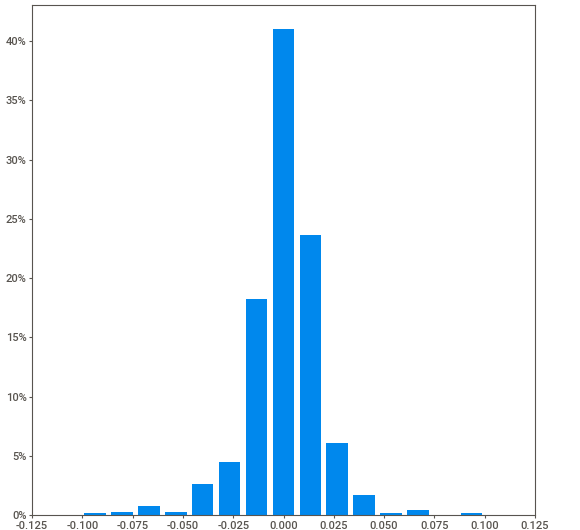
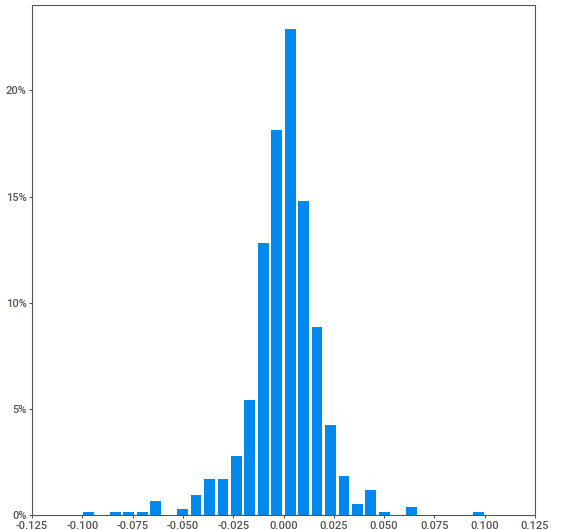
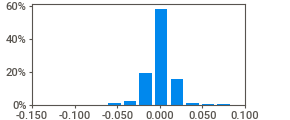
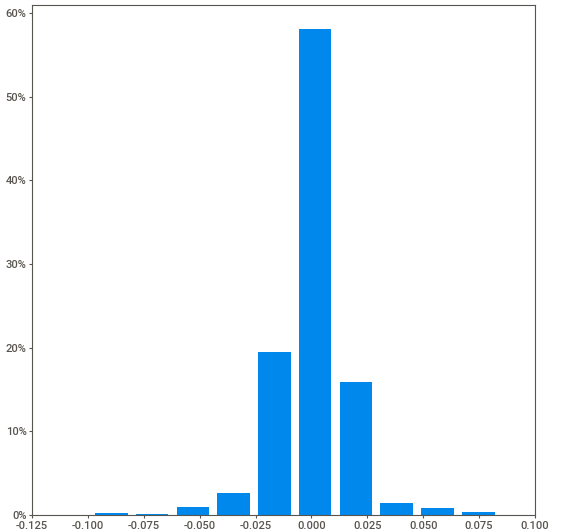
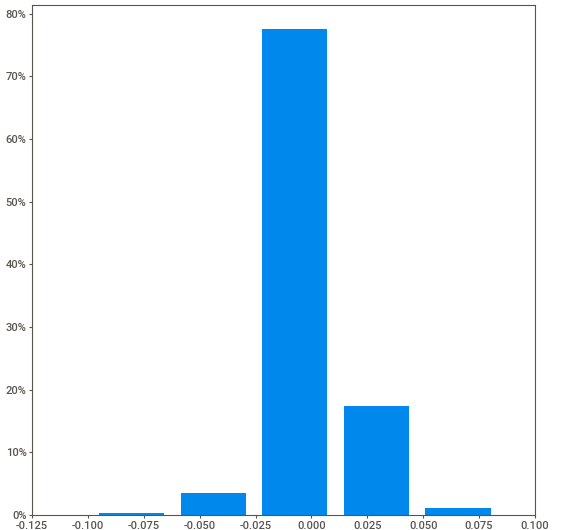
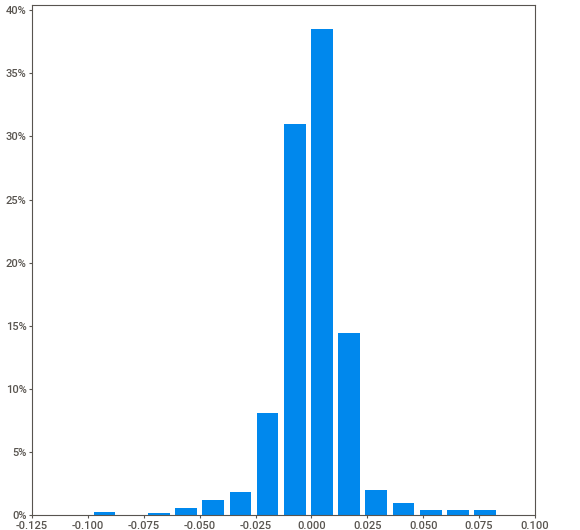
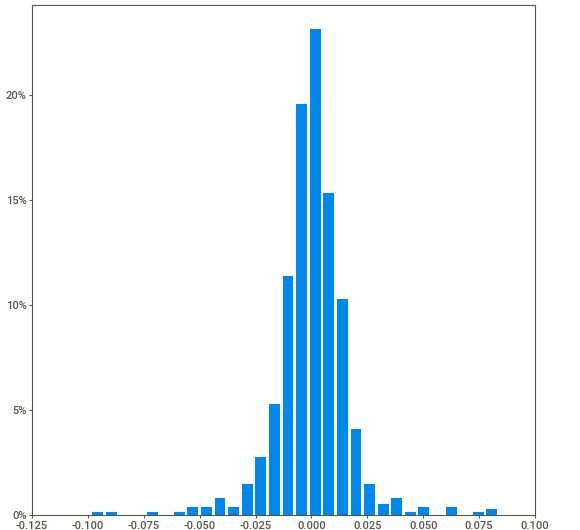
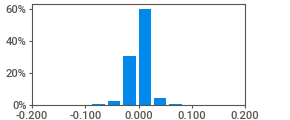
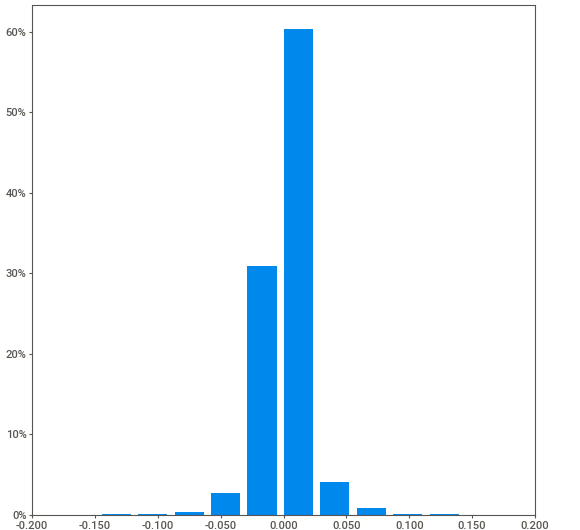
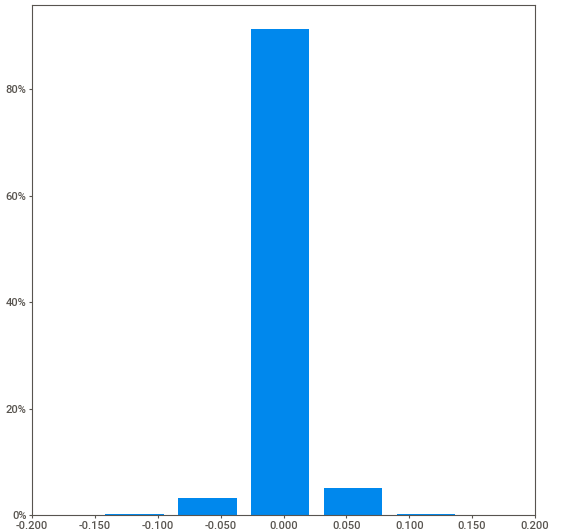
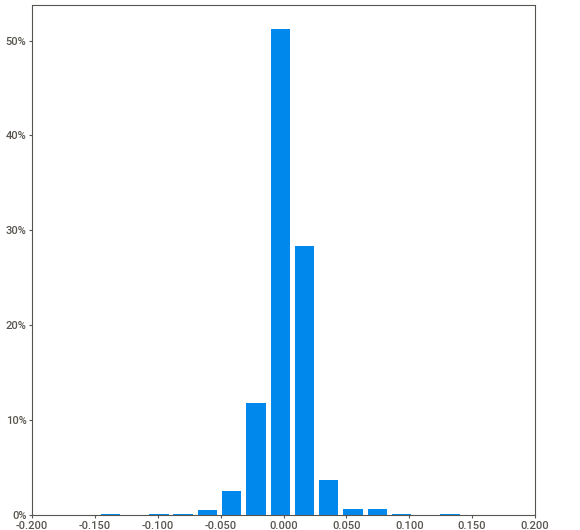
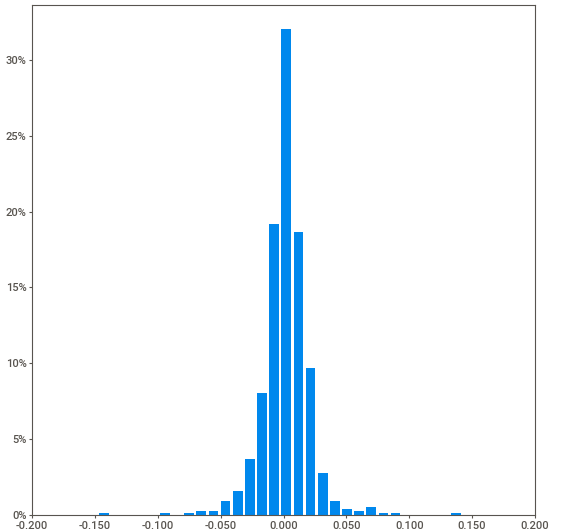
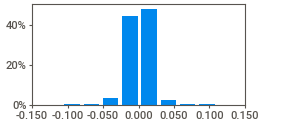
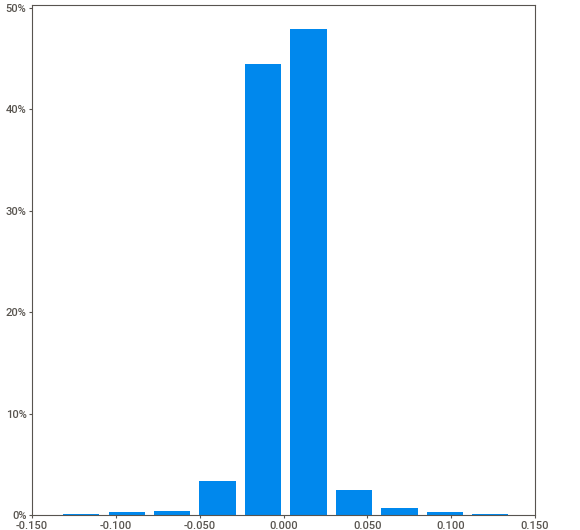
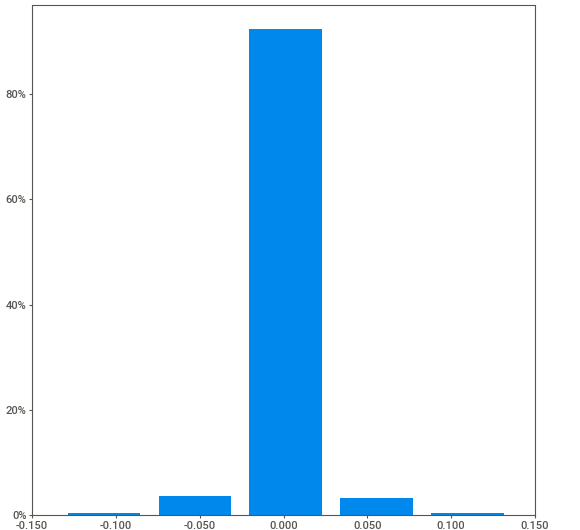
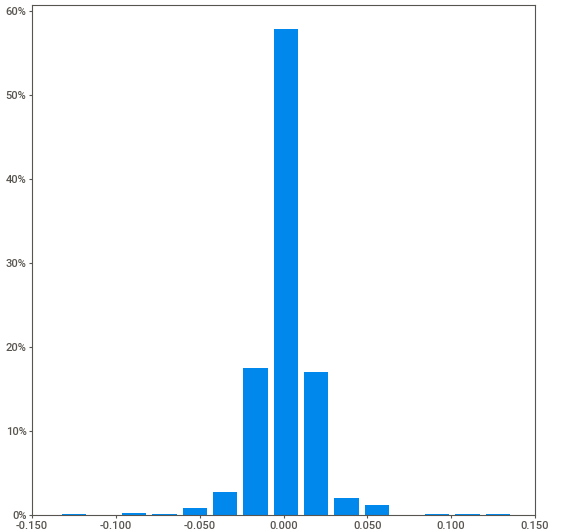
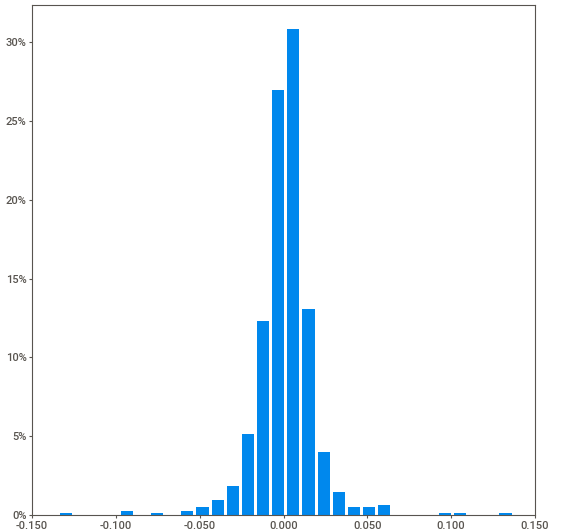
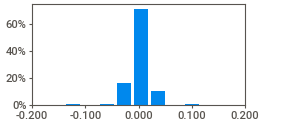
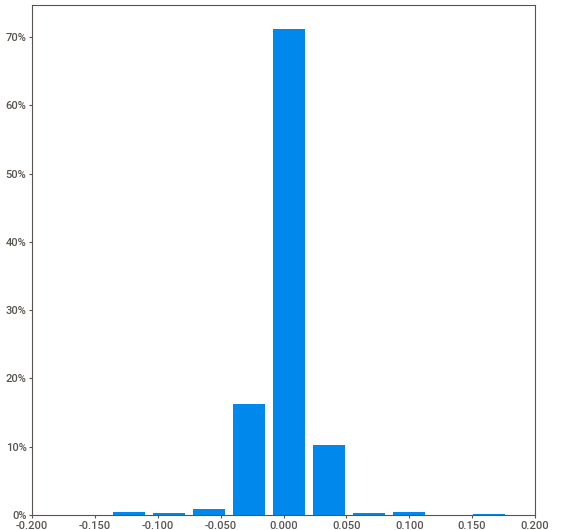
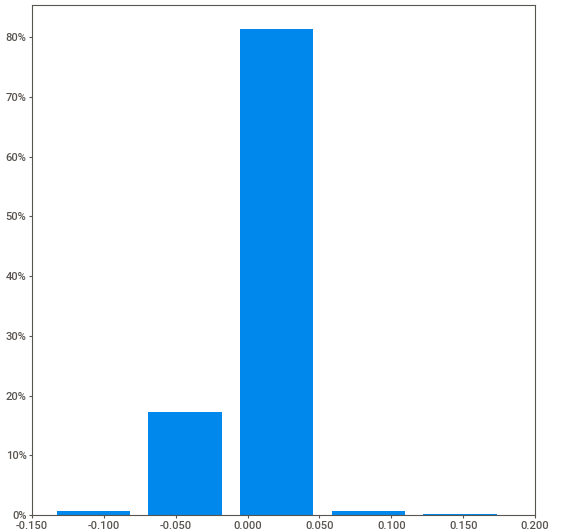
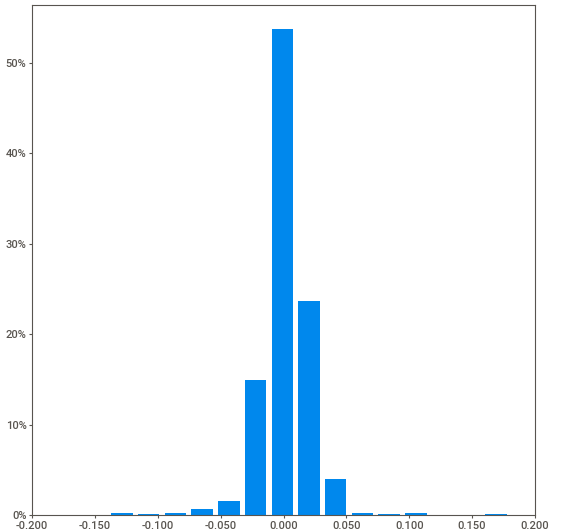
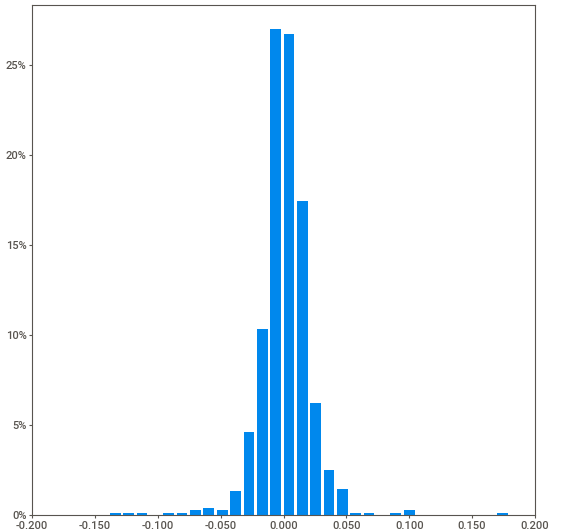
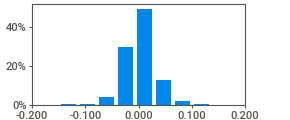
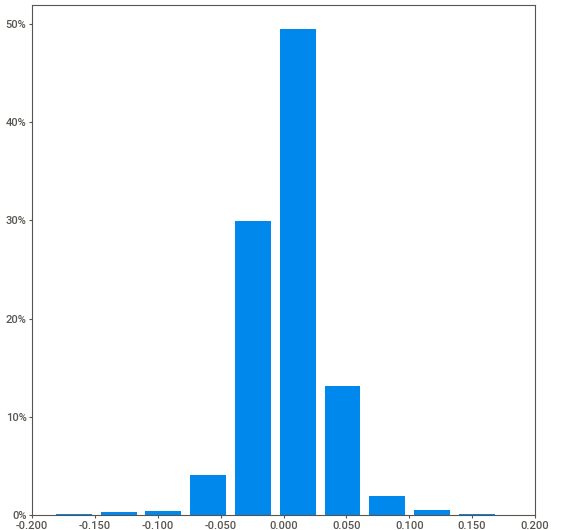
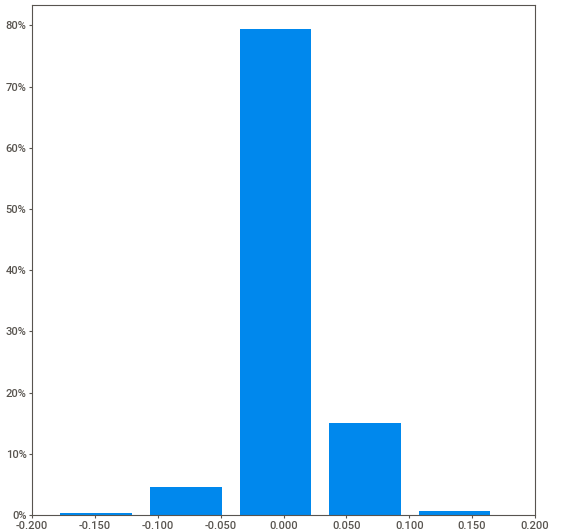
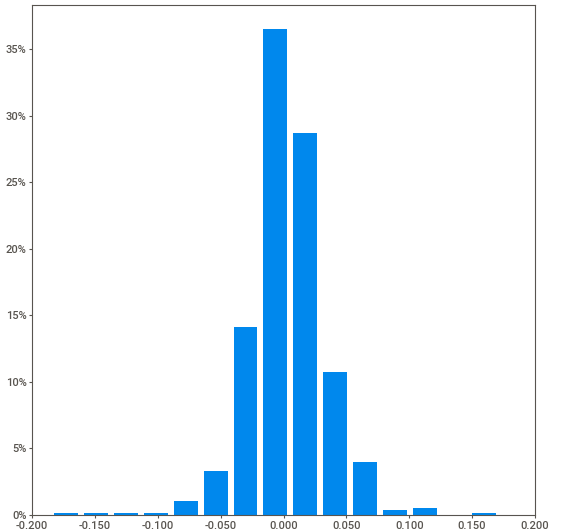
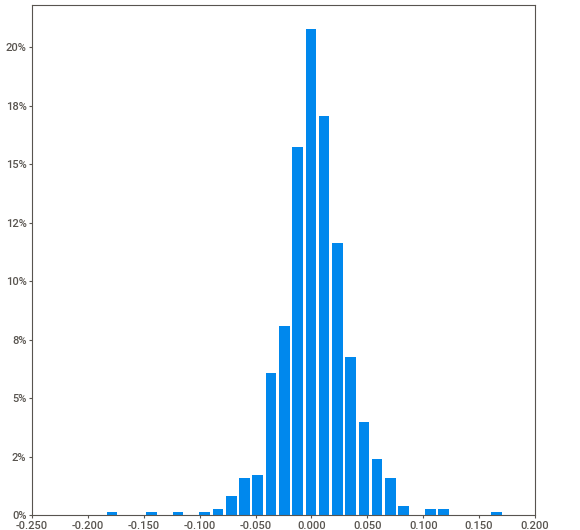
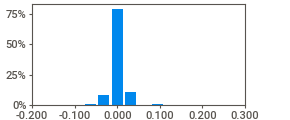
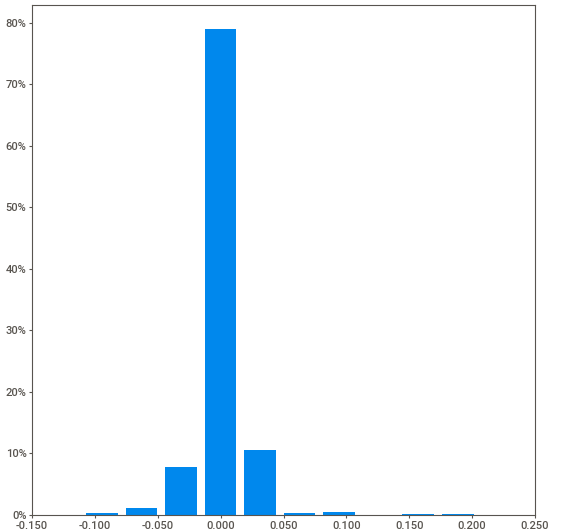
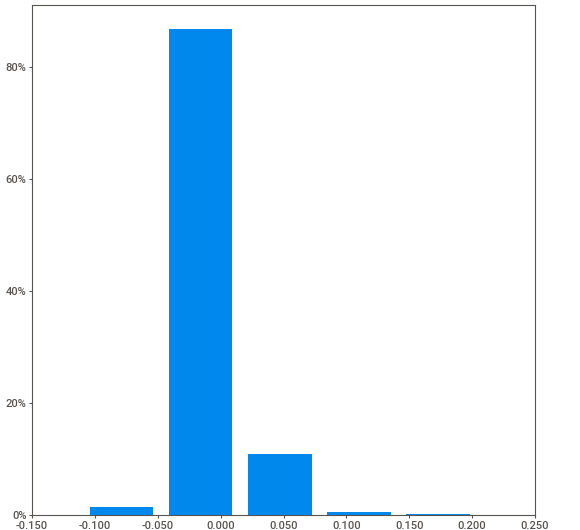
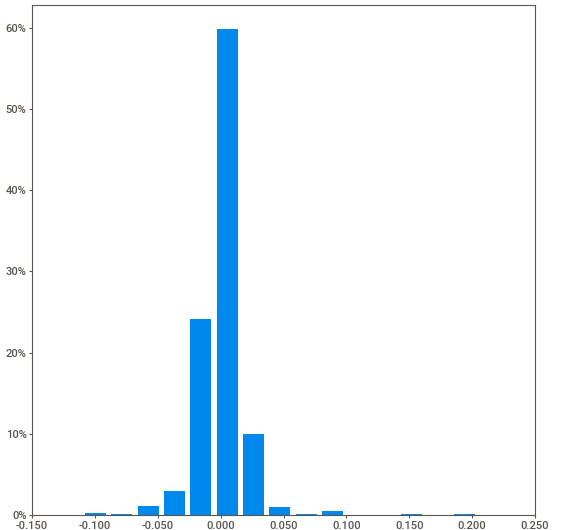
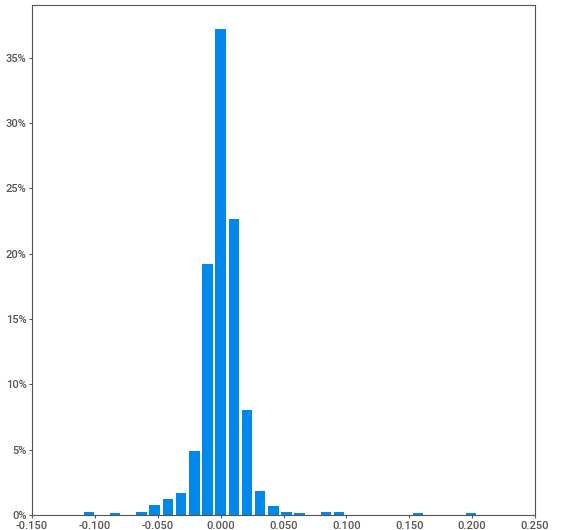
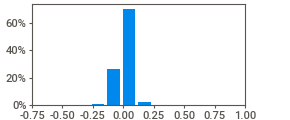
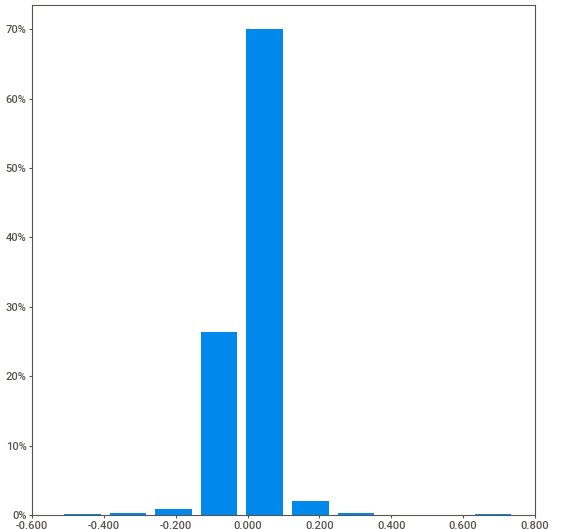
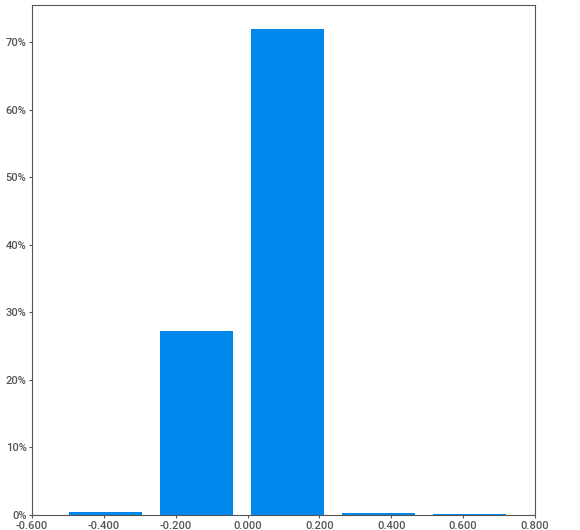
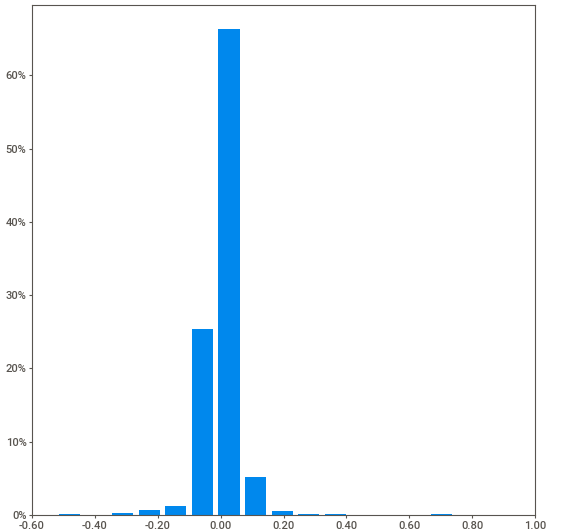
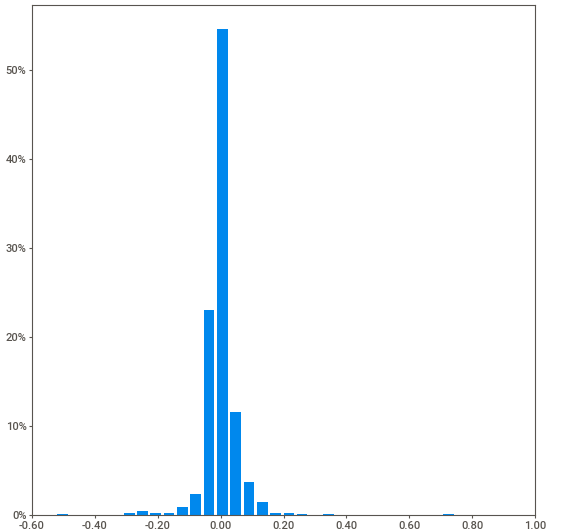
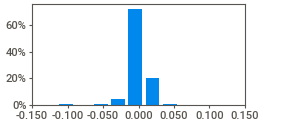
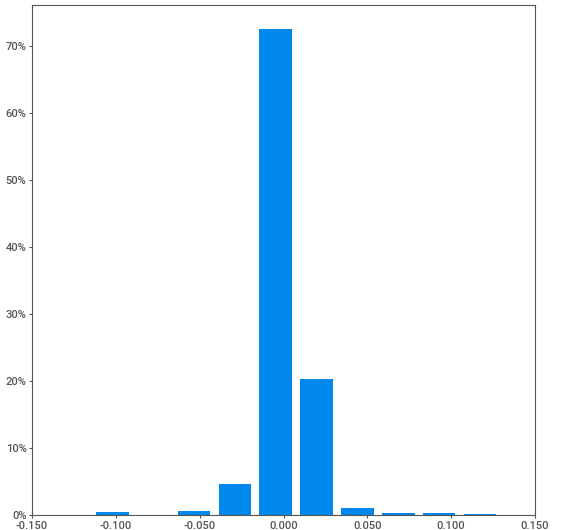
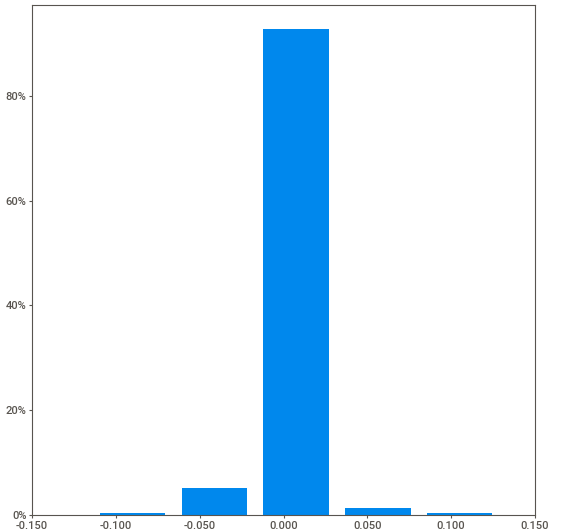
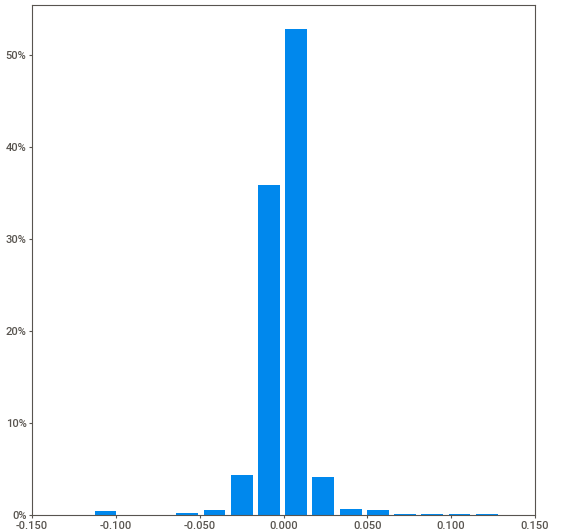
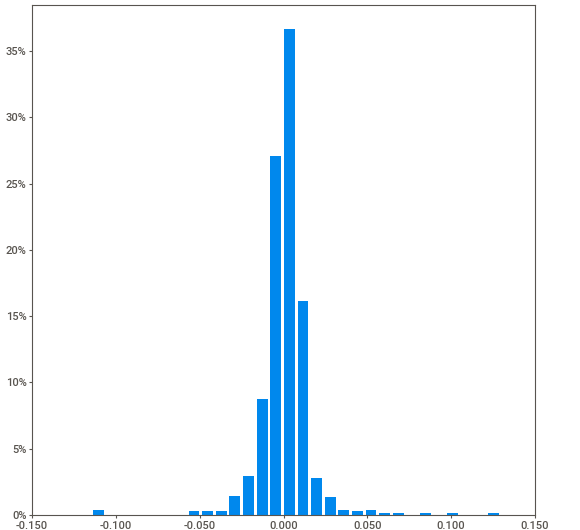
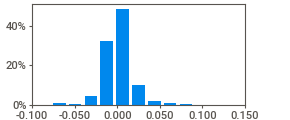
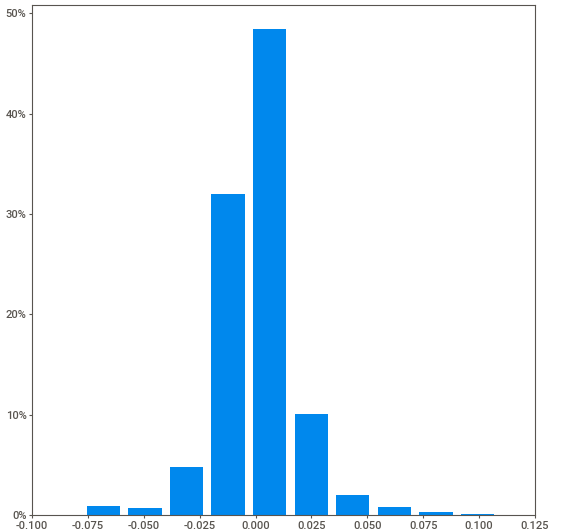
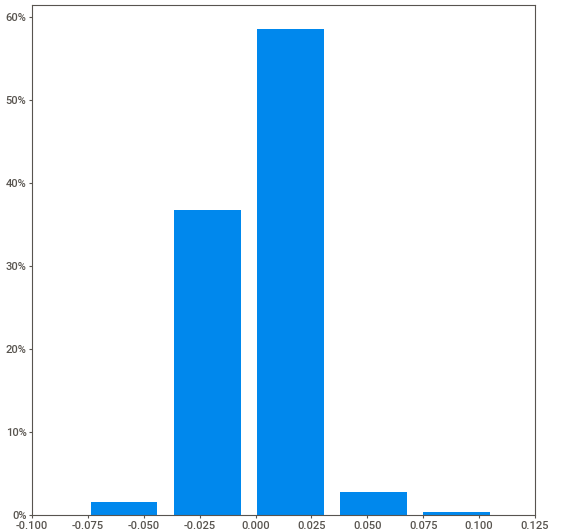
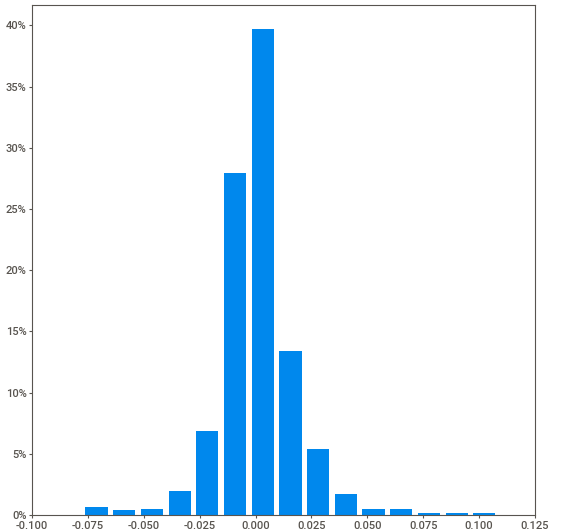
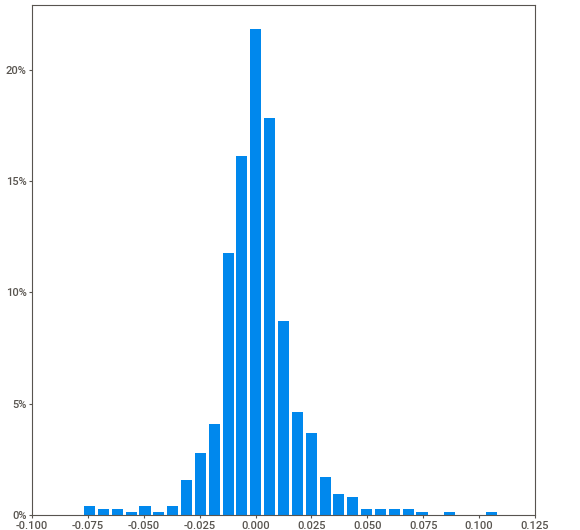
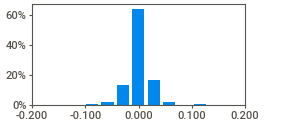
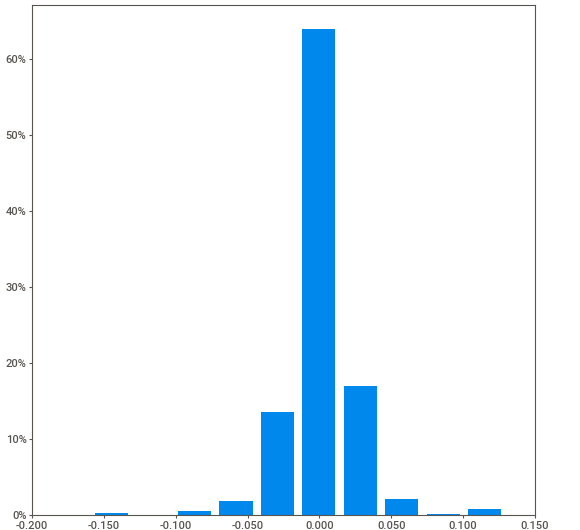
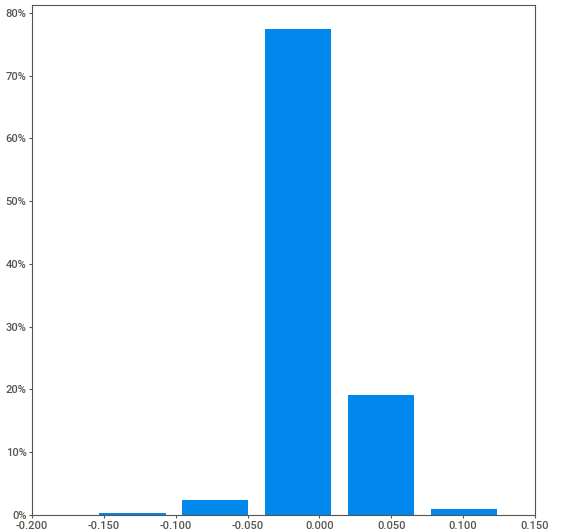
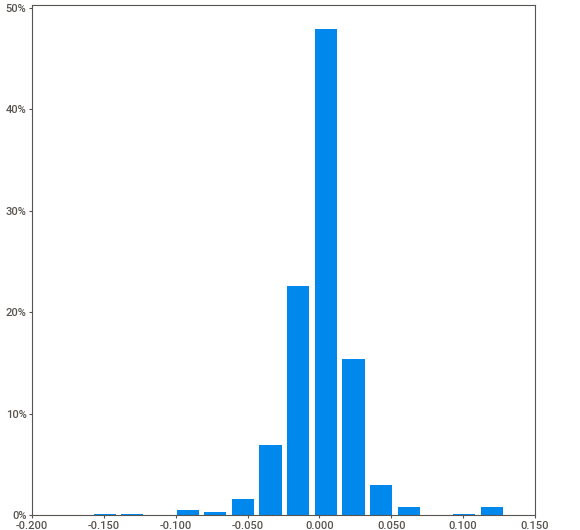
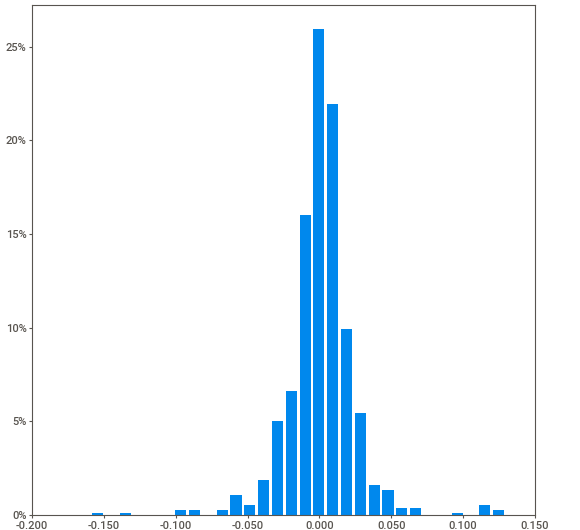
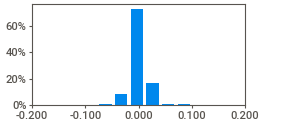
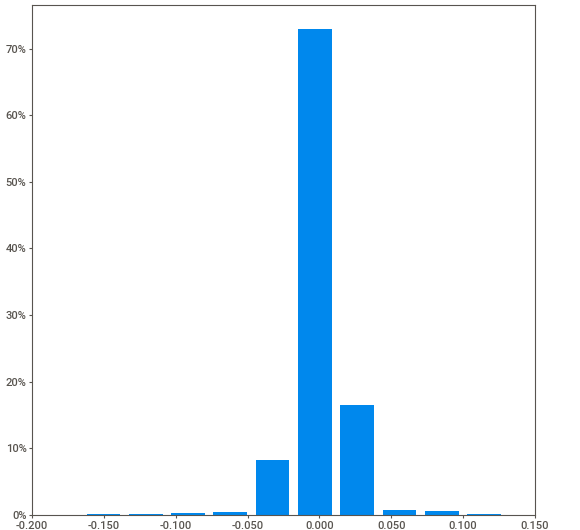
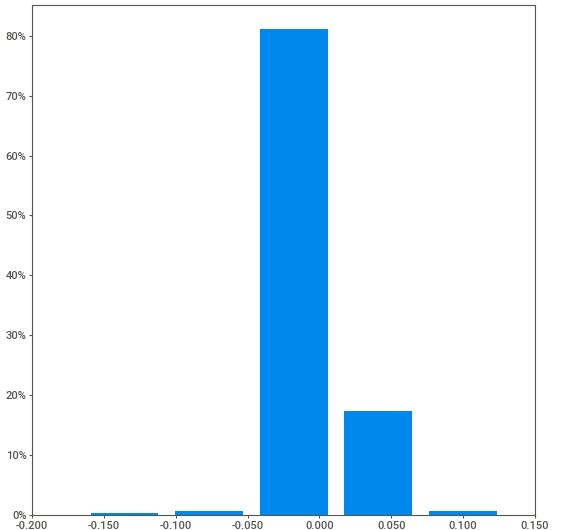
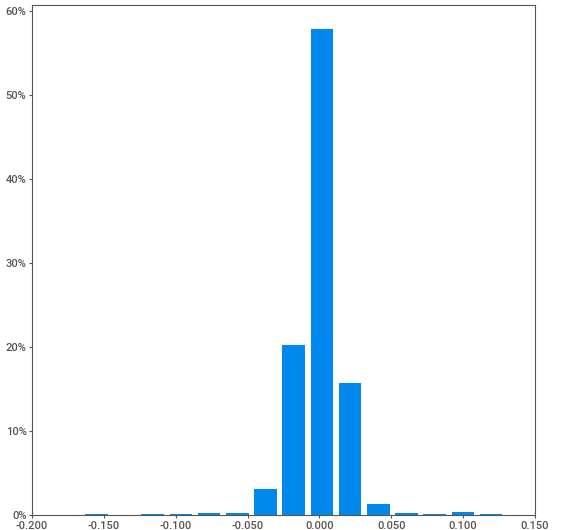
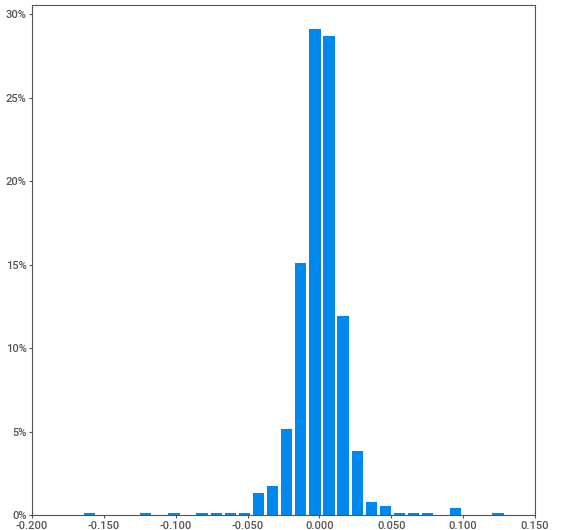
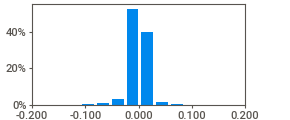
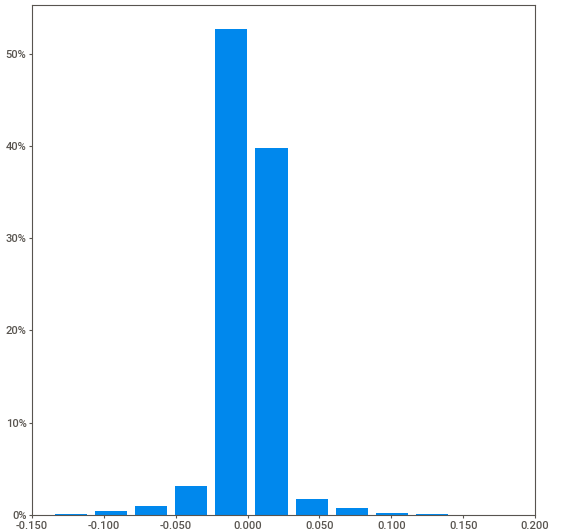
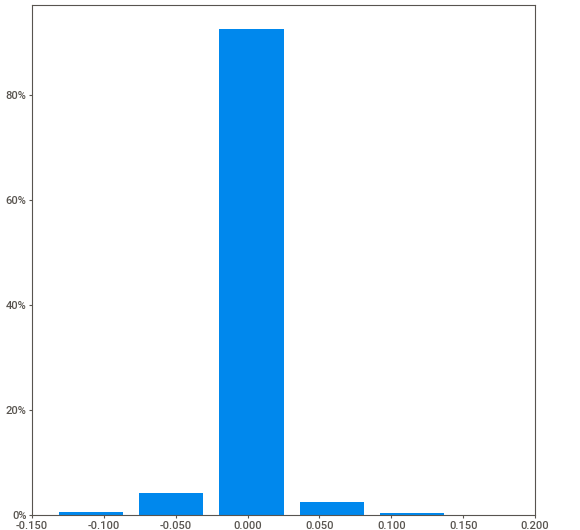
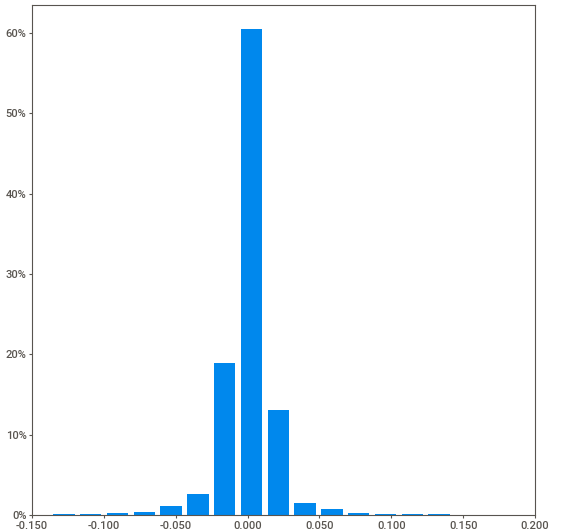
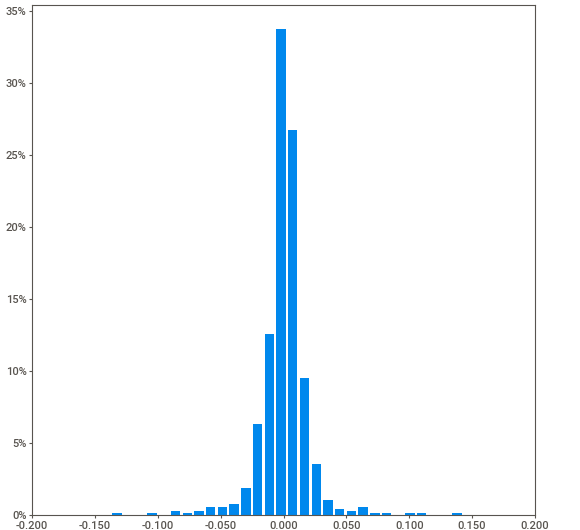
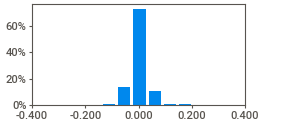
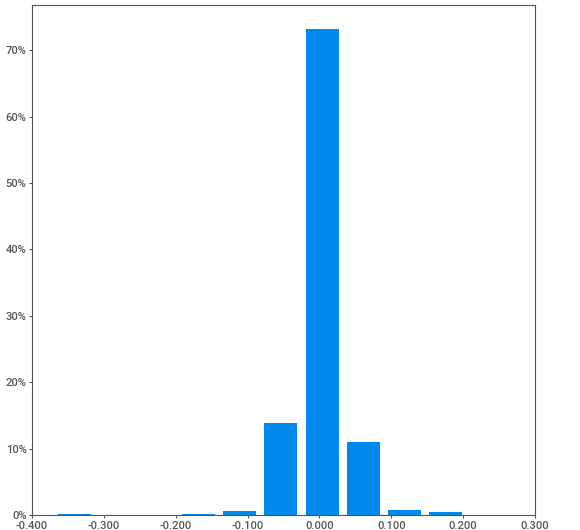
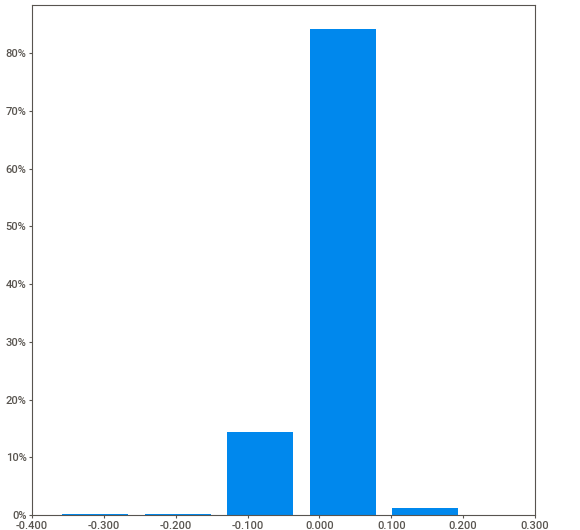
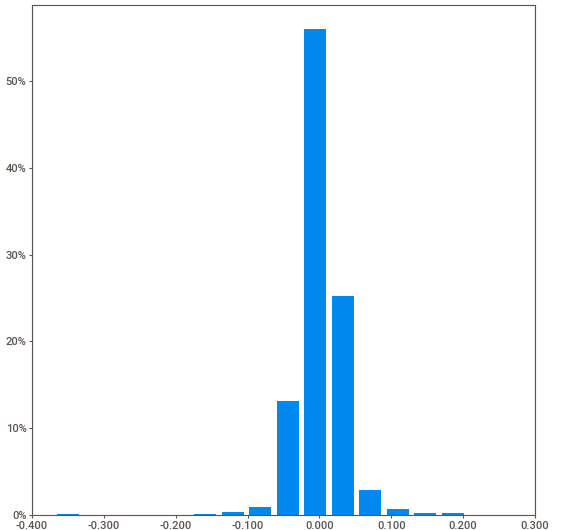
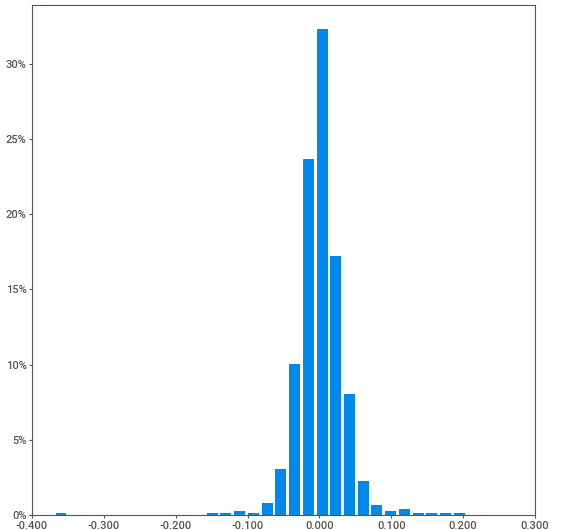
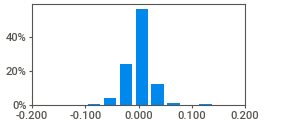
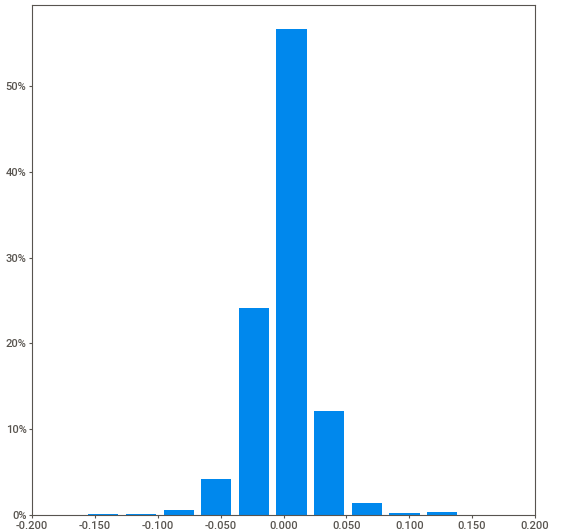
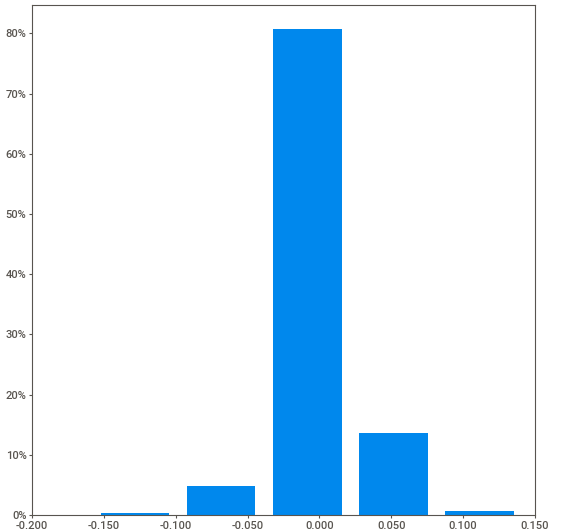
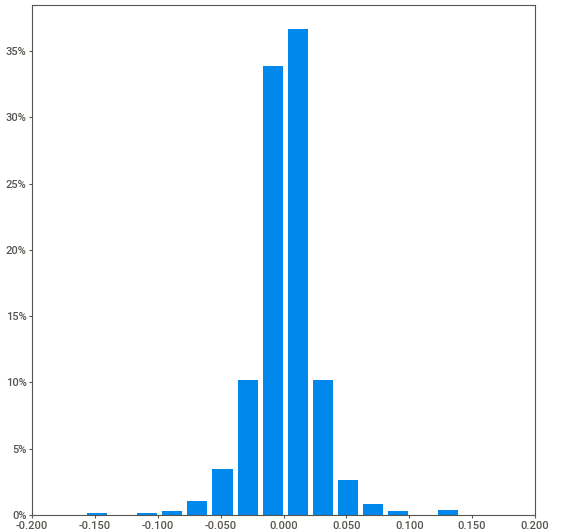
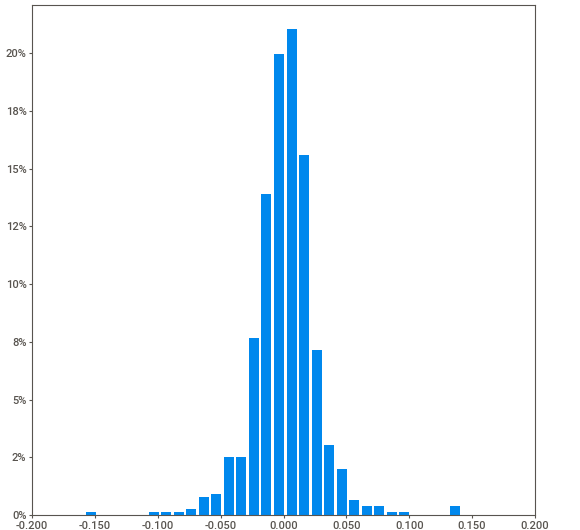
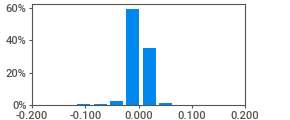
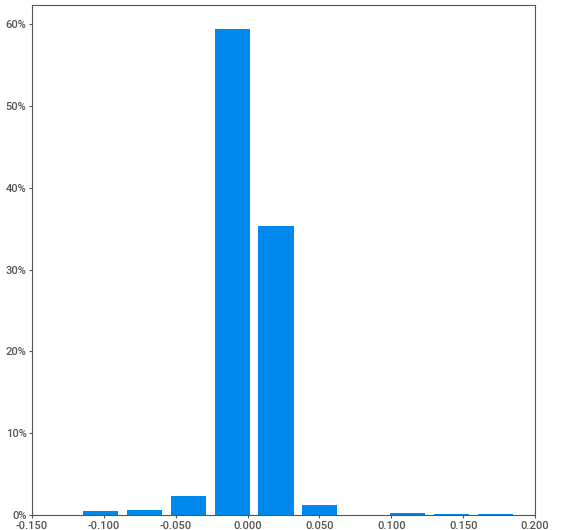
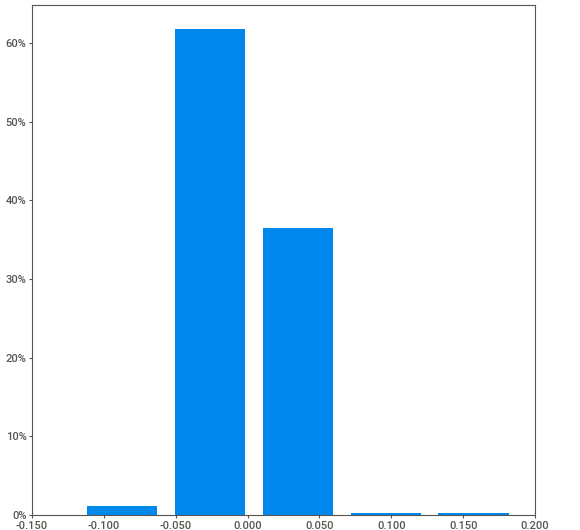
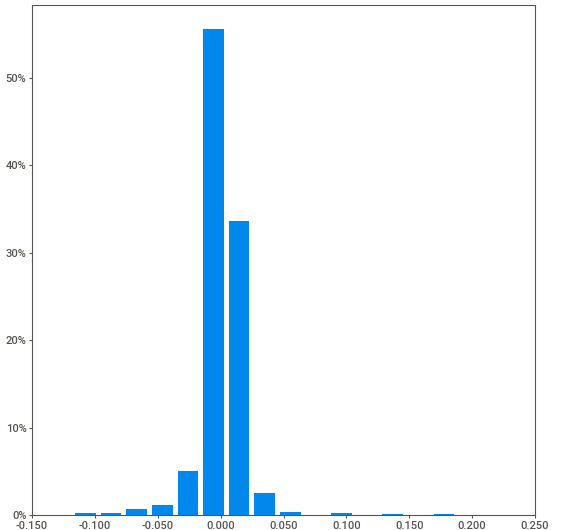
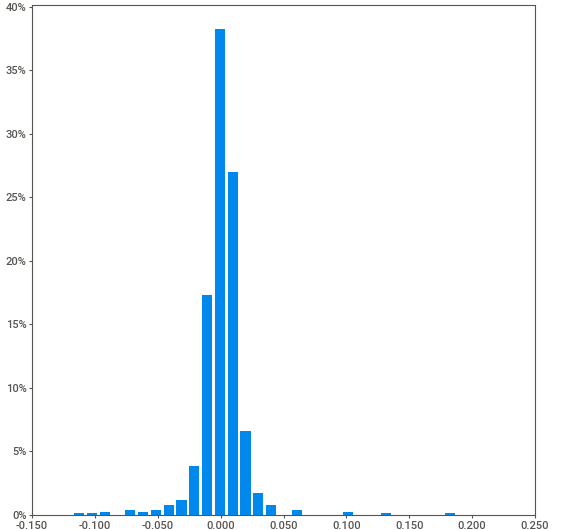
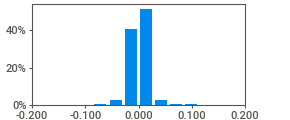
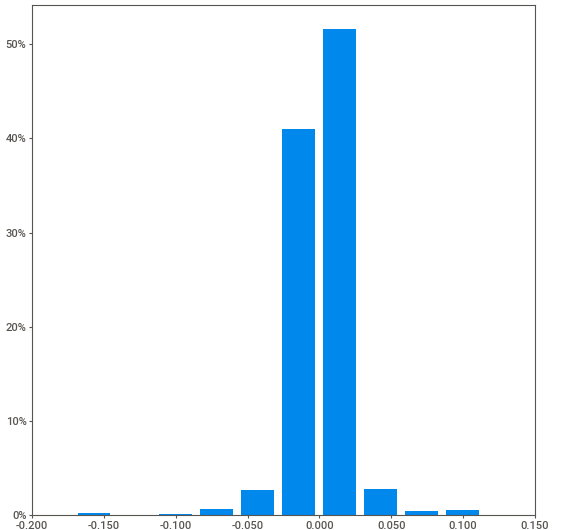
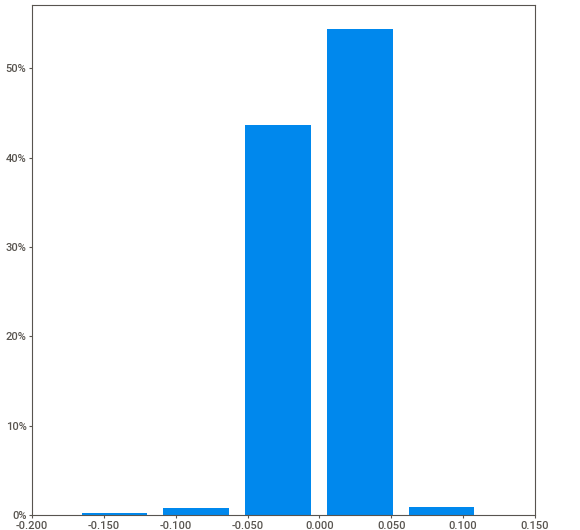
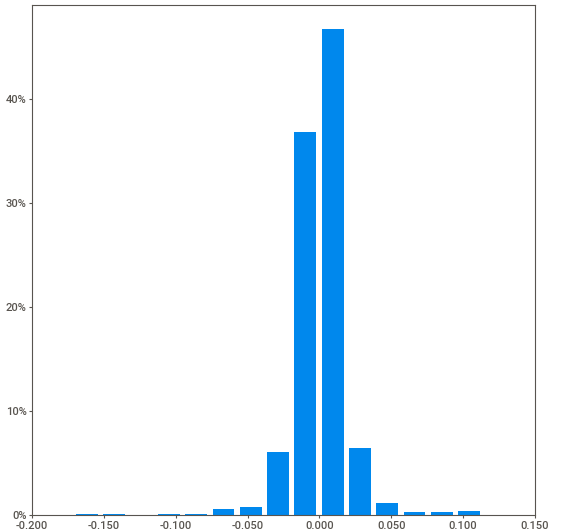
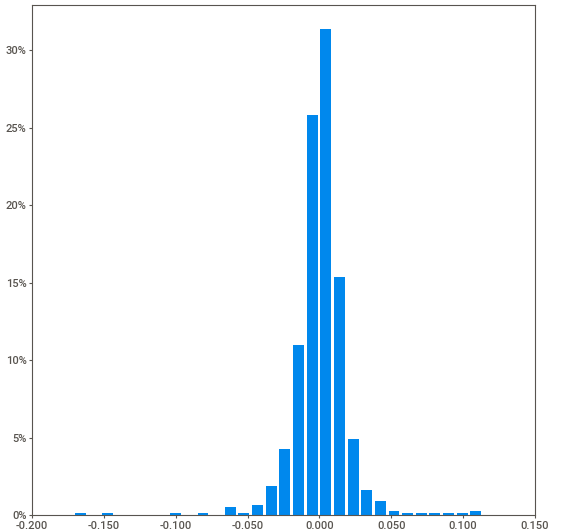
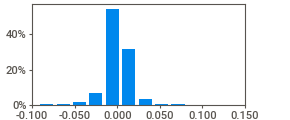
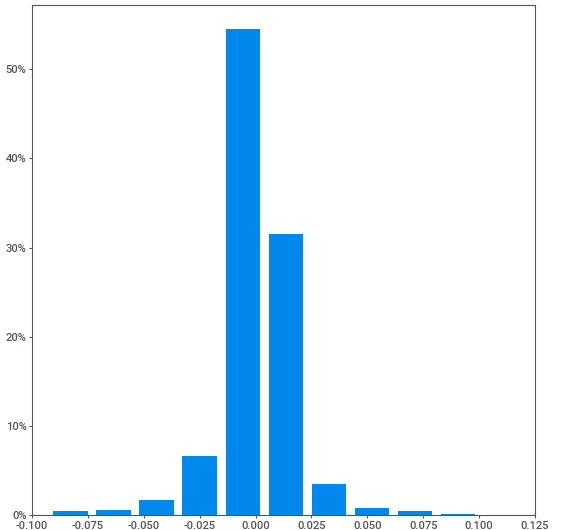
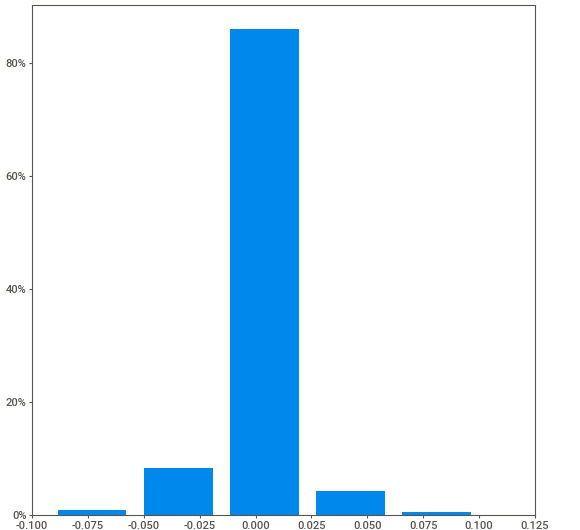
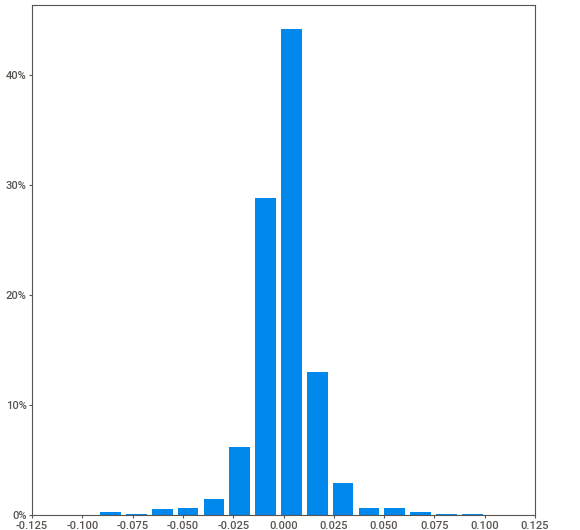
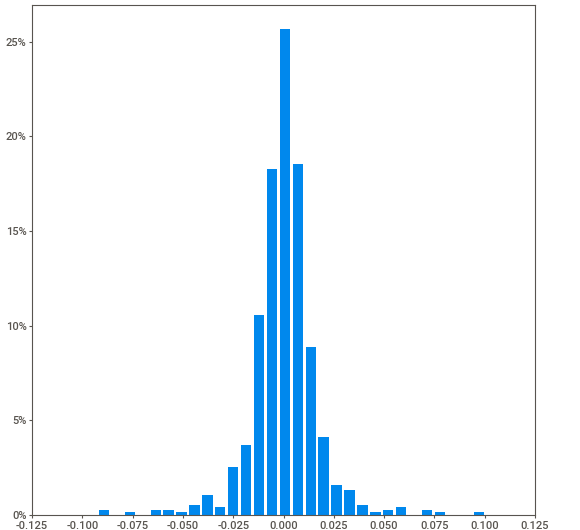
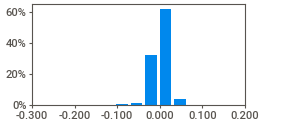
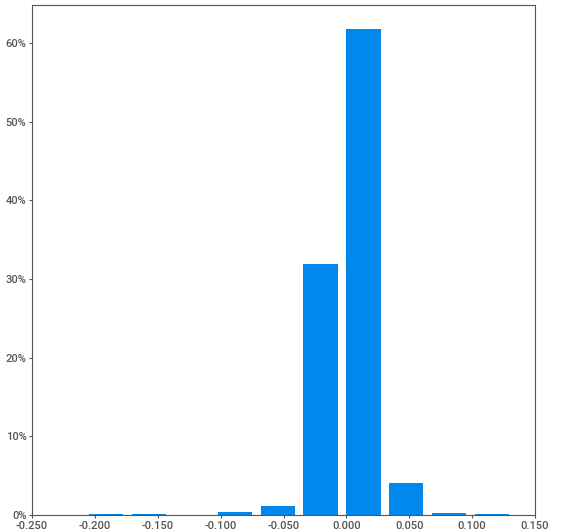
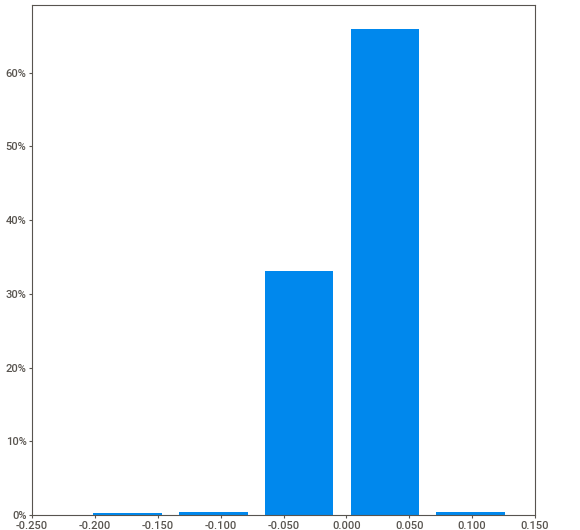
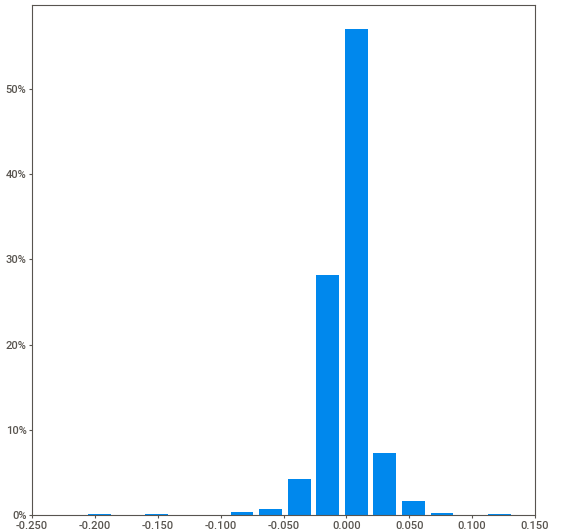
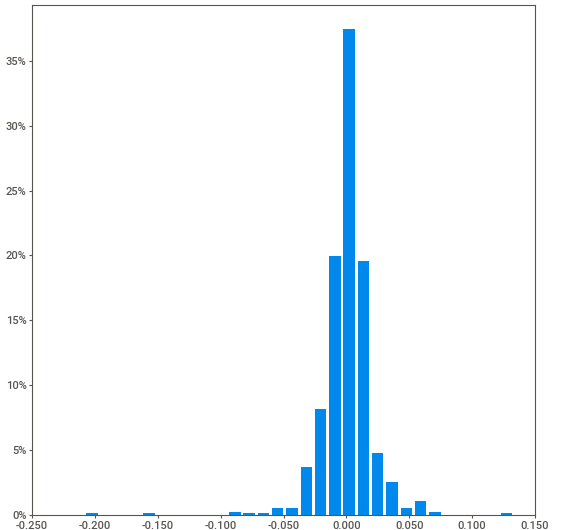
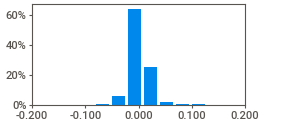
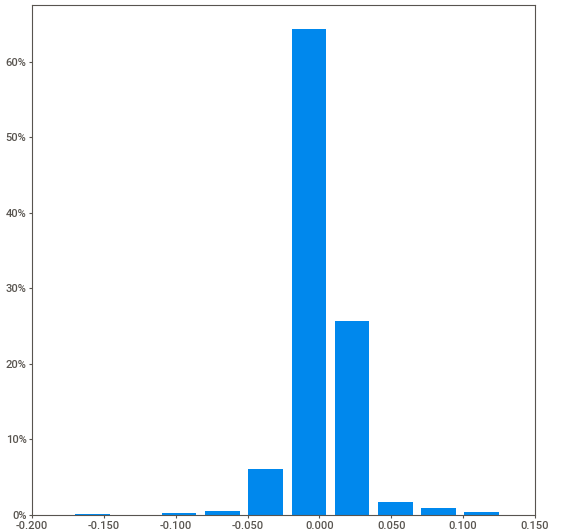
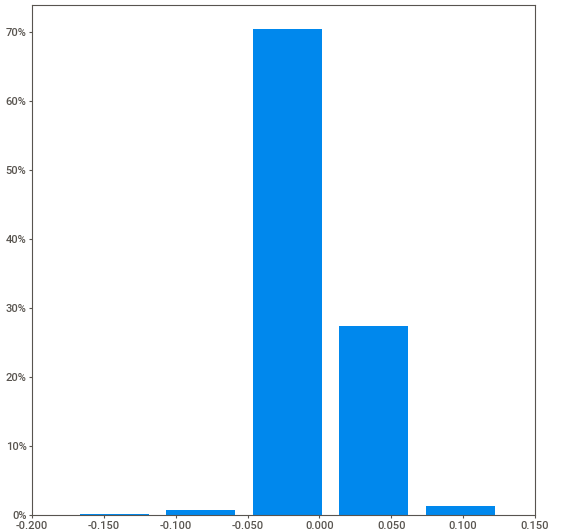
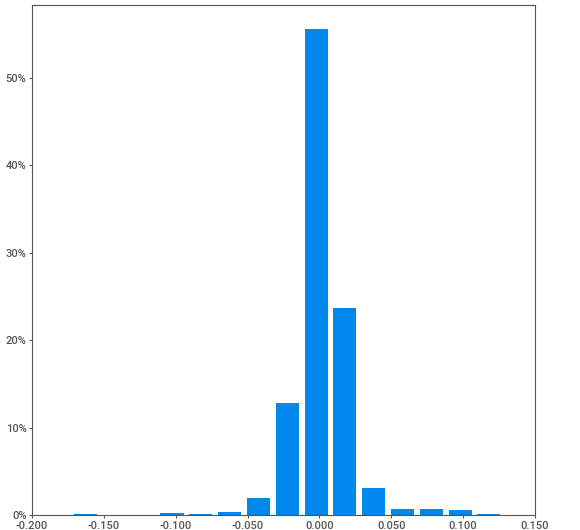
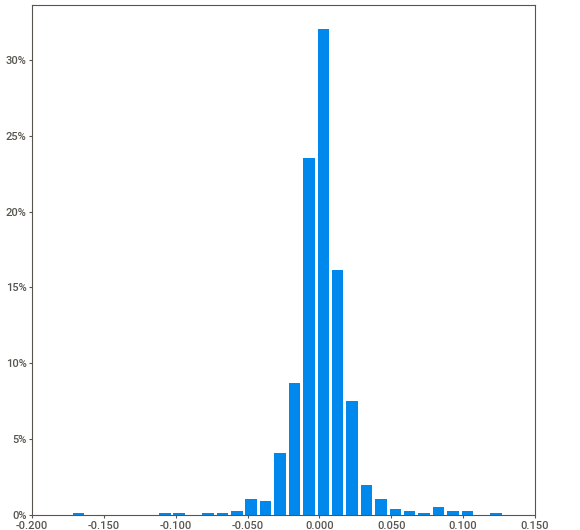
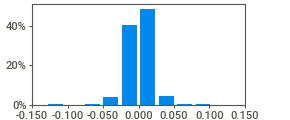
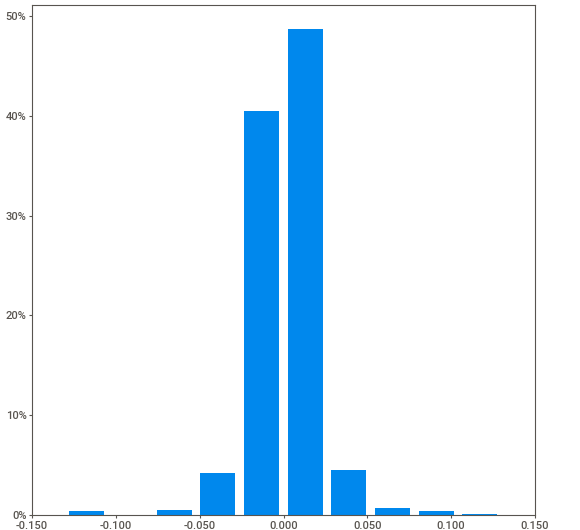
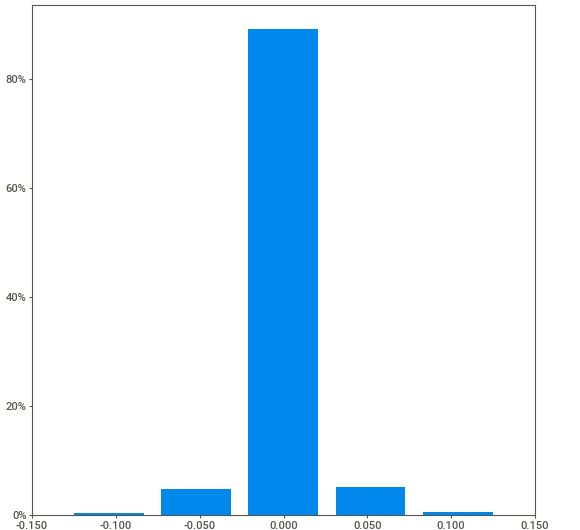
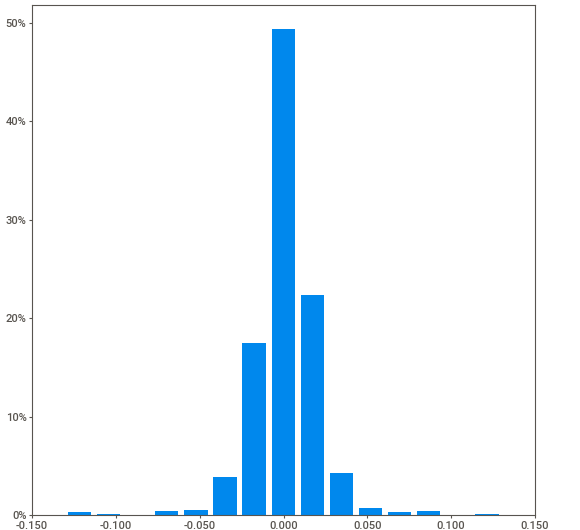
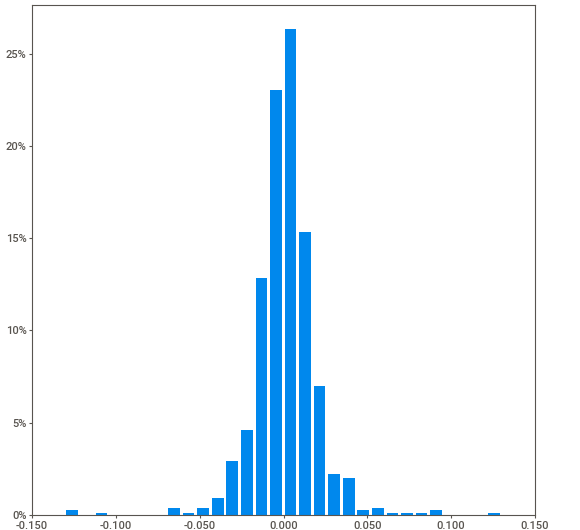
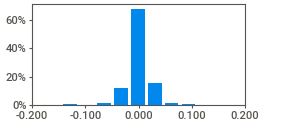
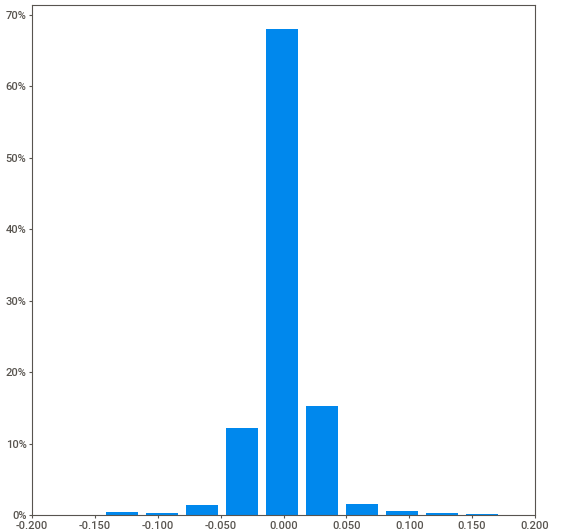
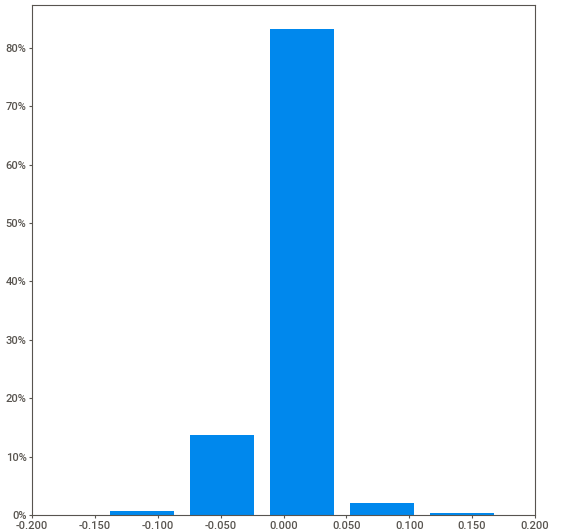
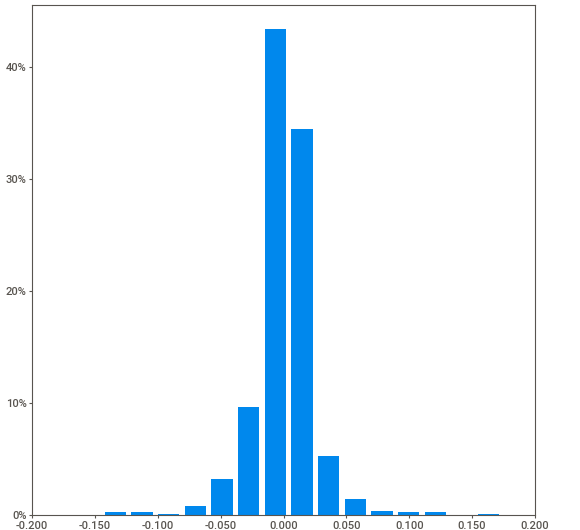
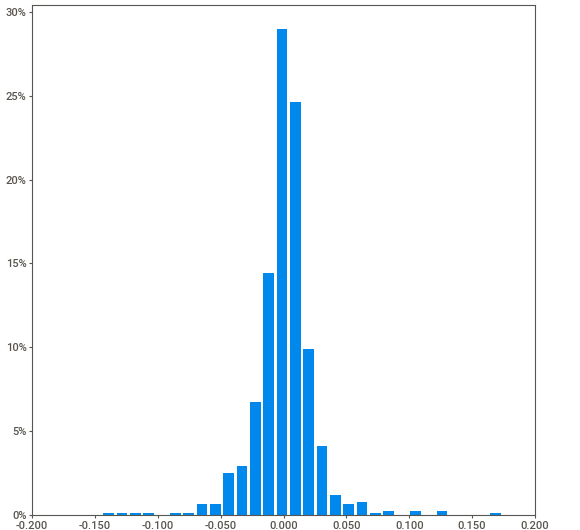
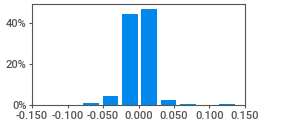
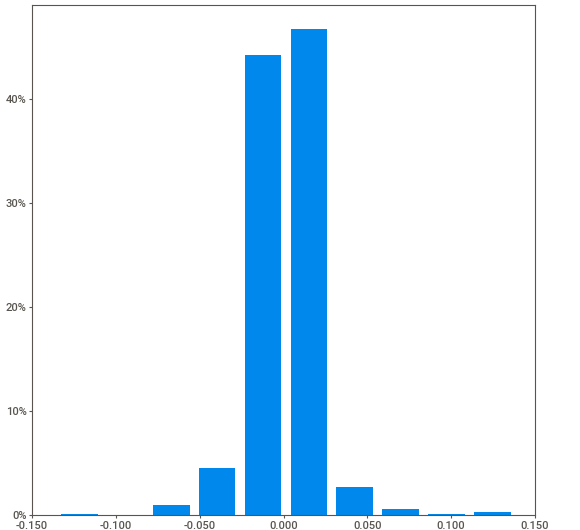
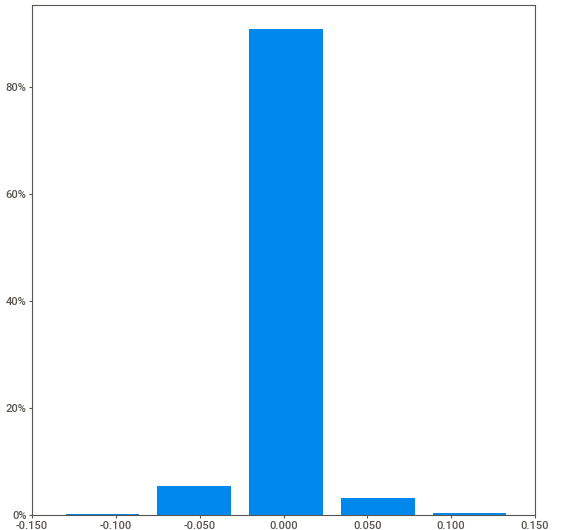
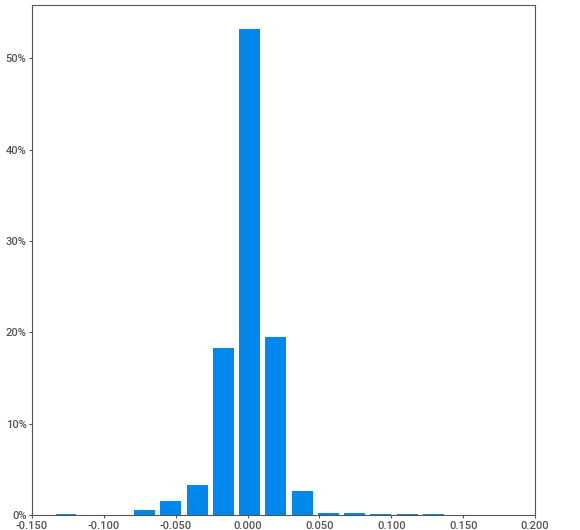
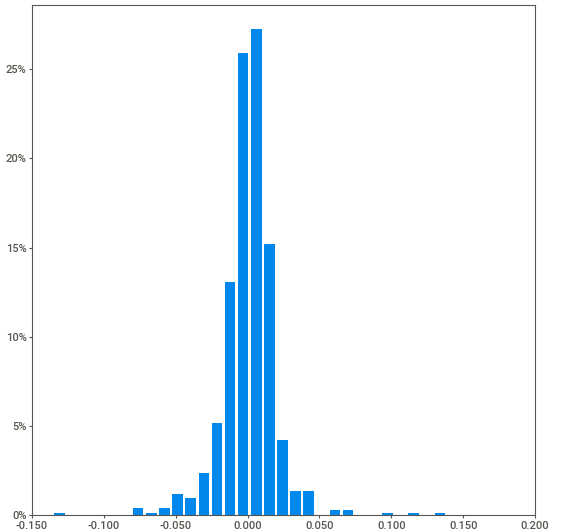
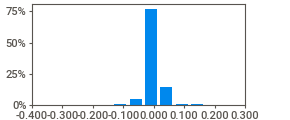
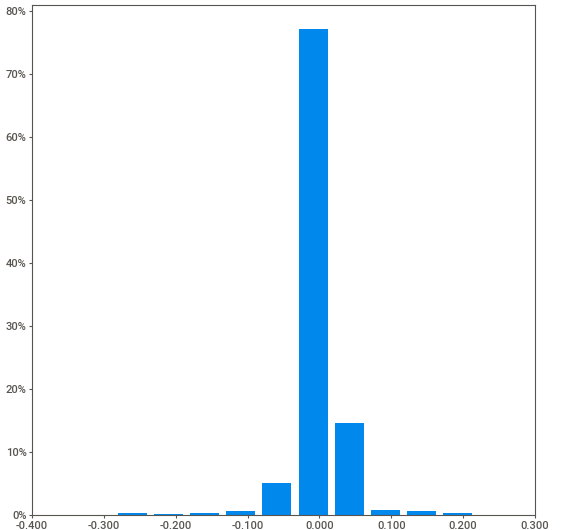
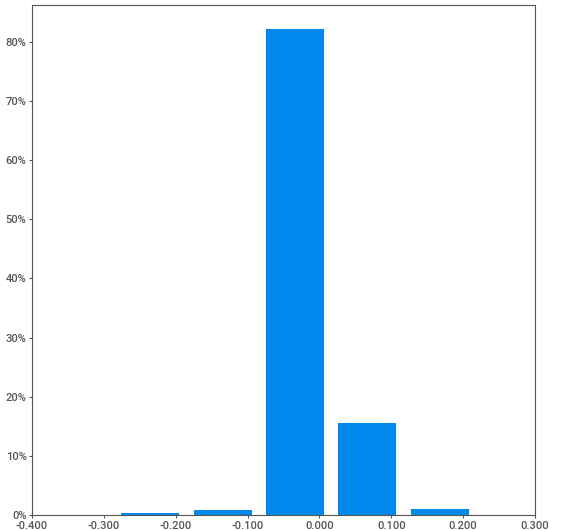
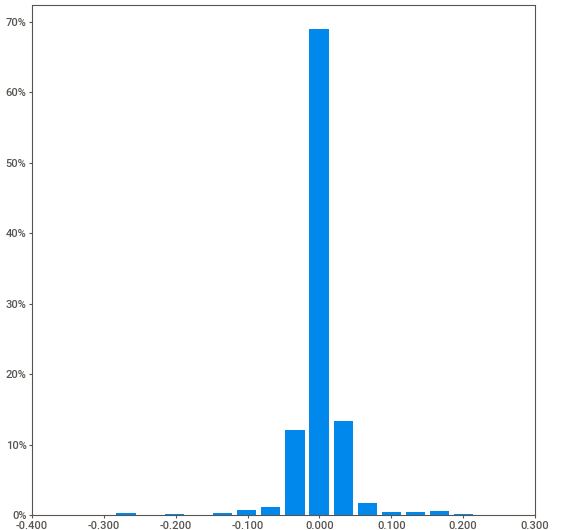
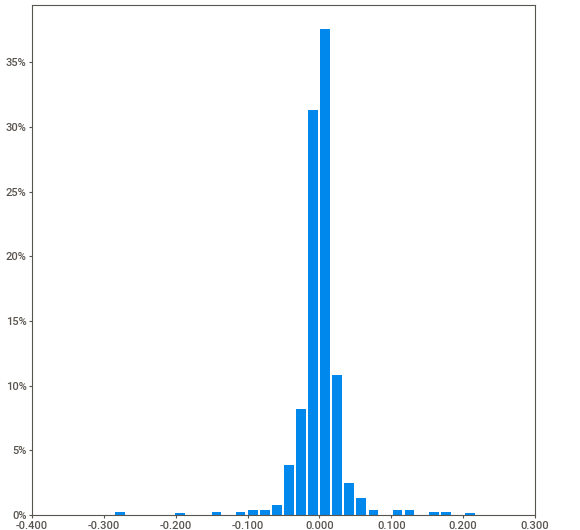
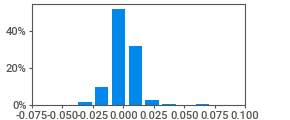
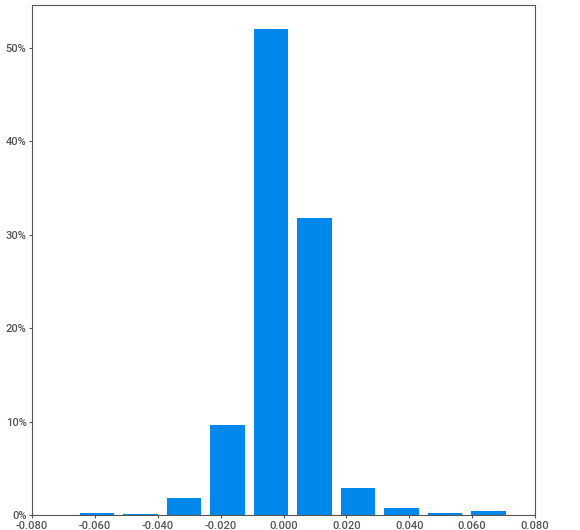
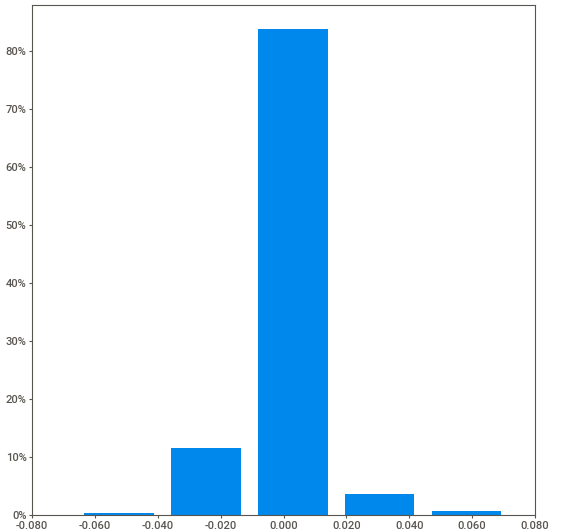
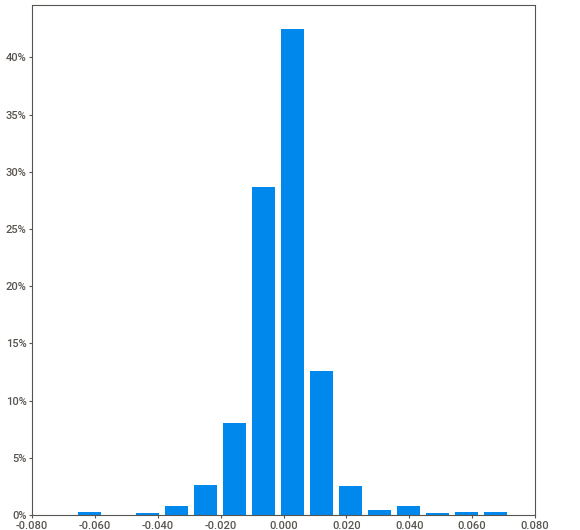
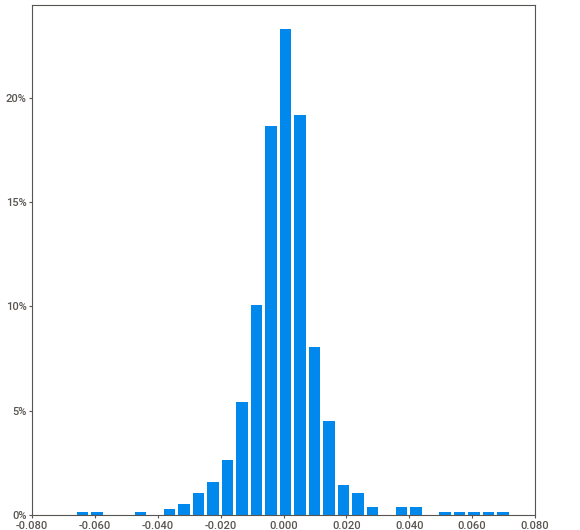
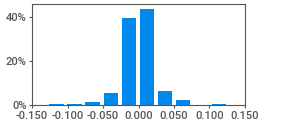
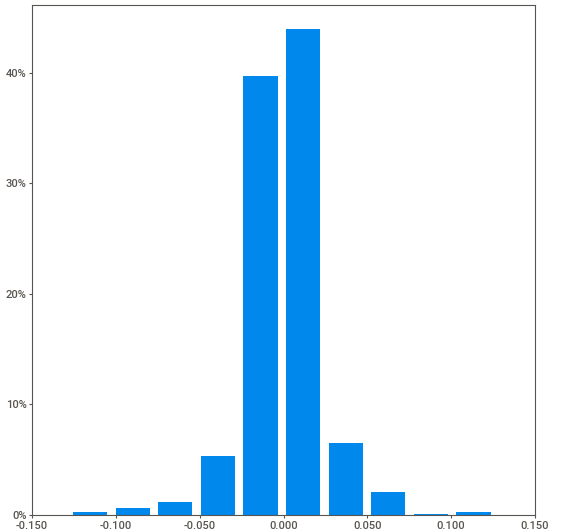
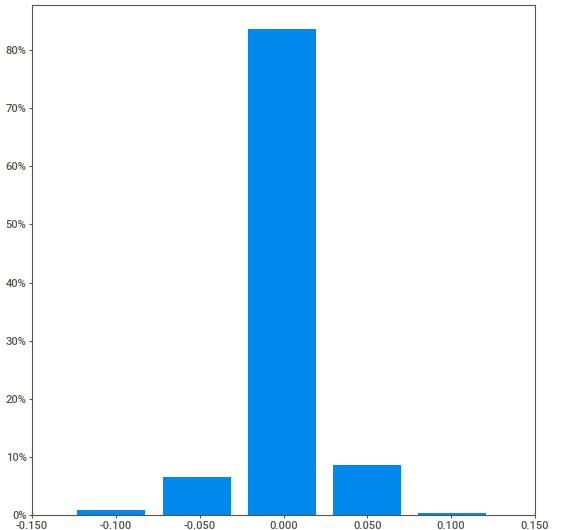
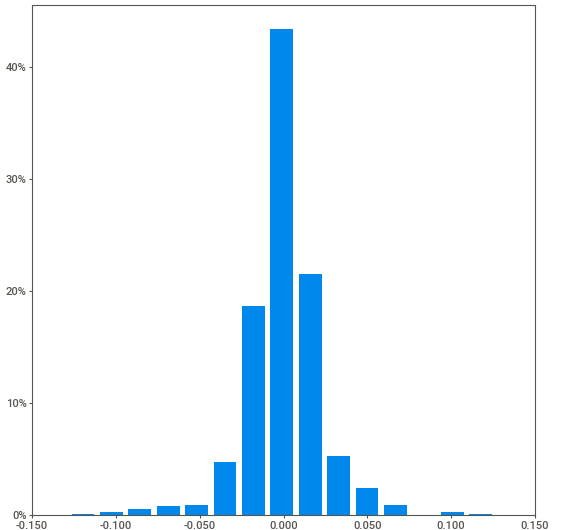
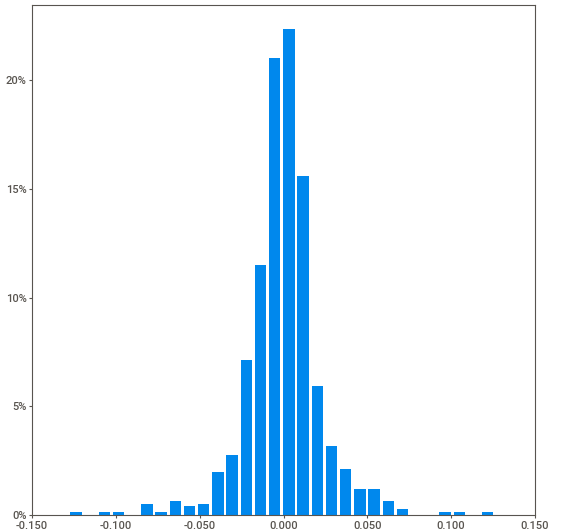
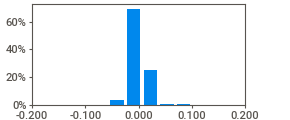
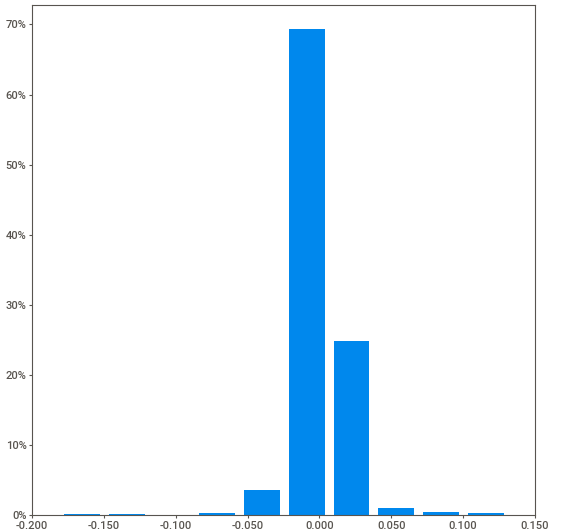
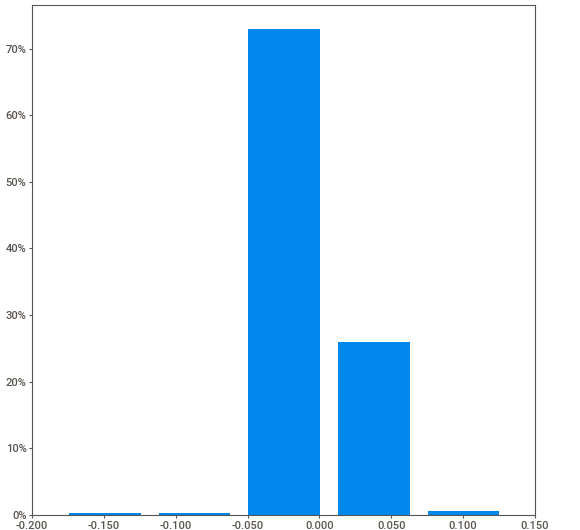
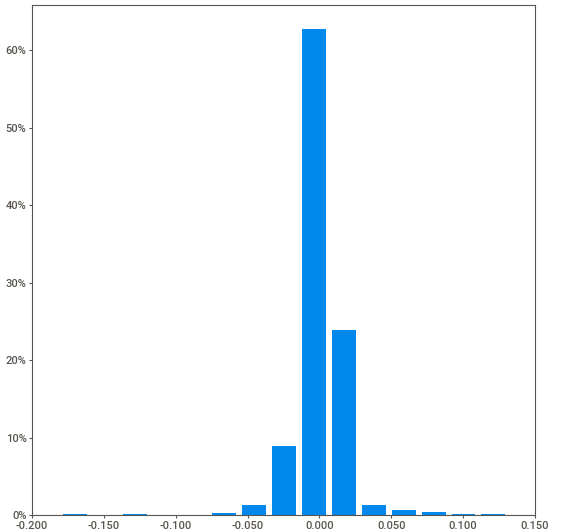
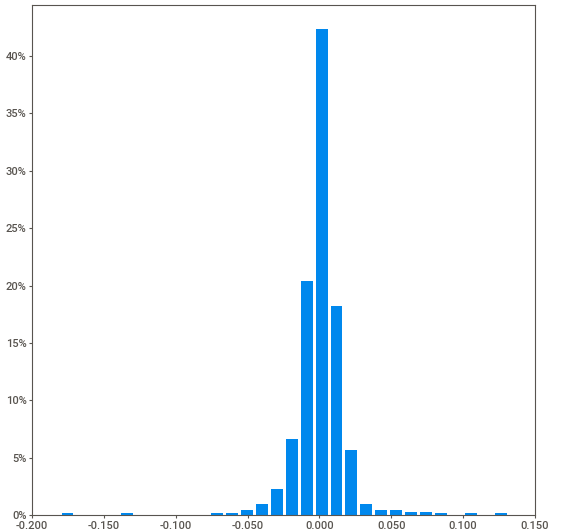
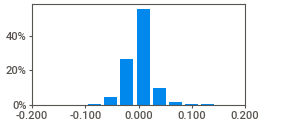
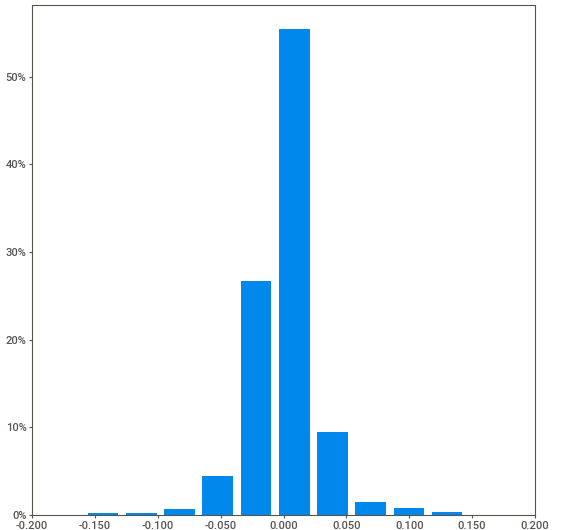
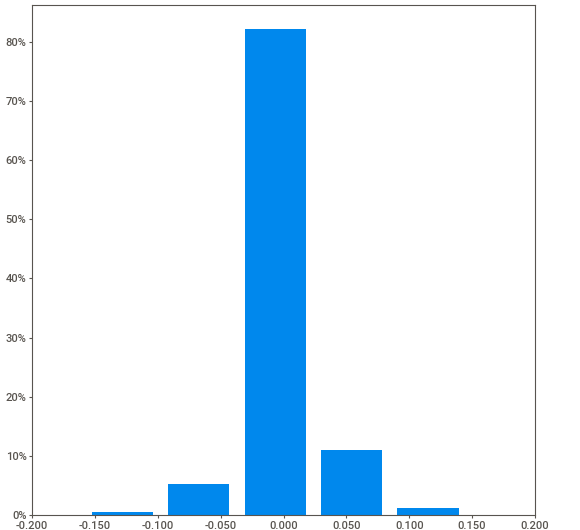
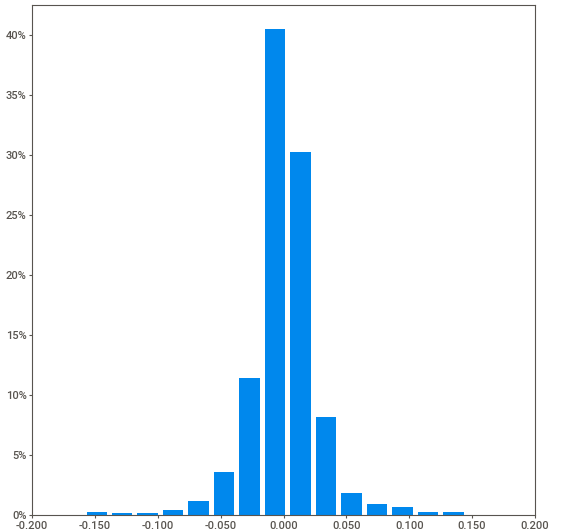
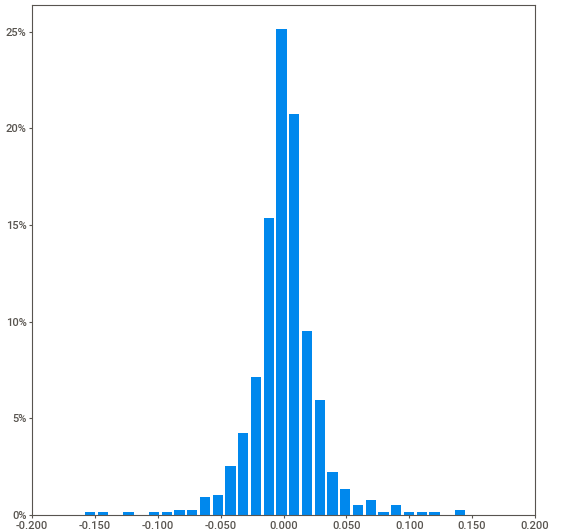
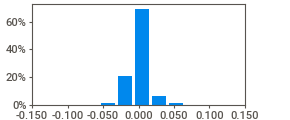
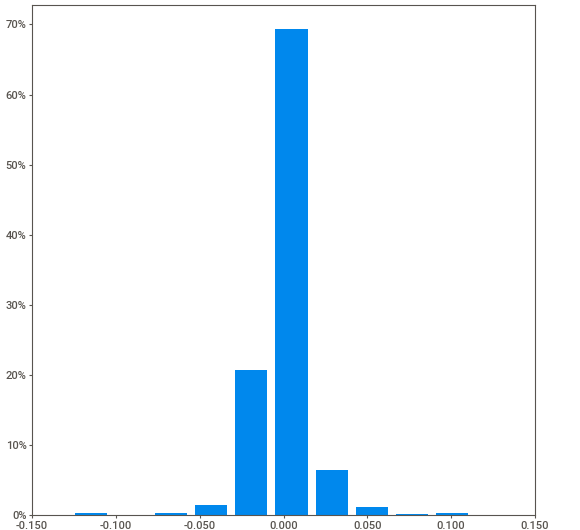
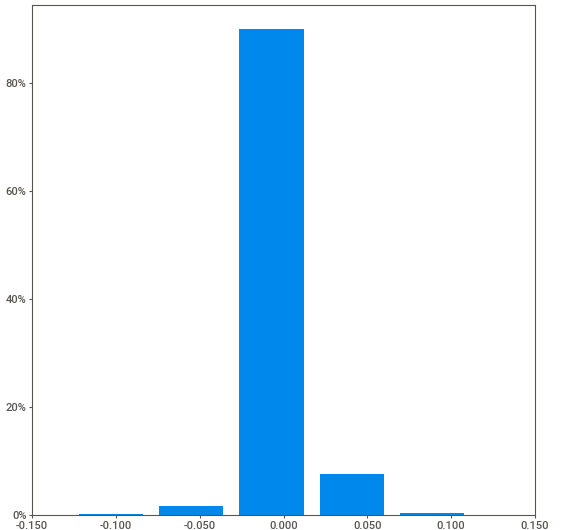
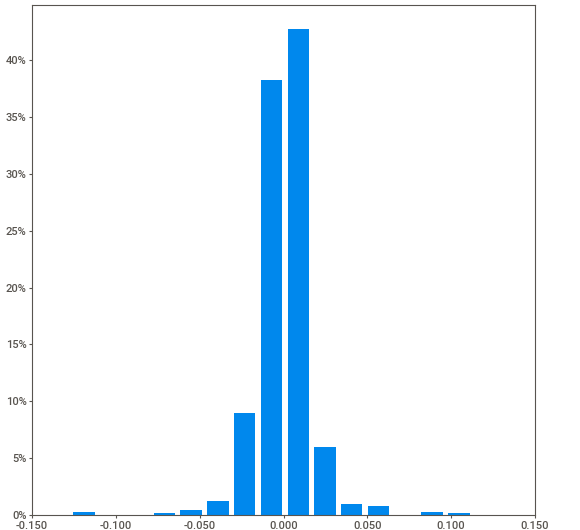
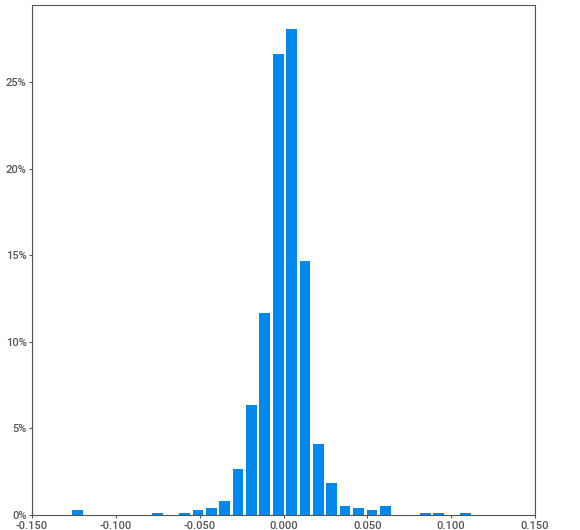
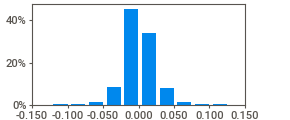
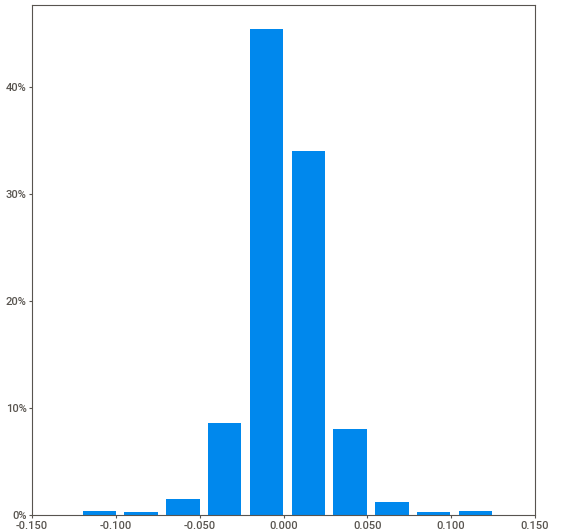
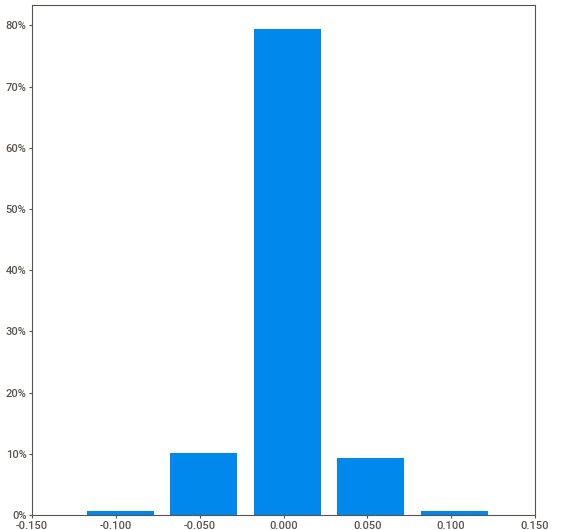
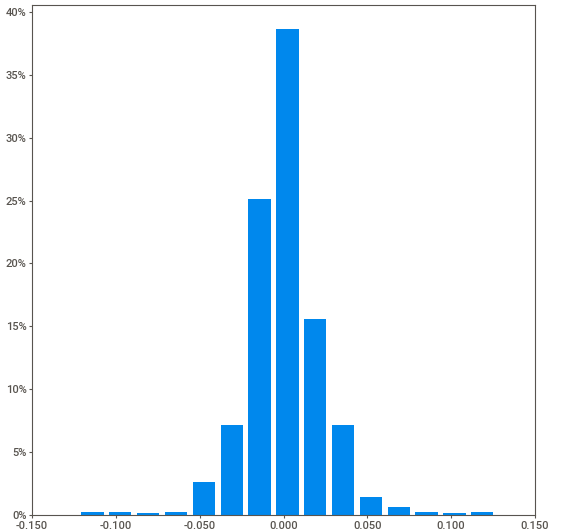
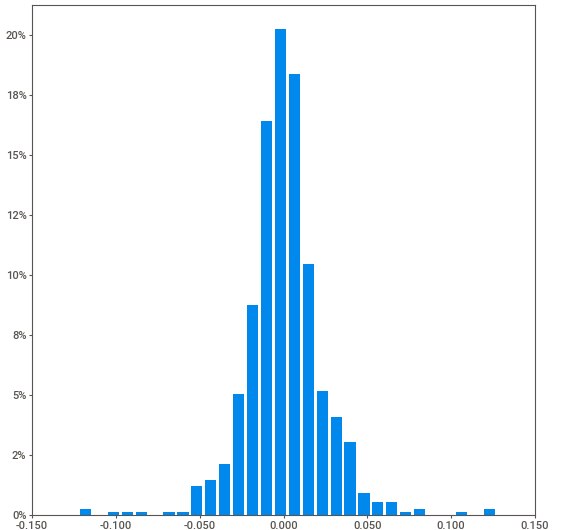
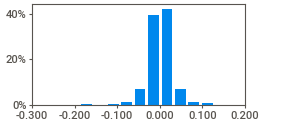
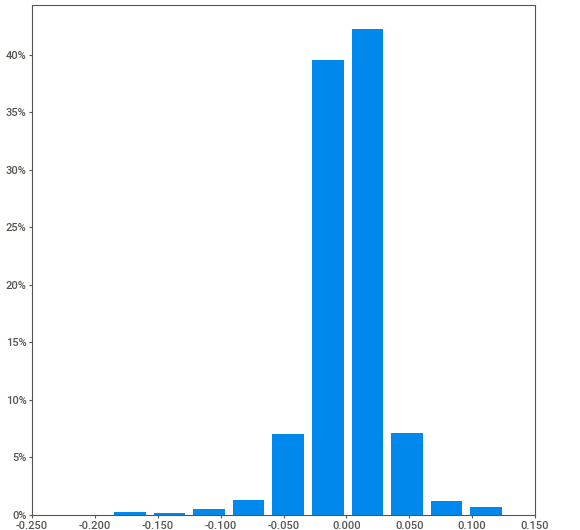
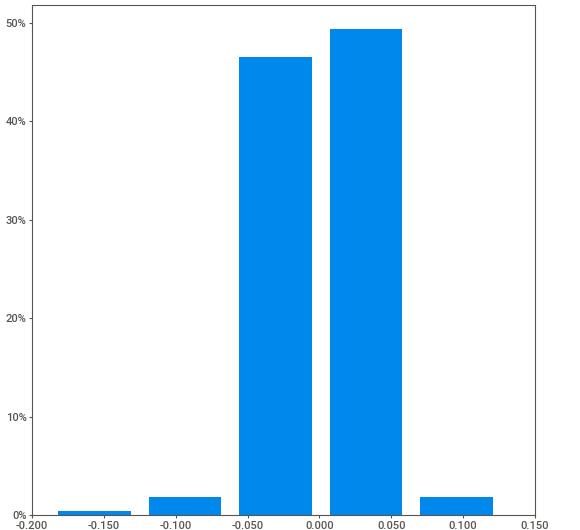
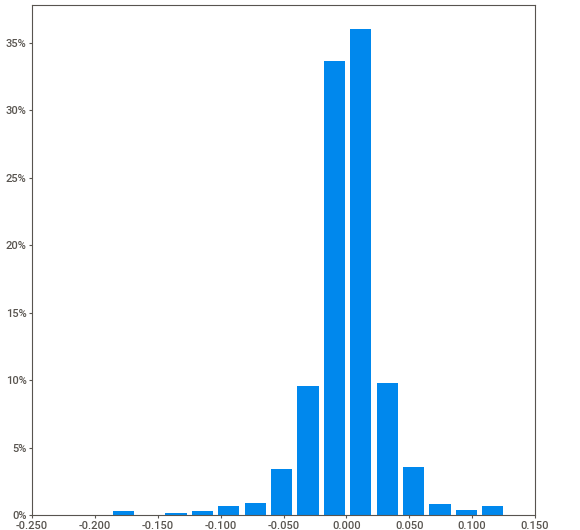
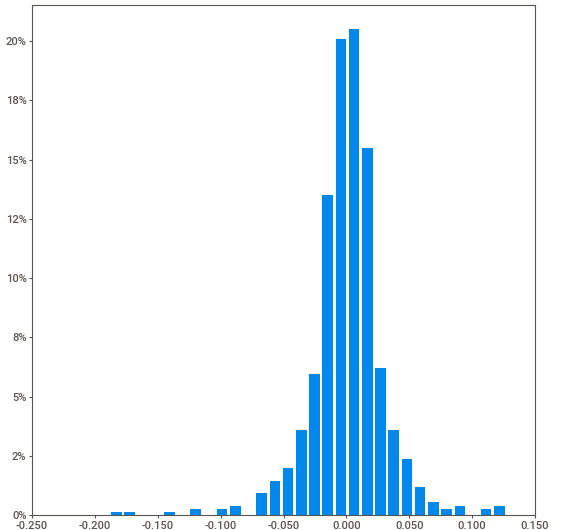
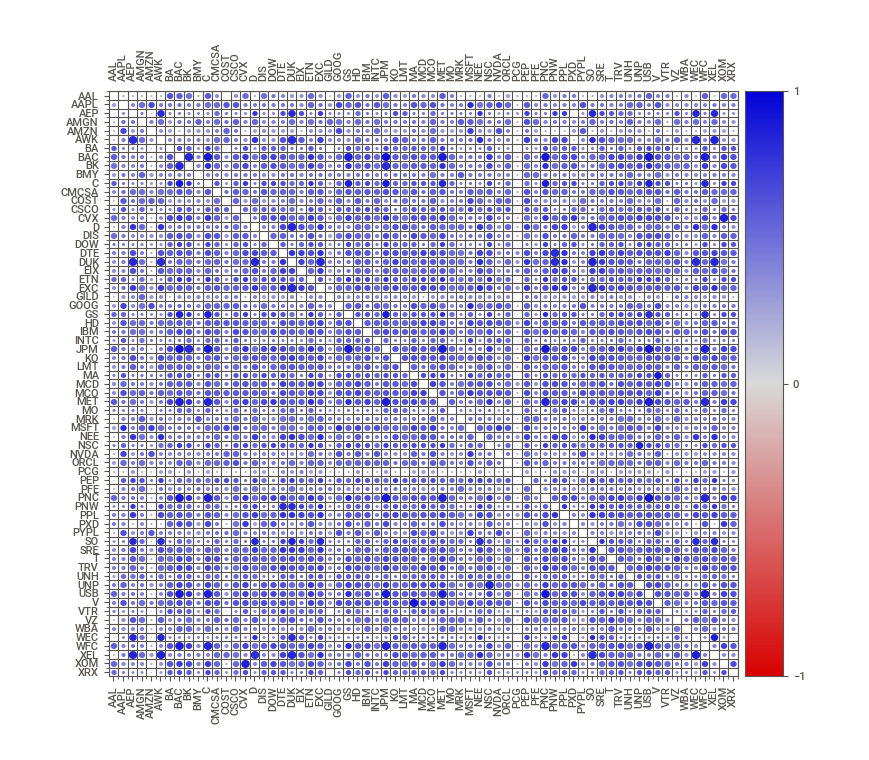
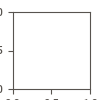

In [6]:
# Using the sweetviz package, perform exploratory data analysis
analyze_report = sv.analyze(returns) 

# This code prints out the reports of the EDA in the Jupyter notebook
analyze_report.show_notebook()       

#### 6. Transform the data to have a mean of zero (0) and a standard deviation of one (1). 
Principal component anaysis is sensitive to the scale of the variables. The variables with bigger values tend to dominate the analysis and could mislead the analysis. To give equal weight to the variables, they should be scaled.




Scaling also helps find the underlying structure in the data. And as it can be seen in the above exploratory data analysis (EDA), the values in the variable are varying significantly from each other and should be scaled.




In this project, the data (returns) is scaled and stored in a new dataframe called s_returns.

In [6]:
# Fit the model to the data and transform it
s_returns = preprocessing.scale(returns)

#### 7.  Create a PCA object to indicate the number of components to keep.
 In this analysis, four components would be kept.

In [7]:
# To keep four components, create a PCA object
pca = PCA( n_components = 4)


#### 8. Fit the principal component analysis to the scaled data.




In [8]:
# Fit the PCA object to your data
pca.fit(s_returns) 


PCA(n_components=4)

####  9. Transform the scaled data (s_returns) into  four principal components and store them in a dataframe (finpca).



In [9]:
# Transform the scaled data to the principal components
returns_transformed = pca.transform(s_returns)

#  Store the principal components into a dataframe (finpca) and label the columns accordingly
finpca = pd.DataFrame( returns_transformed, columns = ['pc1', 'pc2','pc3','pc4'])

# visualize the data
finpca.head(4)

pc1       pc2       pc3       pc4
0   0.337597 -0.048601  0.152500  0.030325
1   7.000267  1.223269  6.068103 -0.438066
2 -11.256394 -0.826394 -4.527366  1.502213
3  -0.647689 -1.168537 -2.227796  0.823084

#### 10. Check the level of variation in the data the four principal components have been able to capture.

In this instance, it has been able to capture almost 68% of the variation (information) in the data. This is a good sign, so the four components will be maintained for the rest of the analysis.



The information captured in our data would also be plotted in a scree plot.



This ratio explained by the each four(4) principal components are : 	 [0.49861986 0.08062299 0.0571617  0.03086397] 
 The ratio explained by the total  four(4) principal components are : 	 0.6672685150635381 or 66.7268515063538 %


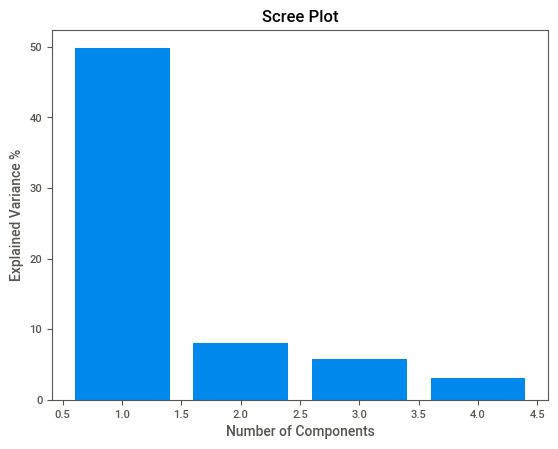

In [10]:
# Print out the amount of variance captured in the data by the four principal components

print( 'This ratio explained by the each four(4) principal components are :', '\t',  pca.explained_variance_ratio_,
      '\n', 'The ratio explained by the total  four(4) principal components are :', '\t', pca.explained_variance_ratio_.sum() , 'or' ,  (pca.explained_variance_ratio_*100).sum(), '%' )


# Visualize the amount of variance captured in the data by the four principal components on a scree plot

# Get the percentage of variance explained by each component
var_explained = pca.explained_variance_ratio_ *100

# Get the number of components
n_components = len(var_explained) +1

# Create a figure and an Axes object
fig, ax = plt.subplots()

# Plot the explained variance as a bar plot
ax.bar(range(1, n_components), var_explained)

# Set the xlabel to "Number of components"
ax.set_xlabel("Number of Components")

# Set the ylabel to "Explained variance"
ax.set_ylabel("Explained Variance %")

# Add a title to the plot
plt.title("Scree Plot")

# Set the theme of the plot to "darkgrid" and the color palette to "colorblind"
sns.set_style("darkgrid")

# Show the plot
plt.show()


#### 11.  Extract the loadings of the principal component.

In [11]:
# Get the loading values
loadings = pca.components_

#### 12.  Create a dataframe to contain the principal component loadings.



In [12]:
# Extract the names of the variables from the dataframe
variable_names =  list(returns.columns) 

# Index name used in the loading dataframe(loading_df)
indexname = ['first_pc_loadings', 'second_pc_loadings', 'third_pc_loadings', 'forth_pc_loadings'] 

# Store the dataframe containing the loadings values 
loadings_df = pd.DataFrame(loadings, columns= variable_names, index = indexname)
loadings_df.head(5)

AAL      AAPL       AEP      AMGN      AMZN  \
first_pc_loadings  -0.083372 -0.111058 -0.116442 -0.104710 -0.073746   
second_pc_loadings -0.185211  0.023923  0.234020  0.094740  0.038759   
third_pc_loadings   0.084467 -0.273167  0.131372 -0.129351 -0.335195   
forth_pc_loadings  -0.054182 -0.050239 -0.004136  0.212814 -0.054350   

                         AWK        BA       BAC        BK       BMY  ...  \
first_pc_loadings  -0.115237 -0.116084 -0.142664 -0.130144 -0.096885  ...   
second_pc_loadings  0.250487 -0.131640 -0.173634 -0.144694  0.045464  ...   
third_pc_loadings   0.062678  0.055805  0.062754  0.056524 -0.065773  ...   
forth_pc_loadings  -0.040583 -0.140532  0.086008  0.098304  0.154771  ...   

                         USB         V       VTR        VZ       WBA  \
first_pc_loadings  -0.139320 -0.139748 -0.111740 -0.113392 -0.096365   
second_pc_loadings -0.156166 -0.032765 -0.070394  0.105312 -0.032184   
third_pc_loadings   0.110919 -0.114939  0.104964  0.055302  0.023786   
forth_pc_loadings   0.093607 -0.111388 -0.228686  0.227045  0.305448   

                         WEC       WFC       XEL       XOM       XRX  
first_pc_loadings  -0.108674 -0.134955 -0.123581 -0.123759 -0.116504  
second_pc_loadings  0.259021 -0.143865  0.242420 -0.165894 -0.142526  
third_pc_loadings   0.103539  0.099501  0.073980  0.068226  0.046123  
forth_pc_loadings   0.023404  0.067034 -0.057875  0.029507 -0.077952  

[4 rows x 67 columns]

#### 13.  Select the maximum absolute value for each of the four principal component loadings.

The maximum absolute value represents the stock, which is selected to represent that principal component loading.

 MET: MetLife, Inc., WEC: Wisconsin Energy Corporation, AMZN: Amazon.com, Inc., and GILD: Gilead Sciences, Inc. are the stocks that represented the four principal components.


These selected stocks represent all 67 stocks. As an investor, you can buy these four stocks rather than a large number of small stocks. This is because they capture most of the variations in the other unselected 63 stocks.

In [13]:
# Select the index for the maximum absolute value in each row
loadings_df.abs().idxmax(axis="columns")

first_pc_loadings      MET
second_pc_loadings     WEC
third_pc_loadings     AMZN
forth_pc_loadings     GILD
dtype: object

### NOTE:
 #### Here are the names of the sixty-seven (67) companies whose stocks were used in this project.

AAL: American Airlines Group Inc


AAPL: Apple Inc


AEP: American Electric Power Company Inc


AMGN: Amgen Inc


AMZN: Amazon.com, Inc


AWK: American Water Works Company Inc


BA: The Boeing Company


BAC: Bank of America Corporation


BK: The Bank of New York Mellon Corporation


BMY: Bristol-Myers Squibb Company


C: Citigroup Inc


CMCSA: Comcast Corporation


COST: Costco Wholesale Corporation


CSCO: Cisco Systems, Inc


CVX: Chevron 


D: Dominion Energy Inc


DIS: The Walt Disney Company


DOW: Dow Inc


DTE: DTE Energy Company


DUK: Duke Energy Corporation


EIX: Edison International


ETN: Eaton Corporation plc


EXC: Exelon Corporation


GILD: Gilead Sciences, Inc


GOOG: Alphabet Inc (Google)


GS: The Goldman Sachs Group, Inc


HD: The Home Depot, Inc


IBM: International Business Machines Corporation


INTC: Intel Corporation


JPM: JPMorgan Chase & Co


KO: The Coca-Cola Company


LMT: Lockheed Martin Corporation


MA: Mastercard Inc


MCD: McDonald's Corporation


MCO: Moody's Corporation


MET: MetLife, Inc


MO: Altria Group Inc


MRK: Merck & Co., Inc


MSFT: Microsoft Corporation


NEE: NextEra Energy Inc


NSC: Norfolk Southern Corporation


NVDA: NVIDIA Corporation


ORCL: Oracle Corporation


PCG: PG&E Corporation


PEP: PepsiCo, Inc


PFE: Pfizer Inc


PNC: The PNC Financial Services Group, Inc


PNW: Pinnacle West Capital Corporation


PPL: PPL Corporation


PXD: Pioneer Natural Resources Company


PYPL: PayPal Holdings, Inc

SO: Southern Company (The)


SRE: Sempra Energy


T: AT&T Inc


TRV: The Travelers Companies, Inc


UNH: UnitedHealth Group Inc


UNP: Union Pacific Corporation


USB: U.S. Bancorp


V: Visa Inc


VTR: Ventas, Inc


VZ: Verizon Communications Inc


WBA: Walgreens Boots Alliance, Inc


WEC: Wisconsin Energy Corporation


WFC: Wells Fargo & Company


XEL: Xcel Energy Inc


XOM: Exxon Mobil Corporation


XRX: Xerox Corporation

===========================================Thank You=====================================================
